Loaded lentivurs dataset and checking shape

In [1]:
import pandas as pd
#load lentivus data
lentivirus = pd.read_csv('lentivirus.csv')
#check the size of data
lentivirus.shape
lentivirus.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,P05877.1:3,11696,P05877.1,306,Y,"9289390,10368281,22164215,31263112","79327,163954,604752","9606,10090,9544","1,3,2,18","1,0,0,0",...,0.398270,-0.144087,-0.342332,0.051193,-1.169518,-0.304270,0.258099,-0.184203,-0.768978,0.095764
1,P05877.1:3,11696,P05877.1,307,N,"9289390,10368281,22164215,31263112","79327,163954,604752","9606,10090,9544","1,3,2,18","1,0,0,0",...,0.120641,0.036068,-0.711948,-0.052949,-0.642261,-0.595665,-0.107459,-0.188584,-0.662220,0.006413
2,P05877.1:3,11696,P05877.1,308,K,"9289390,10368281,16731948,20622876,22164215,31...","79327,163954,162763,162762,604752","9606,10090,9544","1,3,3,3,2,18","1,0,0,0,0,0",...,0.600361,0.278707,-0.306851,-0.416138,-0.714807,0.062856,0.357250,-0.051216,-0.043051,-0.218856
3,P05877.1:3,11696,P05877.1,309,R,"9289390,10368281,16731948,19913488,20622876,22...","79327,163954,162763,146524,162762,604752,780125","9606,10090,9544","1,3,3,2,3,2,6,18","1,0,0,0,0,0,0,0",...,0.497170,0.072447,-0.615481,0.075875,-0.763808,-0.348592,0.216759,0.066034,-0.236564,-0.308142
4,P05877.1:3,11696,P05877.1,310,K,"9289390,8327513,10368281,14592768,16731948,199...","79327,149350,163954,162761,162763,146524,16276...","9606,10000252,10090,9544","1,1,3,1,3,2,3,1,2,6,18,1","1,0,0,0,0,0,0,0,0,0,0,0",...,0.465172,0.006267,-0.526020,-0.084951,-0.724663,-0.206482,0.153864,-0.245701,-0.199443,-0.057272


Checking missing values in the dataset

In [2]:
#check for missing values -> results show no missing values
print("Total Missing:")
for x, y in enumerate(lentivirus.isnull().any()):
    if y == True:
        name = lentivirus.columns[x]
        print("   "+name+":", data[name].isnull().sum())


Total Missing:


In [3]:
lentivirus.iloc[:, 0:18].info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Info_PepID        1795 non-null   object 
 1   Info_organism_id  1795 non-null   int64  
 2   Info_protein_id   1795 non-null   object 
 3   Info_pos          1795 non-null   int64  
 4   Info_AA           1795 non-null   object 
 5   Info_pubmed_id    1795 non-null   object 
 6   Info_epitope_id   1795 non-null   object 
 7   Info_host_id      1795 non-null   object 
 8   Info_nPos         1795 non-null   object 
 9   Info_nNeg         1795 non-null   object 
 10  Info_type         1795 non-null   object 
 11  Info_window       1795 non-null   object 
 12  Info_cluster      1795 non-null   int64  
 13  Class             1795 non-null   int64  
 14  feat_esm1b_0      1795 non-null   float64
 15  feat_esm1b_1      1795 non-null   float64
 16  feat_esm1b_2      1795 non-null   float64


Pyplot imported to visualise graphs. A visual representation of the class imbalance in the lentivirus dataset presented.

Class Balance:
   Positive: 1467
   Negative: 328


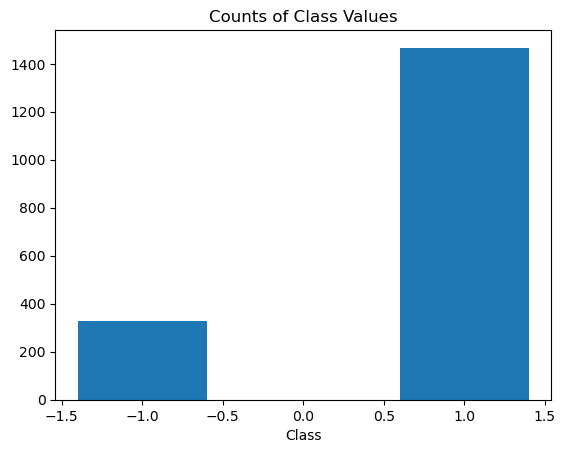

In [4]:
from matplotlib import pyplot as plt
#check class balance
print("Class Balance:")
print("   Positive:",len(lentivirus[lentivirus["Class"]==1]))
print("   Negative:",len(lentivirus[lentivirus["Class"]==-1]))   

#visualize class imbalance
class_col = lentivirus['Class']
class_counts = class_col.value_counts()
plt.bar(class_counts.index, class_counts.values)

plt.xlabel('Class')
plt.title('Counts of Class Values')

# Show the plot
plt.show()

Class imbalance in each cluster presented

Class            -1      1
Info_cluster              
30             39.0  949.0
52            198.0  257.0
148            10.0   58.0
160            51.0   25.0
208             NaN   58.0
250            30.0   83.0
276             NaN    8.0
282             NaN   12.0
346             NaN    9.0
358             NaN    8.0


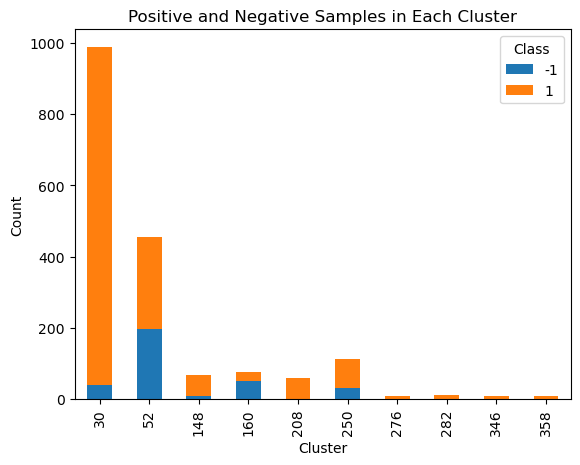

In [5]:
#check + visualize clusters
lentivirus_clusters = lentivirus.copy(deep=True)

#visualize clusters
counts = lentivirus_clusters.groupby(['Info_cluster', 'Class']).size().unstack()
counts.plot(kind='bar', stacked=True)
print(counts)
plt.title('Positive and Negative Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

Random undersampling of majority class done. The clusters to undersample were manually selected after looking through the above graph. Then a loop is created in which, the class count is calculated and stored in variables minority_class_len and majority_class_len respectively. Then the classes are indexed and stored in variables, using these indexes random undersampling is done by randomly selecting indices from the majority class until they are equal to the minority class, and replace=False is added so that each index chosen is unique.

In [6]:
import numpy as np
#balance class for each cluster which has class imbalance
clusters_to_undersample = [30,52,148,250]
undersampled_dataset = pd.DataFrame()

#loop over each cluster and randomly remove majority class until 50:50
#create new dataset with undersampled data
np.random.seed(42)
for cluster in clusters_to_undersample:
    cluster_data = lentivirus_clusters[lentivirus_clusters['Info_cluster'] == cluster]
    minority_class_len = int(cluster_data['Class'].value_counts()[-1])
    majority_class_len = cluster_data['Class'].value_counts()[1]
    
    majority_class_idx = cluster_data[cluster_data['Class'] == 1].index
    minority_class_idx = cluster_data[cluster_data['Class'] == -1].index
    
    random_majority_idx = np.random.choice(majority_class_idx, minority_class_len, replace=False)
    
    undersampled_idx = np.concatenate([minority_class_idx, random_majority_idx])
    undersampled_cluster = cluster_data.loc[undersampled_idx].copy()
    
    undersampled_dataset = pd.concat([undersampled_dataset, undersampled_cluster])

#add the other clusters back to undersampled_dataset
clusters_to_add = [160,208,276,282,346,358]
for cluster in clusters_to_add:
    c= lentivirus_clusters[lentivirus_clusters['Info_cluster'] == cluster]
    idx = lentivirus_clusters[lentivirus_clusters['Info_cluster'] == cluster].index
    add_cluster = c.loc[idx].copy()
    undersampled_dataset = pd.concat([undersampled_dataset,add_cluster])
    
undersampled_dataset.reset_index(drop=True, inplace=True)
undersampled_dataset

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,AAD03223.1:2,11676,AAD03223.1,572,G,10491006,113000,"10000206,9606",1,1,...,1.079122,-0.612150,-0.549685,0.208080,-0.057606,0.610071,-0.171303,0.320035,-0.551130,-0.536661
1,AAD03223.1:2,11676,AAD03223.1,573,I,10491006,113000,"10000206,9606",1,1,...,0.556093,-0.041111,-0.240461,-0.274639,0.393833,0.065033,0.138008,-0.399381,0.104057,0.339393
2,AAD03223.1:2,11676,AAD03223.1,574,K,10491006,113000,"10000206,9606",1,1,...,0.480909,-0.389059,-0.267789,-0.112657,-0.305016,0.086458,-0.042881,-0.092988,0.026523,-0.043139
3,AAD03223.1:2,11676,AAD03223.1,575,Q,10491006,113000,"10000206,9606",1,1,...,0.809479,0.041821,-0.963209,0.395983,-0.455415,-0.127150,-0.124370,0.096872,-0.563273,-0.037554
4,AAD03223.1:2,11676,AAD03223.1,576,L,10491006,113000,"10000206,9606",1,1,...,0.478822,-0.102569,-0.481708,-0.494436,0.337799,0.239448,-0.218445,0.064970,-0.195199,-0.013512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,AAT99511.1:1,11709,AAT99511.1,4,S,15721587,187181,10000000,1,0,...,0.507252,-0.042336,-0.417229,0.083156,-0.757533,-0.188812,0.396794,-0.096665,-0.181638,-0.270908
721,AAT99511.1:1,11709,AAT99511.1,5,L,15721587,187181,10000000,1,0,...,0.458295,0.193224,-0.706230,-0.002260,-0.214022,-0.148091,0.383425,-0.152096,-0.177901,0.094473
722,AAT99511.1:1,11709,AAT99511.1,6,W,15721587,187181,10000000,1,0,...,0.199379,-0.070026,-0.501007,0.198161,-0.296369,-0.371272,0.124128,-0.133284,-0.145541,0.217357
723,AAT99511.1:1,11709,AAT99511.1,7,K,15721587,187181,10000000,1,0,...,0.429941,-0.262122,-0.565524,0.013410,-0.451900,-0.214582,0.231354,-0.192361,-0.261384,0.265271


Checking class balance after random undersampling

Class            -1      1
Info_cluster              
30             39.0   39.0
52            198.0  198.0
148            10.0   10.0
160            51.0   25.0
208             NaN   58.0
250            30.0   30.0
276             NaN    8.0
282             NaN   12.0
346             NaN    9.0
358             NaN    8.0


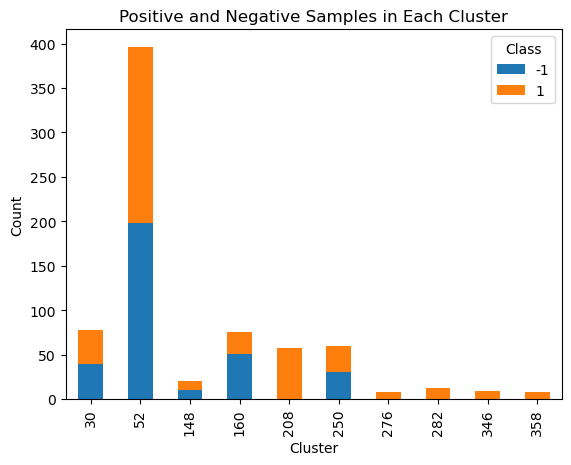

In [7]:
#check class balance of new dataset with balanced classes + visualize
counts = undersampled_dataset.groupby(['Info_cluster', 'Class']).size().unstack()
counts.plot(kind='bar', stacked=True)
print(counts)
plt.title('Positive and Negative Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

Dataset split into train, test and holdout sets while retaining the cluster information

In [8]:
new_dataset = undersampled_dataset.reset_index(drop=True)
from sklearn.model_selection import GroupKFold
#split data into 80-20 split
X = new_dataset.drop('Class', axis=1)
y = new_dataset['Class']
groups = new_dataset['Info_cluster']

gkfold = GroupKFold(n_splits=3)

for train_idx, test_idx in gkfold.split(X, y, groups):
    X_train, y_train= X.loc[train_idx], y.loc[train_idx]
    X_test, y_test= X.loc[test_idx], y.loc[test_idx]


In [9]:
#further split the data 80-20 to get holdout set
#do 5 folds instead of 3 folds 
X2 = X_train.reset_index(drop=True)
y2 = y_train.reset_index(drop=True)
groups2 = X_train['Info_cluster']

gkfold = GroupKFold(n_splits=2)

#are not concatonating the data here 
#extract the split here --- add colun new object and get indices of each spli and add that as a column
for train_idx, test_idx in gkfold.split(X2, y2, groups2):
    X2_train, y2_train= X2.loc[train_idx], y2.loc[train_idx]
    X_val, y_val= X.loc[test_idx], y.loc[test_idx]

X2.shape

(560, 1293)

Training set = 396
Test set (used for tuning) = 165
Holdout / Validation set = 164

In [10]:
#Size = 698
#Train = 57
#Val = 21.5
#Test = 21.5
print(X2_train.shape)
print(X_val.shape)
print(X_test.shape)

(396, 1293)
(164, 1293)
(165, 1293)


Clusters in each set shown

In [11]:
#Clusters persent in each train,test,validation splits
print(X2_train['Info_cluster'].unique())
print(X_val['Info_cluster'].unique())
print(X_test['Info_cluster'].unique())

[52]
[ 30 148 250 160]
[250 160 276 282 346]


Making seperate sets for training, tuning and holdout

In [12]:
#created split 0 dataset (Modelling), split 1 (hyperparameter tuning), split 2 (hold out set)
# split 0 = data, split 1 = holdout, split 2 = tuning
X2_train['Class'] = y2_train
data = X2_train.copy(deep=True)

X_test['Class'] = y_test
holdout = X_test.copy(deep=True)

X_val['Class'] = y_val
tuning = X_val.copy(deep=True)

holdout.to_csv('holdout_data.csv', index=False)

Class balance in each set shown

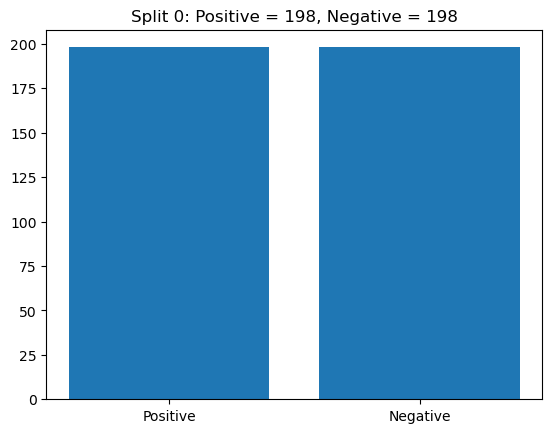

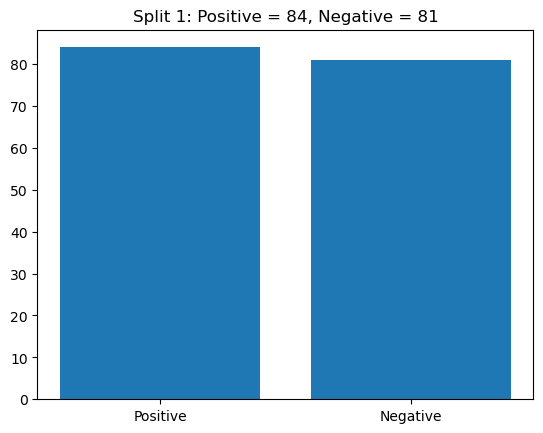

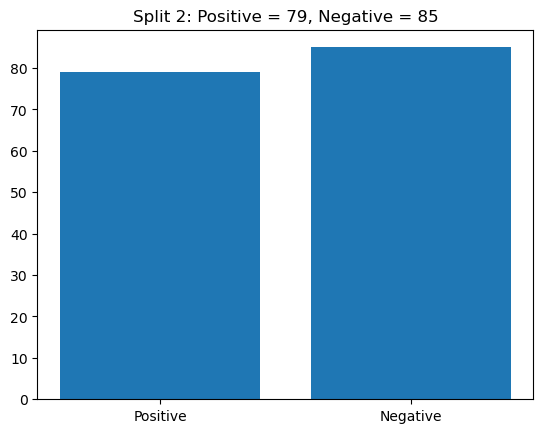

In [13]:
#import seaborn as sns
#print("Class Balance:")
#print("   Positive:",len(train_data[train_data["Class"]==1]))
#print("   Negative:",len(train_data[train_data["Class"]==-1]))   
#sns.countplot(x=train_data['Class'])
# Define a function to plot the class imbalance
def plot_class_imbalance(split):
    class_counts = split['Class'].value_counts()
    n_pos = class_counts[1]
    n_neg = class_counts[-1]
    plt.bar(['Positive', 'Negative'], [n_pos, n_neg])
    plt.title(f'Split {i}: Positive = {n_pos}, Negative = {n_neg}')
    plt.show()

# Loop over the three splits and plot the class imbalance in each split
for i, split in enumerate([data, holdout, tuning]):
    plot_class_imbalance(split)

In [14]:
#check skewness of features
features=data.iloc[:, 13:-1]
skewness = features.skew()
skewed_columns_greater = skewness[skewness > 1.5].index
skewed_columns_less = skewness[skewness < -1.5].index

print(skewed_columns_greater)
print(skewed_columns_less)

Index([], dtype='object')
Index(['feat_esm1b_877'], dtype='object')


-1.6900785484097005


<Axes: ylabel='Count'>

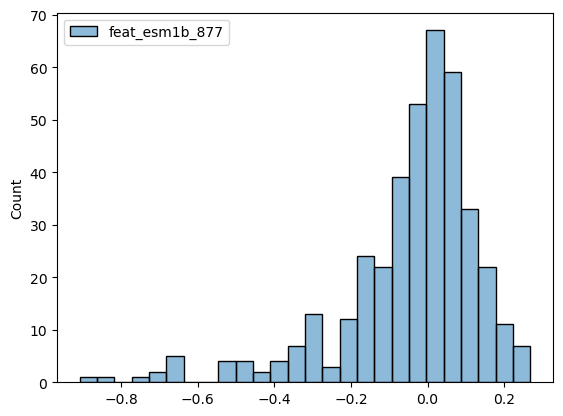

In [15]:
import seaborn as sns
#visualise feat_esm1b_877
skew_df = data[skewed_columns_less]
print(features['feat_esm1b_877'].skew())
sns.histplot(data=skew_df)

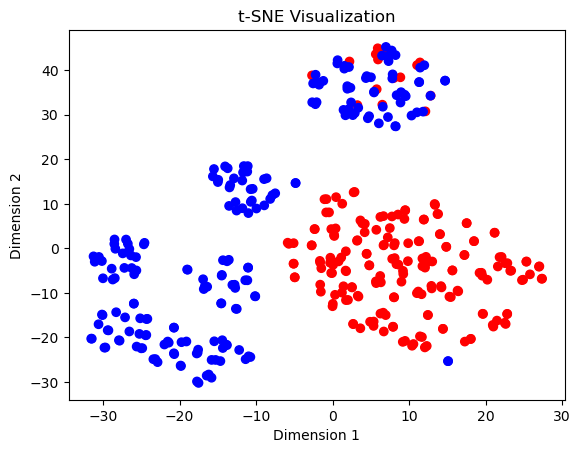

[]


In [16]:
#check for outliers -> TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

X = data.iloc[:, 13:-1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

#color for class
y = data['Class'].values
colors = ['red' if label == -1 else 'blue' for label in y]

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

outliers = X_tsne[y == -1.5]
print(outliers)

In [17]:
#check missing values
print("Total Missing:")
for x, y in enumerate(data.isnull().any()):
    if y == True:
        name = lentivirus.columns[x]
        print("   "+name+":", data[name].isnull().sum())

Total Missing:


Scaling data to normalise data (put them on a scale from 0 to 1)

In [18]:
# MinMaxScaler for scaling data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
feature_cols = list(features)

#Fit the scaler to the feature data and transform it + create new dataframe
data_norm = scaler.fit_transform(data[feature_cols])
data_norm = pd.DataFrame(data_norm, columns=feature_cols)
print(data_norm.shape)
data_norm.head()

(396, 1280)


,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,0.378842,0.489741,0.385943,0.175475,0.511956,0.613114,0.338128,0.545971,0.554642,0.415098,...,0.603196,0.335696,0.272801,0.687009,0.493712,0.436735,0.330397,0.528347,0.791272,0.397670
1,0.355912,0.361261,0.692142,0.416663,0.437074,0.579649,0.528860,0.303381,0.405903,0.473878,...,0.354412,0.272217,0.323101,0.412351,0.374145,0.357499,0.433534,0.413861,0.847261,0.612629
2,0.180835,0.544913,0.756130,0.383485,0.465451,0.590857,0.281293,0.564459,0.373826,0.269865,...,0.522342,0.534307,0.164638,0.453243,0.418944,0.287383,0.279569,0.557855,0.719502,0.683256
3,0.513551,0.379412,0.718665,0.193129,0.626823,0.602480,0.267344,0.377417,0.474182,0.407625,...,0.508934,0.476783,0.502459,0.515222,0.307101,0.163800,0.283539,0.187213,0.689565,0.774388
4,0.401705,0.538930,0.723158,0.434585,0.338824,0.663049,0.489830,0.655589,0.288827,0.341468,...,0.315440,0.534427,0.476750,0.545578,0.329483,0.267001,0.142416,0.752031,0.517265,0.659407


PCA used for feature selection

In [19]:
from sklearn.decomposition import PCA
#PCA that will retain 95% of variance
pca = PCA(n_components = 0.95, whiten=True)
datapca= pca.fit_transform(data_norm)

data_reduced = pd.DataFrame(data=datapca, index=data_norm.index)
print(data_reduced.shape)
data_reduced.head()

(396, 130)


,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,-0.908984,-0.224269,-0.247440,-0.134407,-0.728804,-0.032362,-1.223399,-0.921397,0.004917,-0.151715,...,0.619694,0.083464,0.101634,-1.196580,0.026796,-1.228727,-0.935449,0.143826,1.007756,-0.838432
1,-1.095308,-0.313138,0.395953,0.918058,-1.103075,-0.276411,-0.871021,0.385785,-1.967445,-0.005407,...,-0.089559,-0.802826,-0.859686,0.533106,0.785533,-0.517012,0.352640,-0.660487,-0.405226,-0.575576
2,-0.830740,-0.329509,-0.657039,0.072877,-0.563588,0.154985,-0.964708,0.532071,0.009023,-0.228872,...,-2.307674,-2.067814,0.155285,-0.578611,0.140058,-0.465064,0.111177,-2.084483,-0.423635,0.287440
3,-0.917948,-0.318626,0.107039,0.300163,-0.891614,0.250031,-1.175515,0.892234,-1.263036,-0.688035,...,0.311501,-0.646211,0.188790,-0.410198,-0.550174,-2.003184,-0.808700,-0.351272,-0.384394,-1.095923
4,-0.823836,-0.170049,-0.810814,-0.482582,-0.576719,0.410098,0.763833,0.891979,-0.888466,-0.924035,...,0.041323,0.371821,-1.338083,-1.376256,-0.848525,0.307350,-0.043604,-1.676687,-0.397476,0.163481


gplearn imported and model with default parameters trained on train set (train set futher split into train test)

In [20]:
#!pip install gplearn
# gplearn classifier with split 0
# further split split 0 with train-test 
# class = data['Class']
from gplearn.genetic import SymbolicClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

est = SymbolicClassifier(population_size=100,
                         generations=20,
                         tournament_size=20,
                         stopping_criteria=0.0,
                         verbose=1,
                         random_state=42)

target = data['Class']
X_train, X_test, y_train, y_test = train_test_split(data_reduced, target, test_size=0.2, random_state=42)
est.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.70          2.64259        3         0.744272              N/A      1.15s
   1     3.20         0.779603        5         0.717808              N/A      1.29s
   2     4.14         0.786453        5         0.717808              N/A      0.78s
   3     5.02         0.778641        5         0.717808              N/A      0.71s
   4     5.16         0.791572        5         0.717808              N/A      0.67s
   5     4.88         0.768129        5         0.717808              N/A      0.61s
   6     5.22         0.780839        5         0.717808              N/A      0.63s
   7     5.00         0.767028        5         0.717808              N/A      0.54s
   8     4.78         0.790639        5         0.717808              N/A  

SymbolicClassifier(population_size=100, random_state=42, verbose=1)

Performance metrics for default parameter GP

In [21]:
y_pred = est.predict(X_test)

report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:\n", report)

y_prob = est.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

Classification Report:
               precision    recall  f1-score   support

          -1       0.63      0.46      0.53        48
           1       0.42      0.59      0.49        32

    accuracy                           0.51        80
   macro avg       0.53      0.53      0.51        80
weighted avg       0.55      0.51      0.52        80

AUC Score: 0.48046875


Testing the time it would take to train gplearn classifier with large parameters. (In case I needed to use Aston server)

In [22]:
#Testing time taken for ore abitious optization
#MCC - general how well the odel is perforing across all 4 confusion atrix
#Precision - how trustworthy the positive predictions are, the true are trustworthy
est2 = SymbolicClassifier(population_size=10000,
                         generations=200,
                         tournament_size=20,
                         stopping_criteria=0.0,
                         verbose=1,
                         random_state=42)
est2.fit(X_train, y_train)
y2_pred = est2.predict(X_test)

report = classification_report(y_test, y2_pred, zero_division=0)
print("Classification Report:\n", report)

y2_prob = est2.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y2_prob)
print("AUC Score:", auc_score)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.59          2.75789        3         0.417535              N/A     18.02m
   1     3.57         0.789295        5         0.270175              N/A     16.60m
   2     3.37         0.607107        7         0.198614              N/A     14.98m
   3     2.94         0.373163        9          0.15344              N/A     14.96m
   4     4.83          0.24981       11         0.145526              N/A     15.81m
   5     7.01         0.202642       11         0.145526              N/A     17.70m
   6     8.86         0.208444       11         0.145526              N/A     18.02m
   7     9.90         0.237262       11         0.141294              N/A     15.25m
   8    11.08         0.312333       19          0.13552              N/A  

  94    37.13         0.438677       69        0.0134674              N/A      9.20m
  95    37.00         0.440376       69        0.0134674              N/A      9.53m
  96    37.33         0.460472       77         0.012623              N/A      9.40m
  97    37.55         0.438908       75        0.0122205              N/A      9.58m
  98    37.77         0.444259       87        0.0105318              N/A      9.23m
  99    37.93         0.443123       77         0.012623              N/A      8.89m
 100    38.55          0.44902       77         0.012623              N/A      9.25m
 101    38.87         0.462947       83        0.0109134              N/A      8.78m
 102    38.86         0.442266       81        0.0110551              N/A      8.68m
 103    38.43         0.444299       77         0.012623              N/A      8.97m
 104    38.93         0.430525       77         0.012623              N/A      8.43m
 105    38.95         0.416173       77         0.012623         

 191    41.24         0.469529       93       0.00367762              N/A     46.48s
 192    41.18         0.451403       93       0.00442791              N/A     41.94s
 193    41.02         0.447875       79       0.00562345              N/A     34.62s
 194    40.72         0.466356       89       0.00424345              N/A     29.17s
 195    41.01         0.443543       85       0.00541896              N/A     22.41s
 196    41.23         0.431014       85       0.00466476              N/A     17.86s
 197    40.97         0.440232       87       0.00408316              N/A     11.21s
 198    41.01           0.4284      105        0.0049622              N/A      5.77s
 199    41.23         0.460965       81       0.00495982              N/A      0.00s
Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.96      0.97        48
           1       0.94      0.97      0.95        32

    accuracy                           0.96    

Testing default model on holdout set data

In [23]:
#The above large model (10000 pop and 200 gen did not take a long time to run (around 20 minutes) therefore no need for 
# GPU server to be used for modelling)
#testing on holdout set for preliminary AUC with default params - holdout

# Model n_features is 132 so need to get 132 features for holdout
X_holdout = holdout.iloc[:, 13:-1]
X_holdout_pca = pca.transform(X_holdout)
y_holdout = holdout['Class']

y_pred_holdout = est.predict(X_holdout_pca)

report_holdout = classification_report(y_holdout, y_pred_holdout, zero_division=0)
print("Classification Report:\n", report_holdout)

y_holdout_prob = est.predict_proba(X_holdout_pca)[:, 1]
auc_score_holdout = roc_auc_score(y_holdout, y_pred_holdout)
print("AUC Score:", auc_score_holdout)

Classification Report:
               precision    recall  f1-score   support

          -1       0.44      0.46      0.45        81
           1       0.46      0.44      0.45        84

    accuracy                           0.45       165
   macro avg       0.45      0.45      0.45       165
weighted avg       0.45      0.45      0.45       165

AUC Score: 0.4486331569664903


Testing large parameter model on holdoutset

In [24]:
#Testing on large parameter model
y_pred_holdout2 = est2.predict(X_holdout_pca)

report_holdout2 = classification_report(y_holdout, y_pred_holdout2, zero_division=0)
print("Classification Report:\n", report_holdout2)

y_holdout2_prob = est2.predict_proba(X_holdout_pca)[:, 1]
auc_score_holdout2 = roc_auc_score(y_holdout, y_pred_holdout2)
print("AUC Score:", auc_score_holdout2)

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.15      0.26        81
           1       0.55      1.00      0.71        84

    accuracy                           0.58       165
   macro avg       0.77      0.57      0.48       165
weighted avg       0.77      0.58      0.49       165

AUC Score: 0.5740740740740741


In [25]:
#Hyperparameter tuning using tuning set - using gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'population_size': [100, 500, 1000],
    'generations': [5, 10, 50],
    'tournament_size': [10, 20, 50],
    'p_crossover': [0.6, 0.8, 0.9],
    'p_subtree_mutation': [0.001, 0.01, 0.1],
    'stopping_criteria': [0],
    'verbose': [1],
    'random_state': [42]
}

classifier = SymbolicClassifier()
X_tuning = tuning.iloc[:, 13:-1]
y_tuning = tuning['Class']

auc_scorer = make_scorer(roc_auc_score)
grid_search = GridSearchCV(classifier, param_grid, scoring= auc_scorer, cv=5)
grid_search.fit(X_tuning, y_tuning)

best_params = grid_search.best_params_

# Print current best parameters and their AUC score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.55984        3         0.662991              N/A      0.28s
   1     3.30          0.68562        5         0.651629              N/A      0.15s
   2     3.26         0.665736        5         0.633508              N/A      0.09s
   3     3.98         0.652286        7         0.619659              N/A      0.04s
   4     5.54         0.635927        9         0.596655              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.53718        3          0.66655              N/A      0.23s


   1     3.02         0.668156        5         0.633614              N/A      0.12s
   2     4.96           0.6449        7         0.614692              N/A      0.08s
   3     6.80         0.628577       13         0.599831              N/A      0.04s
   4    11.78         0.623841       13         0.598808              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.59328        3         0.647913              N/A      0.19s
   1     3.02         0.666699        5          0.62683              N/A      0.12s
   2     5.04         0.638776        9         0.602254              N/A      0.08s
   3     8.04         0.618558       13         0.584421              N/A      0.04s
   4    12.44         0.600503       15          0.57707              N/A  

   4     4.26          0.59811        9         0.529744              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64           2.4314        3         0.639505              N/A      0.95s
   1     3.20         0.670872        3         0.596441              N/A      0.60s
   2     3.52         0.639768        5         0.573067              N/A      0.40s
   3     3.62         0.602471        5         0.536656              N/A      0.20s
   4     6.04         0.575848        9         0.495262              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


   0    22.55          2.47566        3         0.624896              N/A      2.07s
   1     3.26         0.678515        5         0.599838              N/A      1.36s
   2     3.30         0.638814        3         0.570098              N/A      0.87s
   3     4.70         0.610467        9         0.490356              N/A      0.45s
   4     6.62         0.575261       17         0.457892              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47418        3         0.642032              N/A      1.94s
   1     3.19         0.679267        3         0.605947              N/A      1.20s
   2     3.21         0.651525        7         0.589497              N/A      0.81s
   3     4.33         0.627098        9         0.560273              N/A  

   4     5.02         0.653573        9         0.613324              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.55984        3         0.662991              N/A      0.20s
   1     3.08         0.679056        3         0.646031              N/A      0.12s
   2     3.20         0.662882        5         0.639837              N/A      0.09s
   3     4.04         0.647314        7         0.633651              N/A      0.04s
   4     5.46         0.644861        7         0.633558              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


   0    21.64          2.42483        3         0.632512              N/A      0.96s
   1     3.38         0.715433        5         0.613086              N/A      0.59s
   2     3.03          0.65717        5         0.599043              N/A      0.39s
   3     3.73         0.633868        5         0.558594              N/A      0.20s
   4     4.61         0.602616        7         0.520493              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43855        3         0.642032              N/A      0.96s
   1     3.36         0.716674        3         0.638799              N/A      0.61s
   2     2.99         0.661337        7         0.610452              N/A      0.41s
   3     3.44         0.648164        7         0.588582              N/A  

   2     3.18         0.630203        7         0.575344              N/A      0.41s
   3     3.80         0.605611        9          0.52627              N/A      0.20s
   4     7.17         0.561109       13         0.474641              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47512        3         0.639505              N/A      1.92s
   1     3.57         0.689367        1         0.604609              N/A      1.21s
   2     3.11         0.665046        5         0.575891              N/A      0.80s
   3     3.50         0.641179        9         0.550249              N/A      0.41s
   4     3.14           0.6063        9         0.515654              N/A      0.00s
    |   Population Average    |             Best Individual              |


   4    11.10         0.571339       23         0.468774              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47566        3         0.624896              N/A      2.05s
   1     3.23         0.676191        5         0.607387              N/A      1.25s
   2     3.77         0.627036        9         0.562585              N/A      0.83s
   3     5.91         0.589164       11         0.493853              N/A      0.42s
   4     8.64         0.540986       15          0.41913              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


   4     7.16         0.660346        7         0.621777              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.55984        3         0.662991              N/A      0.20s
   1     3.18         0.713074        5         0.645408              N/A      0.13s
   2     4.62         0.698935        9         0.621262              N/A      0.09s
   3     7.18         0.642681       11         0.617022              N/A      0.04s
   4    10.54         0.639375       11         0.617022              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


   0    21.64          2.42483        3         0.632512              N/A      1.18s
   1     3.15         0.704636        5         0.626883              N/A      0.61s
   2     3.22         0.685875        5         0.604703              N/A      0.41s
   3     4.14         0.685434        5         0.565942              N/A      0.21s
   4     4.76         0.660753        7           0.5172              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43855        3         0.642032              N/A      1.00s
   1     3.24          0.70508        5          0.63991              N/A      0.63s
   2     3.15         0.687286        5         0.609826              N/A      0.40s
   3     4.26         0.687304        7         0.574327              N/A  

   2     3.38         0.711482        3         0.584934              N/A      0.82s
   3     3.35         0.674642        9         0.552298              N/A      0.41s
   4     3.84         0.654822        9         0.522336              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47512        3         0.639505              N/A      1.97s
   1     3.39         0.717813        3         0.611251              N/A      1.28s
   2     3.64         0.697718        3         0.574958              N/A      0.84s
   3     4.25         0.663783        7         0.538623              N/A      0.44s
   4     5.11         0.653871       15         0.469108              N/A      0.00s
    |   Population Average    |             Best Individual              |


   4     4.90         0.675874        7         0.628314              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.53537        3         0.654274              N/A      0.19s
   1     3.06         0.683797        3         0.654274              N/A      0.12s
   2     3.26         0.665964        7         0.612974              N/A      0.08s
   3     4.72         0.654941        9         0.588293              N/A      0.04s
   4     7.76         0.658309       19         0.559036              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


   4     2.90         0.666139        3         0.652093              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64           2.4314        3         0.639505              N/A      0.95s
   1     3.64         0.697007        1         0.604609              N/A      0.60s
   2     3.00         0.662249        3         0.601861              N/A      0.40s
   3     3.20         0.632326        5         0.573739              N/A      0.20s
   4     2.47         0.601489        7          0.52031              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


   0    21.64          2.42483        3         0.632512              N/A      1.06s
   1     3.06          0.66948        3         0.597765              N/A      0.63s
   2     3.36         0.641721        5         0.568593              N/A      0.46s
   3     3.97         0.609071        7         0.530831              N/A      0.23s
   4     6.74         0.572443       11          0.48531              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43855        3         0.642032              N/A      0.98s
   1     3.09         0.671861        5         0.604452              N/A      0.63s
   2     4.34         0.642636        9         0.569166              N/A      0.42s
   3     6.88         0.597462       15         0.529842              N/A  

   2     3.14         0.643354        3         0.569848              N/A      0.82s
   3     3.96         0.615207        5         0.518709              N/A      0.41s
   4     5.25          0.58322       11          0.46451              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47512        3         0.639505              N/A      1.94s
   1     3.21         0.671908        1         0.604609              N/A      1.26s
   2     3.98         0.631728        5         0.565354              N/A      0.88s
   3     4.13         0.591876        7         0.492793              N/A      0.42s
   4     7.12         0.530713       15          0.43815              N/A      0.00s
    |   Population Average    |             Best Individual              |


   1     3.10         0.677722        5         0.640347              N/A      0.12s
   2     3.44         0.662487        7         0.630279              N/A      0.09s
   3     5.48         0.655492        7         0.620373              N/A      0.04s
   4     6.98          0.64184       13         0.613141              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.59328        3         0.647913              N/A      0.20s
   1     3.16         0.679423        5         0.638919              N/A      0.13s
   2     3.74          0.65652        7         0.617593              N/A      0.09s
   3     5.80           0.6527        9         0.609953              N/A      0.04s
   4     7.60         0.627759       13          0.58254              N/A  

   4     3.15         0.609811        5         0.532594              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64           2.4314        3         0.639505              N/A      0.97s
   1     3.48          0.68421        5         0.614631              N/A      0.63s
   2     3.34         0.650453        3         0.587748              N/A      0.42s
   3     3.86         0.646037        7         0.564782              N/A      0.22s
   4     4.13         0.595757        9         0.516856              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


   0    22.55          2.47566        3         0.624896              N/A      2.04s
   1     3.66         0.704137        3         0.600096              N/A      1.22s
   2     3.05         0.663499        5         0.577627              N/A      0.81s
   3     3.28         0.634073        9         0.549815              N/A      0.41s
   4     4.13         0.607834       13         0.500194              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47418        3         0.642032              N/A      1.95s
   1     3.42          0.70039        9         0.635044              N/A      1.26s
   2     3.15         0.668922        7         0.597542              N/A      0.84s
   3     3.91         0.650757       11         0.566294              N/A  

   2     3.42         0.632619        5         0.562084              N/A      0.84s
   3     4.92         0.593709        7         0.507406              N/A      0.43s
   4     7.22         0.547328       13         0.450326              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.55984        3         0.662991              N/A      0.19s
   1     3.52         0.717288        5         0.646291              N/A      0.13s
   2     3.30         0.667076        9         0.631747              N/A      0.08s
   3     5.14         0.712949        7         0.609647              N/A      0.04s
   4     7.40         0.763791       17         0.574244              N/A      0.00s
    |   Population Average    |             Best Individual              |


   4     5.82         0.847491        5          0.63603              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.53537        3         0.654274              N/A      0.19s
   1     3.12         0.686149        5         0.633614              N/A      0.13s
   2     5.24         0.770649        7         0.614692              N/A      0.09s
   3     6.86          0.71694       13         0.597975              N/A      0.05s
   4    12.00         0.820903       15         0.590373              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


   0    21.64          2.43833        3         0.622884              N/A      1.01s
   1     3.23         0.691809        5         0.617092              N/A      0.67s
   2     3.31          0.73377        3         0.584147              N/A      0.43s
   3     4.42         0.679618       11         0.555039              N/A      0.22s
   4     5.81         0.645325       15         0.493088              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64           2.4314        3         0.639505              N/A      0.95s
   1     3.46         0.740611        3         0.596441              N/A      0.73s
   2     3.64         0.681769        5         0.573067              N/A      1.14s
   3     3.78         0.673671        5         0.536656              N/A  

   2     3.56         0.699012        7         0.585807              N/A      0.89s
   3     5.13         0.674848       11         0.546458              N/A      0.46s
   4     8.17         0.687509       17         0.508591              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47566        3         0.624896              N/A      2.09s
   1     3.52         0.733555        5         0.599838              N/A      1.45s
   2     3.66         0.687716        3         0.570098              N/A      0.99s
   3     4.70         0.658764        9         0.501772              N/A      0.45s
   4     7.00         0.659355       13         0.444474              N/A      0.00s
    |   Population Average    |             Best Individual              |


   4     7.54         0.626066       13         0.569638              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.57866        3          0.65838              N/A      0.19s
   1     3.06         0.689614        3         0.647816              N/A      0.12s
   2     3.06         0.672482        5         0.630115              N/A      0.08s
   3     3.82         0.673089        7         0.606195              N/A      0.04s
   4     5.38         0.647381       13         0.582902              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


   0    21.64          2.41998        3         0.638666              N/A      0.95s
   1     3.44         0.694074        3         0.638666              N/A      0.61s
   2     2.94         0.666448        5         0.613787              N/A      0.41s
   3     3.34         0.651392        9         0.601089              N/A      0.20s
   4     3.55         0.634883        7         0.568639              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.42483        3         0.632512              N/A      0.95s
   1     3.37         0.692307        1          0.60891              N/A      0.61s
   2     3.00         0.657097        7         0.566893              N/A      0.41s
   3     3.21         0.627609        7         0.531463              N/A  

   2     4.43         0.639827        9         0.569166              N/A      0.42s
   3     6.99         0.597194       15         0.527578              N/A      0.22s
   4    11.84         0.565405       19         0.495919              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43833        3         0.622884              N/A      1.00s
   1     3.04         0.666346        5         0.595755              N/A      0.64s
   2     3.20         0.625076        5         0.562084              N/A      0.44s
   3     5.18         0.590326        7         0.516626              N/A      0.22s
   4     7.54         0.537837       13         0.457642              N/A      0.00s
    |   Population Average    |             Best Individual              |


   4     6.47         0.531816       15          0.43815              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55           2.4735        3         0.636732              N/A      1.93s
   1     3.06         0.670925        5         0.612667              N/A      1.30s
   2     4.43         0.635259        9         0.566193              N/A      0.86s
   3     7.10         0.603098       13         0.509284              N/A      0.44s
   4    12.05          0.55658       23         0.440394              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


   4     9.82         0.742339       17         0.580283              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.57866        3          0.65838              N/A      0.19s
   1     3.16          0.68226        5         0.638213              N/A      0.12s
   2     3.68         0.685538        5         0.626138              N/A      0.08s
   3     5.76         0.677414       11          0.59978              N/A      0.04s
   4     7.94         0.743507       11         0.571447              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


   0    21.64          2.41998        3         0.638666              N/A      0.99s
   1     3.12         0.682533        5         0.621526              N/A      0.63s
   2     3.45         0.661736        7         0.585913              N/A      0.42s
   3     4.85         0.639169        9         0.564829              N/A      0.21s
   4     7.20         0.607827       13         0.522386              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.42483        3         0.632512              N/A      1.00s
   1     3.08         0.678938        5         0.620315              N/A      0.64s
   2     3.36         0.658655        3          0.59136              N/A      0.43s
   3     4.38         0.638935        7          0.55206              N/A  

   2     3.18         0.668564        7         0.596927              N/A      0.83s
   3     4.24         0.649507        9         0.561258              N/A      0.44s
   4     6.28         0.621679        9         0.518484              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47811        3         0.622884              N/A      1.93s
   1     3.44         0.702624        3         0.596543              N/A      1.26s
   2     3.16         0.663681        3         0.577135              N/A      0.84s
   3     3.48         0.636063        7         0.545008              N/A      0.41s
   4     4.28         0.605867       11         0.518426              N/A      0.00s
    |   Population Average    |             Best Individual              |


   5     7.98         0.619072       13         0.583226              N/A      0.16s
   6    10.28         0.607133       15         0.572879              N/A      0.12s
   7    12.08         0.598106       21         0.570867              N/A      0.08s
   8    14.24         0.592537       21         0.570867              N/A      0.04s
   9    14.72         0.589372       21         0.570867              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.53718        3          0.66655              N/A      0.45s
   1     3.16         0.687515        5         0.657654              N/A      0.31s
   2     3.38         0.670074        3         0.652763              N/A      0.28s
   3     2.94         0.659894        5         0.636887              N/A  

   4     7.54         0.624543       13         0.593505              N/A      0.21s
   5    11.12         0.607205       15         0.590182              N/A      0.16s
   6    14.00          0.60167       15         0.590182              N/A      0.13s
   7    14.66          0.61404       15         0.590182              N/A      0.08s
   8    14.58         0.602996       15         0.590182              N/A      0.04s
   9    14.80         0.603171       15         0.590182              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.57866        3          0.65838              N/A      0.44s
   1     3.02          0.68061        5         0.638213              N/A      0.31s
   2     3.54         0.665521        7         0.635856              N/A  

   0    21.64          2.41998        3         0.638666              N/A      2.20s
   1     3.48         0.690977        3         0.638666              N/A      1.56s
   2     2.90         0.662192        1         0.625561              N/A      1.37s
   3     3.00         0.650621        5         0.589202              N/A      1.17s
   4     2.94         0.633322        7         0.556955              N/A      0.97s
   5     4.10         0.615594       15         0.518862              N/A      0.79s
   6     5.95         0.587028       15         0.504722              N/A      0.60s
   7     9.81         0.553888       15         0.484894              N/A      0.59s
   8    13.36         0.537595       23         0.461767              N/A      0.23s
   9    16.76         0.512113       27         0.432182              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

   7    15.56         0.560496       21         0.532377              N/A      0.42s
   8    17.07         0.568556       23         0.530916              N/A      0.21s
   9    17.13         0.556006       23         0.532157              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43833        3         0.622884              N/A      2.14s
   1     3.05          0.67693        3         0.622884              N/A      1.56s
   2     2.99         0.639416        5         0.594943              N/A      1.37s
   3     3.48         0.620836        5         0.562084              N/A      1.18s
   4     4.26          0.59811        9         0.529744              N/A      0.98s
   5     6.03         0.567951       13          0.49521              N/A  

   1     3.41         0.697156        5         0.612251              N/A      3.28s
   2     3.06         0.661747        5         0.612251              N/A      3.02s
   3     3.28          0.63969        5         0.581499              N/A      2.45s
   4     4.36         0.620251        9         0.547904              N/A      2.06s
   5     6.06         0.597917       15         0.502079              N/A      1.75s
   6     9.22         0.564131       21         0.448091              N/A      1.24s
   7    13.68         0.524737       29         0.432921              N/A      0.86s
   8    19.82          0.49439       31         0.416307              N/A      0.44s
   9    26.05         0.460623       41         0.393707              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  

   8    28.35         0.464033       33         0.403381              N/A      0.45s
   9    29.08         0.447088       35         0.391682              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47811        3         0.622884              N/A      4.54s
   1     3.13         0.675938        5         0.599874              N/A      3.18s
   2     3.13         0.639831        3         0.584147              N/A      2.84s
   3     4.09         0.617062        7         0.541235              N/A      2.44s
   4     5.29         0.592309       11         0.487882              N/A      3.59s
   5     7.92         0.550582       19         0.426651              N/A      1.63s
   6    12.17         0.501217       23         0.405164              N/A  

   4     4.40         0.650225       11         0.618893              N/A      0.21s
   5     6.98         0.638641       11         0.599937              N/A      0.17s
   6     9.12         0.629965       11         0.599937              N/A      0.12s
   7    10.94         0.633105       11         0.599937              N/A      0.08s
   8    11.04         0.618209       15         0.593534              N/A      0.04s
   9    11.16         0.625599       15         0.593534              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.53537        3         0.654274              N/A      0.44s
   1     3.06         0.684862        3         0.654274              N/A      0.31s
   2     3.28         0.678764        5         0.629729              N/A  

   4     7.20         0.652794        7         0.621777              N/A      0.21s
   5     8.12         0.643755        9         0.616797              N/A      0.17s
   6     7.52         0.634387        9         0.616797              N/A      0.13s
   7     9.18         0.637708        9         0.616797              N/A      0.09s
   8     8.84          0.63074        9         0.616797              N/A      0.04s
   9     8.74         0.651781        9         0.616797              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.55984        3         0.662991              N/A      0.45s
   1     3.04          0.67311        5         0.645408              N/A      0.33s
   2     4.60         0.672424        9         0.621262              N/A  

   0    21.64          2.42483        3         0.632512              N/A      2.36s
   1     3.38         0.715433        5         0.613086              N/A      1.70s
   2     3.03          0.65717        5         0.599043              N/A      1.47s
   3     3.73         0.633868        5         0.558594              N/A      1.46s
   4     4.61         0.602616        7         0.520493              N/A      1.02s
   5     6.12         0.574145       11          0.46293              N/A      0.86s
   6     8.53         0.532418       21         0.407993              N/A      0.67s
   7    13.63         0.486897       25         0.395566              N/A      0.50s
   8    19.83         0.457191       31         0.384327              N/A      0.25s
   9    23.70         0.435628       29         0.380975              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

   8    14.44         0.480355       19         0.440777              N/A      0.21s
   9    16.20         0.468957       19         0.433948              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64           2.4314        3         0.639505              N/A      2.44s
   1     3.22          0.67103        3         0.596441              N/A      1.68s
   2     3.52         0.639759        5         0.573067              N/A      1.43s
   3     3.63         0.604584        5         0.536656              N/A      1.34s
   4     6.05         0.579143        9         0.495262              N/A      1.08s
   5     8.36         0.532499       13         0.475586              N/A      0.88s
   6    11.31         0.501677       17         0.468439              N/A  

   2     3.02         0.657703        5         0.587165              N/A      2.75s
   3     3.11         0.631048        9         0.549815              N/A      2.36s
   4     3.95         0.605116       13          0.49544              N/A      1.99s
   5     6.29         0.588315       15         0.450801              N/A      1.61s
   6     9.50         0.534315       17         0.414689              N/A      1.26s
   7    13.61         0.486306       25         0.383585              N/A      0.84s
   8    18.63         0.443697       27         0.358224              N/A      0.44s
   9    25.20         0.410184       37         0.337852              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47418        3         0.642032              N/A  

   9    28.50         0.407206       43         0.340417              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47512        3         0.639505              N/A      4.56s
   1     3.26         0.680097        1         0.604609              N/A      3.67s
   2     3.69         0.634242        3          0.56766              N/A      3.17s
   3     3.77         0.593811        5         0.513754              N/A      2.90s
   4     6.12         0.548508       15          0.45032              N/A      2.30s
   5    10.03         0.491829       19         0.418081              N/A      1.87s
   6    17.39         0.447941       25         0.402714              N/A      1.43s
   7    22.54          0.44071       31         0.386792              N/A  

   4     6.42         0.650555       11         0.576953              N/A      0.21s
   5     8.84         0.621242       13         0.560279              N/A      0.18s
   6    11.34         0.622507       19         0.533986              N/A      0.13s
   7    14.16          0.59862       25         0.517874              N/A      0.08s
   8    18.24         0.632782       25         0.517874              N/A      0.04s
   9    20.40          0.58288       23         0.507227              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.59328        3         0.647913              N/A      0.44s
   1     3.32         0.703876        5         0.643847              N/A      0.32s
   2     3.26         0.734398        7         0.617711              N/A  

   1     3.18         0.713074        5         0.645408              N/A      0.34s
   2     4.62         0.698935        9         0.621262              N/A      0.31s
   3     7.18         0.642681       11         0.617022              N/A      0.26s
   4    10.54         0.639375       11         0.617022              N/A      0.22s
   5    10.06         0.654625       17         0.594184              N/A      0.18s
   6    13.64         0.621207       13          0.59413              N/A      0.14s
   7    16.24         0.714679       13         0.572741              N/A      0.09s
   8    13.60         0.613195       21          0.55768              N/A      0.05s
   9    18.92         0.619302       25         0.539902              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  

   8    18.25         0.514699       27         0.391969              N/A      0.26s
   9    23.41         0.474688       25         0.388431              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43855        3         0.642032              N/A      2.18s
   1     3.36         0.728011        3         0.638799              N/A      1.63s
   2     3.09         0.700471        7         0.610452              N/A      1.44s
   3     3.52         0.678733        7         0.588582              N/A      1.25s
   4     5.28         0.700123       11         0.577385              N/A      1.05s
   5     6.36         0.661432       13         0.537197              N/A      0.86s
   6     8.80         0.635845       15          0.51373              N/A  

   2     3.76         0.746083        5         0.573067              N/A      1.48s
   3     3.69         0.643796        5         0.536656              N/A      1.28s
   4     6.03         0.637903        9         0.495262              N/A      1.08s
   5     8.41         0.580331       13         0.475586              N/A      0.87s
   6    11.24         0.531569       19         0.448648              N/A      0.66s
   7    13.84         0.573498       21         0.436728              N/A      0.45s
   8    17.14          0.50079       23         0.423684              N/A      0.23s
   9    21.22         0.502512       25         0.419172              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.41998        3         0.638666              N/A  

   9    22.74         0.493306       33         0.358839              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47418        3         0.642032              N/A      4.46s
   1     3.48         0.730154        5         0.631647              N/A      3.29s
   2     3.40         0.712144        7         0.598466              N/A      2.90s
   3     3.97         0.683669        9         0.546615              N/A      2.46s
   4     5.78         0.662977       13         0.512972              N/A      2.08s
   5     8.59         0.648463       23         0.439263              N/A      1.71s
   6    12.69         0.600588       25         0.430884              N/A      1.32s
   7    19.09         0.564532       35         0.404736              N/A  

   3     3.91         0.693324        5         0.513754              N/A      2.75s
   4     6.07         0.580934       15          0.45032              N/A      2.20s
   5     9.99         0.539159       19         0.418081              N/A      1.79s
   6    17.05         0.498208       27         0.402957              N/A      1.43s
   7    21.95         0.474448       37         0.378659              N/A      0.95s
   8    23.82         0.484397       41         0.359864              N/A      0.48s
   9    28.87         0.454281       51         0.354529              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55           2.4735        3         0.636732              N/A      4.37s
   1     3.31         0.757778        5         0.612667              N/A  

   0    22.60          2.59328        3         0.647913              N/A      0.44s
   1     3.18          0.68663        5         0.643847              N/A      0.32s
   2     3.28         0.661364        7         0.617711              N/A      0.28s
   3     5.00          0.64881       13         0.587201              N/A      0.25s
   4     8.30         0.657218       17         0.582731              N/A      0.21s
   5    12.58         0.604995       19          0.57024              N/A      0.17s
   6    15.56         0.598111       23         0.557984              N/A      0.13s
   7    16.80         0.592397       19         0.552223              N/A      0.09s
   8    18.38         0.579505       21         0.547735              N/A      0.04s
   9    19.36         0.595447       21         0.547735              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

   8    18.60         0.600324       21         0.573851              N/A      0.05s
   9    19.96         0.601328       21         0.573851              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.53718        3          0.66655              N/A      0.45s
   1     3.08          0.67817        5         0.656796              N/A      0.33s
   2     3.96         0.664029        5          0.64276              N/A      0.30s
   3     4.62         0.655693        7         0.639911              N/A      0.25s
   4     5.52         0.652305        5          0.63398              N/A      0.21s
   5     5.24         0.639236        7         0.616648              N/A      0.17s
   6     7.02         0.627861       11         0.608601              N/A  

   2     2.89         0.658824        5         0.604452              N/A      1.41s
   3     3.34         0.643775        5         0.581176              N/A      1.21s
   4     4.88         0.622538       13         0.535058              N/A      1.15s
   5     6.97         0.594165       15         0.492368              N/A      0.88s
   6    10.53         0.566585       25         0.450343              N/A      0.64s
   7    16.21         0.530301       37         0.439862              N/A      0.47s
   8    22.72         0.511132       41         0.405998              N/A      0.23s
   9    29.09         0.477737       41         0.403332              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43833        3         0.622884              N/A  

   9    16.38         0.480876       19         0.452329              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.41998        3         0.638666              N/A      2.28s
   1     3.10         0.674007        3         0.612931              N/A      1.68s
   2     3.65         0.647178        7         0.576954              N/A      1.46s
   3     5.41          0.61106       11         0.534382              N/A      1.26s
   4     8.67         0.572815       19         0.484224              N/A      1.15s
   5    15.27         0.526693       25          0.44965              N/A      0.91s
   6    22.17         0.494975       31         0.432356              N/A      0.69s
   7    25.55         0.493986       41         0.428785              N/A  

   3     3.93         0.648131       11         0.566294              N/A      2.50s
   4     5.65         0.622967        9         0.518484              N/A      2.10s
   5     8.25         0.592708       13         0.484244              N/A      1.74s
   6    13.08         0.571779       19         0.449107              N/A      1.36s
   7    17.98         0.549385       31         0.429889              N/A      1.53s
   8    22.81         0.533761       37         0.399248              N/A      0.47s
   9    26.03         0.520556       37         0.397946              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47811        3         0.622884              N/A      4.51s
   1     3.44         0.696585        3         0.596543              N/A  

   0    22.55           2.4735        3         0.636732              N/A      4.50s
   1     3.08         0.670437        5         0.612667              N/A      3.42s
   2     4.31         0.633677        9         0.566193              N/A      3.47s
   3     7.09         0.602418       11         0.513667              N/A      2.81s
   4    11.90         0.551978       23         0.436812              N/A      2.36s
   5    20.11         0.492513       41         0.383141              N/A      1.90s
   6    34.03         0.432099       53         0.352742              N/A      1.50s
   7    43.26         0.410794       75         0.331439              N/A      1.03s
   8    48.71         0.391234       69         0.326338              N/A      0.52s
   9    50.76         0.394971       69         0.302522              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

   7    16.82         0.594035       19         0.552223              N/A      0.11s
   8    18.30         0.579011       21         0.547735              N/A      0.05s
   9    19.34          0.59504       21         0.547735              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.57866        3          0.65838              N/A      0.50s
   1     3.00         0.688827        3         0.647816              N/A      0.39s
   2     3.10         0.671504        5         0.630115              N/A      0.33s
   3     3.76         0.690535        7         0.606195              N/A      0.26s
   4     5.82         0.681537       13         0.582902              N/A      0.22s
   5     8.74         0.698602       15         0.557976              N/A  

   2     4.10         0.667666        5          0.64276              N/A      0.33s
   3     4.58         0.657815        7         0.639911              N/A      0.32s
   4     5.46         0.668754        5          0.63603              N/A      0.24s
   5     5.46         0.660227        9          0.63299              N/A      0.20s
   6     5.02         0.643134        7          0.63323              N/A      0.14s
   7     6.72         0.639882        7          0.63323              N/A      0.09s
   8     6.84         0.641766        7          0.63323              N/A      0.04s
   9     7.10         0.654956        7          0.63323              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.53537        3         0.654274              N/A  

   9    30.94         0.475883       43         0.385251              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43833        3         0.622884              N/A      2.26s
   1     3.35         0.693998        1         0.611517              N/A      1.62s
   2     2.82         0.658074        3         0.591215              N/A      1.52s
   3     2.82         0.635188        5         0.562084              N/A      1.25s
   4     3.15         0.609811        5         0.532594              N/A      1.01s
   5     4.36          0.59766        7         0.508258              N/A      0.84s
   6     5.98         0.551573       11          0.46945              N/A      0.66s
   7     8.77         0.515298       19         0.429889              N/A  

   3     5.40          0.61449       11         0.534382              N/A      1.31s
   4     8.70         0.578195       19         0.484224              N/A      1.19s
   5    15.23         0.532274       25          0.44965              N/A      0.98s
   6    22.13         0.500624       31         0.432356              N/A      0.79s
   7    25.48         0.483048       41         0.428785              N/A      0.47s
   8    30.02         0.483597       33          0.42827              N/A      0.24s
   9    29.74         0.484923       41         0.423172              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.42483        3         0.632512              N/A      2.31s
   1     3.19         0.670634        3         0.597765              N/A  

   0    22.55          2.47811        3         0.622884              N/A      4.36s
   1     3.43         0.699354        3         0.596543              N/A      3.27s
   2     3.14         0.663693        3         0.584934              N/A      2.85s
   3     3.16         0.636219        9          0.55557              N/A      2.43s
   4     3.76         0.610058        9         0.519877              N/A      2.06s
   5     5.49         0.587212       15         0.478588              N/A      1.65s
   6     8.70         0.550215       17         0.425895              N/A      1.28s
   7    13.08         0.500097       23         0.392256              N/A      0.87s
   8    19.17         0.459053       33         0.367998              N/A      0.45s
   9    25.11         0.434478       37         0.360664              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

   7    43.13         0.407072       75         0.331439              N/A      1.02s
   8    48.74         0.395141       69         0.326338              N/A      0.53s
   9    51.18         0.376794       69         0.302522              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47566        3         0.624896              N/A      4.36s
   1     3.17         0.675113        5         0.600006              N/A      3.40s
   2     3.89          0.63007        9         0.562585              N/A      3.00s
   3     6.04          0.59311       11         0.493853              N/A      4.45s
   4     9.31         0.540061       19         0.409836              N/A      2.23s
   5    14.99          0.46965       29         0.345781              N/A  

   4     5.82          0.78368       13         0.582902              N/A      0.23s
   5     8.84         0.750971       15         0.557976              N/A      0.18s
   6     9.82         0.701198       17         0.545115              N/A      0.14s
   7    12.16         0.668586       21         0.533987              N/A      0.09s
   8    14.40         0.614222       17         0.545115              N/A      0.05s
   9    16.26         0.620637       21         0.528725              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.55984        3         0.662991              N/A      0.44s
   1     3.26         0.696921        5         0.644969              N/A      0.33s
   2     3.72          0.67161        7          0.61604              N/A  

   4    12.00         0.820903       15         0.590373              N/A      0.24s
   5    13.34         0.731953       23         0.577655              N/A      0.26s
   6    18.86         0.678446       17         0.577107              N/A      0.14s
   7    18.44         0.613997       17         0.564482              N/A      0.10s
   8    16.58         0.658616       27         0.555528              N/A      0.05s
   9    18.74         0.633558       27         0.555528              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.59328        3         0.647913              N/A      0.44s
   1     3.12         0.684973        5          0.62683              N/A      0.34s
   2     5.34          0.76952        9         0.602254              N/A  

   0    21.64           2.4314        3         0.639505              N/A      2.19s
   1     3.61         0.701304        5         0.614631              N/A      1.76s
   2     3.50         0.736826        7         0.585842              N/A      1.49s
   3     4.28         0.682907        7         0.564782              N/A      1.33s
   4     4.81         0.655867       11         0.510259              N/A      1.10s
   5     6.13         0.608524       11         0.471987              N/A      0.88s
   6     9.35         0.572266       19         0.448791              N/A      0.69s
   7    12.35         0.569169       19         0.448791              N/A      0.46s
   8    14.01         0.550084       19         0.448791              N/A      0.23s
   9    17.36         0.581651       21         0.446399              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

   7    19.57         0.487097       33         0.387085              N/A      0.48s
   8    24.35         0.464531       31         0.365679              N/A      0.24s
   9    26.17         0.466984       39         0.353915              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43855        3         0.642032              N/A      2.19s
   1     3.33         0.735117        5         0.604452              N/A      1.88s
   2     4.43         0.680598        9         0.569166              N/A      1.61s
   3     6.87         0.665804       15         0.529842              N/A      1.45s
   4    10.84         0.627629       17         0.503166              N/A      1.19s
   5    14.95         0.574149       27         0.473894              N/A  

   1     3.51         0.736106        1         0.604609              N/A      3.48s
   2     3.79         0.698648        3         0.574958              N/A      3.00s
   3     3.69         0.665435        7         0.538623              N/A      2.57s
   4     5.14         0.661438       13         0.458707              N/A      2.18s
   5     8.43         0.569017       21         0.407031              N/A      1.75s
   6    14.35            0.503       29         0.363649              N/A      1.37s
   7    22.42          0.46633       43         0.343421              N/A      0.95s
   8    30.48         0.440874       45         0.335876              N/A      0.49s
   9    33.95         0.470858       65         0.324197              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  

   8    38.99         0.388553       45         0.281463              N/A      0.55s
   9    40.31         0.398516       57         0.279657              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47418        3         0.642032              N/A      5.07s
   1     3.43          0.74588        5         0.608096              N/A      3.73s
   2     4.32         0.688446        7         0.569349              N/A      3.26s
   3     6.55         0.662457       11          0.52254              N/A      3.02s
   4    10.17         0.607765       15         0.471889              N/A      2.42s
   5    15.81         0.562535       27         0.428237              N/A      1.99s
   6    24.38         0.516043       35         0.410919              N/A  

   3     6.34         0.639517       11          0.58514              N/A      0.26s
   4    10.48         0.623782       19         0.557027              N/A      0.22s
   5    16.06         0.584772       31         0.526809              N/A      0.18s
   6    20.32         0.571349       31         0.526809              N/A      0.13s
   7    25.28         0.559303       31         0.523976              N/A      0.09s
   8    25.08         0.561452       33         0.515958              N/A      0.05s
   9    25.70         0.554603       33         0.515958              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.53718        3          0.66655              N/A      0.43s
   1     3.22          0.68416        5         0.663909              N/A  

   3     8.36         0.621562       13         0.584421              N/A      0.27s
   4    12.00          0.60782       23         0.573642              N/A      0.22s
   5    15.68         0.596585       21         0.572664              N/A      0.18s
   6    15.46         0.596865       25         0.575638              N/A      0.13s
   7    16.18         0.590641       15         0.566196              N/A      0.09s
   8    14.42         0.590682       23         0.555753              N/A      0.05s
   9    18.60         0.580571       25         0.549539              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.57866        3          0.65838              N/A      0.43s
   1     3.12         0.682901        5         0.644297              N/A  

   0    21.64          2.41998        3         0.638666              N/A      2.12s
   1     3.12         0.680868        5         0.621526              N/A      1.64s
   2     3.40         0.656531        7         0.585913              N/A      1.44s
   3     4.86         0.641227        9         0.564829              N/A      1.27s
   4     7.19         0.607451       13         0.522386              N/A      1.15s
   5    10.43         0.569976       21          0.45927              N/A      0.97s
   6    17.34         0.524186       35         0.429808              N/A      0.84s
   7    26.42         0.492121       33          0.41596              N/A      0.55s
   8    30.41         0.471666       39         0.413182              N/A      0.25s
   9    33.12         0.463303       39          0.40893              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

   7    22.70         0.518264       25         0.456405              N/A      0.50s
   8    23.17         0.505636       35          0.45155              N/A      0.26s
   9    26.29         0.494455       29         0.445566              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43833        3         0.622884              N/A      2.80s
   1     3.04         0.666346        5         0.595755              N/A      2.06s
   2     3.20         0.625076        5         0.562084              N/A      1.79s
   3     5.18         0.590326        7         0.516626              N/A      1.43s
   4     7.54         0.537837       13         0.457642              N/A      1.15s
   5    12.74         0.493616       23         0.434966              N/A  

   1     3.09         0.682026        5          0.61044              N/A      3.72s
   2     3.26         0.651289        7         0.585807              N/A      3.11s
   3     5.34         0.629933       11         0.544427              N/A      3.30s
   4     8.02         0.603054       19         0.478209              N/A      2.61s
   5    13.01         0.561738       27         0.417931              N/A      2.25s
   6    19.79         0.505576       43         0.373488              N/A      1.61s
   7    30.91         0.457593       63         0.340708              N/A      1.12s
   8    42.18         0.410216       71         0.323996              N/A      0.58s
   9    51.51          0.38659       71         0.312406              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  

   8    41.36         0.427636       57         0.357902              N/A      0.52s
   9    43.58         0.408021       55         0.341285              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47811        3         0.622884              N/A      4.37s
   1     3.15         0.668608        5         0.595755              N/A      3.42s
   2     3.46         0.629924        5         0.562084              N/A      3.06s
   3     5.02         0.589034        9         0.506817              N/A      2.63s
   4     7.43         0.537939       15         0.432459              N/A      2.20s
   5    12.46         0.481466       25         0.379958              N/A      1.79s
   6    22.76         0.426684       31         0.355852              N/A  

   4     5.50         0.750377        9         0.613173              N/A      0.22s
   5     7.88         0.631172       11         0.608544              N/A      0.17s
   6     9.64         0.629354       11         0.608544              N/A      0.13s
   7     9.80         0.626623       11         0.608544              N/A      0.09s
   8    10.74         0.625655        9           0.5889              N/A      0.04s
   9    10.70          0.61922       13         0.577581              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.53537        3         0.654274              N/A      0.47s
   1     3.18         0.677937        5         0.640347              N/A      0.34s
   2     3.34         0.683315        7         0.630279              N/A  

   2     4.74         0.675066        7         0.616421              N/A      0.33s
   3     5.98         0.666305       11         0.587764              N/A      0.28s
   4     9.38         0.635935       11         0.587764              N/A      0.23s
   5    11.02         0.613009       11         0.587764              N/A      0.18s
   6    11.14         0.632658       11         0.587764              N/A      0.14s
   7    11.28           0.6165       11         0.587764              N/A      0.09s
   8    10.54         0.630949       11         0.587764              N/A      0.05s
   9    11.54         0.617089       11         0.587764              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64           2.4314        3         0.639505              N/A  

   9    31.54         0.465606       37         0.407595              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.42483        3         0.632512              N/A      2.37s
   1     3.08         0.678938        5         0.620315              N/A      1.83s
   2     3.36         0.658655        3          0.59136              N/A      1.63s
   3     4.38         0.638935        7          0.55206              N/A      1.35s
   4     4.90         0.603235       11         0.486062              N/A      1.10s
   5     7.34         0.566929       15         0.436853              N/A      0.94s
   6    12.47         0.504659       25         0.392964              N/A      0.75s
   7    20.26         0.464385       31         0.367936              N/A  

   3     5.18         0.592871        7         0.516626              N/A      1.40s
   4     7.53         0.539185       13         0.457642              N/A      1.10s
   5    12.74         0.511252       23         0.434966              N/A      0.94s
   6    17.71         0.479443       23         0.434966              N/A      0.71s
   7    19.60         0.479482       23         0.434937              N/A      0.47s
   8    19.60          0.48395       19         0.430032              N/A      0.26s
   9    20.43         0.466311       19         0.418808              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47512        3         0.639505              N/A      4.48s
   1     3.60          0.69818        3         0.601861              N/A  

   0    22.55          2.47566        3         0.624896              N/A      4.32s
   1     3.24         0.690189        5         0.599838              N/A      3.41s
   2     3.38         0.645484        3         0.570098              N/A      3.25s
   3     4.71         0.614667        9         0.501772              N/A      2.92s
   4     6.92         0.577931       15         0.437622              N/A      2.46s
   5    11.38         0.536452       23         0.357968              N/A      1.90s
   6    18.67         0.445428       33         0.300474              N/A      1.41s
   7    29.79         0.382033       45         0.281203              N/A      1.02s
   8    38.53         0.346013       71         0.257012              N/A      0.54s
   9    43.08         0.342281       71         0.229291              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

   7    29.21         0.408417       39          0.34455              N/A      1.10s
   8    32.83         0.408245       45         0.343044              N/A      0.53s
   9    34.72         0.386888       37         0.342303              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.55984        3         0.662991              N/A      2.43s
   1     3.30          0.68562        5         0.651629              N/A      1.88s
   2     3.26         0.665736        5         0.633508              N/A      1.82s
   3     3.98         0.652286        7         0.619659              N/A      2.40s
   4     5.54         0.635927        9         0.596655              N/A      1.85s
   5     7.98         0.619072       13         0.583226              N/A  

  41    14.80         0.615679       15         0.588285              N/A      0.39s
  42    15.90         0.602896       15         0.588285              N/A      0.30s
  43    14.74         0.609274       17         0.583562              N/A      0.26s
  44    15.46         0.607717       17         0.583562              N/A      0.22s
  45    15.78         0.606213       17         0.583562              N/A      0.17s
  46    17.64         0.602277       17         0.583562              N/A      0.13s
  47    17.24         0.614962       17         0.583562              N/A      0.09s
  48    18.44         0.603534       17         0.583562              N/A      0.04s
  49    17.04         0.618818       17         0.583562              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  

  34    19.16          0.58564       19         0.568265              N/A      0.66s
  35    19.48         0.582426       21         0.566722              N/A      0.61s
  36    18.36          0.58434       21         0.566722              N/A      0.56s
  37    17.82         0.594889       21         0.566722              N/A      0.52s
  38    17.78         0.587803       19         0.568265              N/A      0.49s
  39    18.56         0.585586       21         0.566722              N/A      0.44s
  40    18.74         0.586658       21         0.566722              N/A      0.39s
  41    18.64         0.592129       21         0.566722              N/A      0.36s
  42    18.70         0.586203       21         0.566722              N/A      0.31s
  43    17.98         0.589138       21         0.566722              N/A      0.26s
  44    19.08         0.590066       21         0.566722              N/A      0.23s
  45    18.76         0.583628       19         0.568265         

  26    10.38         0.615496       13          0.60097              N/A      0.97s
  27    11.24         0.628055       13          0.60097              N/A      0.92s
  28    11.20         0.611392       15          0.60125              N/A      0.87s
  29    11.72         0.609548       13          0.60097              N/A      0.83s
  30    11.24         0.612678       13          0.60097              N/A      0.80s
  31    11.08         0.609079       13          0.60097              N/A      0.86s
  32    11.32         0.613105       13          0.60097              N/A      0.73s
  33    10.88         0.613436       13          0.60097              N/A      0.68s
  34    11.12         0.614367       13          0.60097              N/A      0.63s
  35    10.90         0.614278       13          0.60097              N/A      0.59s
  36    10.68         0.612636       13          0.60097              N/A      0.55s
  37    10.70         0.614971       13          0.60097         

  22     6.82         0.639124        7         0.630279              N/A      1.15s
  23     7.00         0.642117        7         0.612675              N/A      1.08s
  24     7.60         0.632974       11          0.59664              N/A      1.03s
  25    10.12         0.614301       13         0.578124              N/A      1.00s
  26    12.16         0.601108       23         0.567803              N/A      0.96s
  27    15.46         0.589885       21         0.565426              N/A      0.93s
  28    19.32         0.581976       23         0.560989              N/A      0.93s
  29    20.66         0.580993       23         0.560989              N/A      0.87s
  30    22.86         0.578029       23         0.560989              N/A      0.83s
  31    19.66         0.575548       23         0.560989              N/A      0.78s
  32    19.74         0.579953       19         0.561142              N/A      0.75s
  33    18.50         0.578762       23         0.560989         

  16     8.72          0.63448        9         0.616797              N/A      1.44s
  17     9.26         0.634369        9         0.616797              N/A      1.41s
  18     8.98         0.629955        9         0.616797              N/A      1.34s
  19     8.86         0.625918        9         0.616797              N/A      1.24s
  20     9.56         0.629639        9         0.616797              N/A      1.21s
  21     8.64         0.629663        9         0.616797              N/A      1.18s
  22     8.66         0.632791        9         0.616797              N/A      1.12s
  23     8.90          0.63534        9         0.616797              N/A      1.07s
  24     9.68         0.631468        9         0.616797              N/A      1.04s
  25     8.92         0.631553        9         0.616797              N/A      1.01s
  26     8.70         0.633881        9         0.616797              N/A      1.02s
  27     9.18         0.630252        9         0.616797         

   8     4.86         0.653896        5         0.648564              N/A      1.71s
   9     5.10         0.652618        5         0.648564              N/A      2.00s
  10     4.88         0.652282        5         0.648564              N/A      1.62s
  11     5.06         0.654259        5         0.648564              N/A      1.56s
  12     4.92         0.653944        5         0.648564              N/A      1.50s
  13     4.84          0.65236        5         0.648564              N/A      1.52s
  14     4.90         0.670615        5         0.648564              N/A      1.44s
  15     5.14         0.654092        5         0.648564              N/A      1.42s
  16     5.10         0.654006        5         0.648564              N/A      1.36s
  17     4.98         0.653572        5         0.648564              N/A      1.33s
  18     5.28         0.654012        5         0.648564              N/A      1.29s
  19     5.00         0.653282        5         0.648564         

   4    12.44         0.600503       15          0.57707              N/A      1.94s
   5    15.60         0.595249       19         0.573964              N/A      1.88s
   6    14.94          0.59192       25         0.575638              N/A      1.83s
   7    15.48         0.587419       15          0.57707              N/A      1.77s
   8    14.22         0.589657       15          0.57707              N/A      1.75s
   9    15.20          0.59098       23         0.573642              N/A      1.75s
  10    14.78         0.591353       21         0.572664              N/A      1.72s
  11    15.24         0.589372       23         0.573642              N/A      1.64s
  12    15.08         0.591114       21         0.572664              N/A      1.58s
  13    14.10         0.589025       19         0.573964              N/A      1.57s
  14    14.44         0.605663       15          0.57707              N/A      1.56s
  15    15.56         0.590401       25         0.575638         

  49     6.98         0.637261        9         0.618658              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64           2.4314        3         0.639505              N/A     11.93s
   1     3.62         0.692919        5         0.617653              N/A      9.76s
   2     3.12         0.660742        1         0.604609              N/A     10.70s
   3     3.74         0.636766        5         0.563227              N/A      9.33s
   4     3.46         0.606271        5            0.527              N/A      9.20s
   5     4.43         0.581596        7         0.498782              N/A      8.88s
   6     6.18         0.540766       17         0.451513              N/A      8.96s
   7     9.42          0.50326       15         0.443529              N/A  

  40    42.92          0.39913       53         0.365167              N/A      2.22s
  41    42.83         0.395117       45         0.365661              N/A      2.06s
  42    42.75         0.399692       55          0.36455              N/A      1.74s
  43    43.29         0.394404       55          0.36455              N/A      1.48s
  44    43.53         0.392268       55          0.36455              N/A      1.26s
  45    43.67         0.397751       53         0.359498              N/A      1.00s
  46    43.10         0.391288       49         0.356578              N/A      0.75s
  47    42.89         0.393476       53         0.349566              N/A      0.50s
  48    43.50         0.387118       53         0.349566              N/A      0.29s
  49    47.12         0.380541       65         0.346067              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

  31    51.34         0.380736       65         0.333272              N/A      4.53s
  32    49.33         0.374559       83         0.323586              N/A      4.12s
  33    51.68         0.377041       79         0.321338              N/A      3.93s
  34    55.53         0.376409       71         0.322794              N/A      3.79s
  35    57.32         0.360655       71         0.322794              N/A      3.54s
  36    59.54         0.353402       67         0.321731              N/A      3.30s
  37    58.15            0.372       69          0.31657              N/A      3.08s
  38    60.88         0.357451       67         0.314776              N/A      2.82s
  39    58.04         0.376894       73         0.313772              N/A      2.54s
  40    58.68         0.375023       97         0.309977              N/A      2.33s
  41    61.42         0.350627       77         0.308435              N/A      2.07s
  42    62.29         0.354007       83         0.309957         

  22    38.41         0.387691       45          0.32741              N/A      6.86s
  23    39.56         0.381493       55         0.322788              N/A      6.41s
  24    43.69         0.373035       69         0.314635              N/A      6.21s
  25    44.12         0.359808       69         0.282719              N/A      5.98s
  26    48.24          0.34979       69         0.282719              N/A      5.80s
  27    54.78         0.339674       71         0.274306              N/A      5.72s
  28    63.22         0.317717       95         0.267015              N/A      5.65s
  29    62.42         0.313924      115          0.27019              N/A      5.35s
  30    65.35         0.319929       85         0.268973              N/A      5.05s
  31    56.26         0.326323       99         0.256368              N/A      4.76s
  32    59.14         0.316505      103         0.258671              N/A      4.45s
  33    58.32         0.311368      109         0.255904         

  13    23.91         0.411432       25         0.371758              N/A      8.18s
  14    26.07         0.404823       33         0.363649              N/A      7.83s
  15    25.20         0.402004       33         0.363649              N/A      7.62s
  16    27.36         0.397052       31         0.358809              N/A      7.82s
  17    29.39         0.390115       31         0.358809              N/A      7.36s
  18    29.16         0.394648       31         0.358809              N/A      7.09s
  19    30.12         0.382428       31         0.358809              N/A      6.82s
  20    29.24         0.386608       29          0.35713              N/A      6.60s
  21    29.18         0.395281       29          0.35713              N/A      6.36s
  22    27.70         0.389079       35         0.351129              N/A      6.16s
  23    28.46         0.386776       39          0.34798              N/A      5.91s
  24    31.91         0.378338       37         0.347854         

   4     4.26          0.59811        9         0.529744              N/A      8.99s
   5     6.03         0.567951       13          0.49521              N/A     22.72s
   6     8.13         0.528122       17         0.455793              N/A      9.19s
   7    12.98         0.489805       19         0.440755              N/A      9.12s
   8    16.54          0.47703       19         0.440755              N/A      8.83s
   9    17.07         0.466065       17         0.423866              N/A      8.81s
  10    17.56         0.460267       17         0.423866              N/A      8.38s
  11    17.82         0.462181       25         0.409836              N/A      8.54s
  12    17.54         0.449333       23         0.405859              N/A      9.03s
  13    22.49         0.436004       25         0.400964              N/A      8.89s
  14    22.78         0.438913       25         0.400964              N/A      8.09s
  15    23.84         0.438417       27         0.394597         

  48    28.42         0.397459       43         0.356062              N/A      0.24s
  49    30.94         0.385583       39         0.351976              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.41998        3         0.638666              N/A     12.44s
   1     3.08         0.670225        3         0.612931              N/A      9.86s
   2     3.36         0.646648        5         0.588358              N/A     10.21s
   3     4.85         0.609423        9         0.541121              N/A      9.97s
   4     7.60         0.571646       13         0.501269              N/A      9.89s
   5    12.21         0.534379       21         0.468368              N/A      9.71s
   6    18.91         0.505571       31         0.444997              N/A  

  39    42.60         0.322975       51         0.273716              N/A      2.57s
  40    43.00         0.319786       49         0.275977              N/A      2.70s
  41    43.62         0.316708       55         0.276606              N/A      2.14s
  42    44.29         0.317119       55         0.276606              N/A      1.75s
  43    43.10         0.327441       51         0.273716              N/A      1.48s
  44    43.62         0.322711       47         0.276896              N/A      1.25s
  45    44.17         0.325672       49         0.275977              N/A      0.99s
  46    42.20         0.319774       51         0.273716              N/A      0.74s
  47    43.24         0.314105       53         0.275723              N/A      0.50s
  48    42.72         0.320533       51         0.273716              N/A      0.25s
  49    43.78         0.313931       53         0.275723              N/A      0.00s
    |   Population Average    |             Best Individual      

  30    34.44          0.40388       39         0.378338              N/A      4.49s
  31    34.52         0.403212       37         0.375492              N/A      4.30s
  32    34.37          0.40205       37         0.375492              N/A      4.01s
  33    37.13         0.399154       39         0.373994              N/A      3.90s
  34    37.88          0.40188       37         0.370399              N/A      3.60s
  35    36.80         0.406606       37         0.368523              N/A      3.33s
  36    36.50           0.3962       41         0.363963              N/A      3.11s
  37    36.43         0.402893       41         0.360028              N/A      3.05s
  38    37.37         0.396387       41         0.360028              N/A      2.74s
  39    40.12         0.393003       41         0.349026              N/A      2.55s
  40    39.42          0.39024       41         0.349026              N/A      2.65s
  41    40.14         0.385959       61         0.344553         

  21    49.57         0.386207       73         0.332613              N/A     13.83s
  22    52.18         0.376453       85         0.328884              N/A     13.89s
  23    54.66         0.377769       79         0.325576              N/A     16.21s
  24    53.51         0.372899       73         0.323322              N/A     14.10s
  25    55.03          0.36324       75          0.32227              N/A     12.74s
  26    56.70         0.363651       67         0.320739              N/A     12.22s
  27    58.74          0.35714       67         0.320739              N/A     11.65s
  28    58.80         0.351528       85         0.316774              N/A     10.63s
  29    61.23         0.356288       81         0.315042              N/A     11.31s
  30    60.28         0.354868       89         0.314381              N/A      9.99s
  31    59.08         0.346631       73         0.317641              N/A      9.74s
  32    56.98         0.361516       77         0.314551         

  12    31.90         0.452724       43          0.37653              N/A     17.12s
  13    33.16         0.448725       43          0.37653              N/A     16.37s
  14    35.84         0.437308       43          0.37653              N/A     16.18s
  15    38.96          0.42734       43         0.373777              N/A     16.04s
  16    40.93         0.422775       47         0.368536              N/A     15.60s
  17    41.49         0.426456       47         0.368536              N/A     15.22s
  18    41.63          0.42363       45         0.367331              N/A     14.64s
  19    43.15         0.431494       51         0.366962              N/A     14.54s
  20    43.07          0.42788       49         0.362847              N/A     14.14s
  21    41.32          0.42167       51         0.359626              N/A     22.18s
  22    41.92         0.424477       53         0.357942              N/A     13.12s
  23    41.96         0.411392       53         0.357942         

   3     3.87         0.617849        7         0.538623              N/A     18.37s
   4     4.85         0.587137       15         0.469108              N/A     32.10s
   5     7.88         0.535061       19         0.419568              N/A     18.00s
   6    12.93         0.484059       29         0.381367              N/A     18.19s
   7    21.44         0.430469       41         0.344173              N/A     18.58s
   8    31.16         0.403752       65         0.334052              N/A     18.95s
   9    35.83         0.379675       67         0.328016              N/A     18.61s
  10    38.47         0.367515       55         0.321815              N/A     18.49s
  11    40.25         0.366963       49         0.319486              N/A     18.09s
  12    43.95         0.358815       67         0.311242              N/A     17.89s
  13    46.23         0.353678       55         0.311418              N/A     17.82s
  14    45.83         0.349732       63         0.307473         

  47    63.41         0.324168      117         0.268026              N/A      1.13s
  48    67.96         0.320342       85         0.271354              N/A      0.53s
  49    68.01         0.310762      103         0.261911              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47566        3         0.624896              N/A     24.47s
   1     3.26         0.678515        5         0.599838              N/A     19.52s
   2     3.30         0.638814        3         0.570098              N/A     19.00s
   3     4.70         0.610467        9         0.490356              N/A     19.07s
   4     6.62         0.575261       17         0.457892              N/A     20.33s
   5     9.45         0.524333       19         0.399843              N/A  

  38    54.87         0.364147       89         0.326068              N/A      5.67s
  39    54.64         0.364142       95          0.32587              N/A      5.07s
  40    54.85         0.359951       75         0.323611              N/A      4.58s
  41    54.70         0.367177       87         0.325205              N/A      4.03s
  42    56.63         0.360828       99         0.323994              N/A      3.60s
  43    57.01         0.367761       77         0.326901              N/A      3.07s
  44    55.67         0.369157       93         0.324982              N/A      2.58s
  45    56.03         0.362001       73         0.326557              N/A      2.06s
  46    57.66         0.362919       91          0.32314              N/A      1.54s
  47    57.24           0.3772       57         0.319054              N/A      1.02s
  48    56.20         0.358323       73         0.315027              N/A      0.52s
  49    57.04          0.35382       83          0.31247         

  29    54.69         0.297719       79         0.255625              N/A     10.31s
  30    65.97         0.288623       81         0.252107              N/A     10.48s
  31    71.09         0.280182       85         0.251538              N/A      9.85s
  32    68.16         0.290541       69         0.243442              N/A     12.21s
  33    68.56          0.27872       97          0.23567              N/A     10.21s
  34    68.67         0.275931      117         0.224992              N/A      8.81s
  35    68.17         0.271946      109         0.225059              N/A      8.31s
  36    70.06         0.271302      115         0.224326              N/A      7.57s
  37    70.22         0.277268      119         0.222213              N/A      6.65s
  38    72.03         0.278344      119          0.22628              N/A      6.05s
  39    71.36         0.268336      119          0.22341              N/A      5.45s
  40    69.97         0.276154      117         0.222195         

  20    44.91         0.293145       57         0.242542              N/A     14.36s
  21    46.41         0.289271       63         0.236918              N/A     14.05s
  22    53.28          0.27154       57         0.214855              N/A     13.70s
  23    52.55           0.2614      113         0.194275              N/A     13.40s
  24    57.64         0.244408       91         0.176505              N/A     13.88s
  25    66.63         0.227551      115         0.170485              N/A     13.18s
  26    68.24         0.214497      119          0.16224              N/A     12.55s
  27    74.08         0.212434      115          0.15861              N/A     12.11s
  28    74.20         0.197032      113          0.15038              N/A     11.54s
  29    79.39         0.201803      117         0.151189              N/A     11.22s
  30    82.02         0.190836      159         0.150929              N/A     13.54s
  31    81.04          0.19294      161         0.148359         

  11    32.91         0.374139       35         0.331402              N/A     19.38s
  12    33.26         0.369545       39         0.322619              N/A     17.89s
  13    35.85         0.361032       49         0.319437              N/A     17.53s
  14    37.69         0.353443       49         0.319437              N/A     17.19s
  15    34.74         0.353642       49         0.317332              N/A     17.32s
  16    35.21         0.350032       47         0.317171              N/A     15.75s
  17    34.75         0.357431       49         0.315479              N/A     15.33s
  18    34.38         0.354672       49         0.315479              N/A     14.68s
  19    35.40         0.355493       51         0.315511              N/A     14.39s
  20    34.55         0.351653       51         0.315511              N/A     22.81s
  21    34.85         0.358053       49         0.315479              N/A     13.40s
  22    35.23         0.351044       51         0.315511         

   5     6.98         0.638641       11         0.599937              N/A      1.90s
   6     9.12         0.629965       11         0.599937              N/A      1.81s
   7    10.94         0.633105       11         0.599937              N/A      1.85s
   8    11.04         0.618209       15         0.593534              N/A      1.71s
   9    11.16         0.625599       15         0.593534              N/A      1.71s
  10    12.66         0.613637       15         0.593534              N/A      1.70s
  11    14.18         0.611734       15         0.593534              N/A      1.70s
  12    14.48         0.611201       15         0.593534              N/A      1.61s
  13    14.76         0.610308       15         0.593534              N/A      1.54s
  14    14.18         0.612469       15         0.593534              N/A      1.53s
  15    15.20         0.614536       15         0.585268              N/A      1.62s
  16    15.90         0.630194       19         0.572188         

   2     3.22         0.679971        7         0.617711              N/A      2.21s
   3     4.62         0.660633        7         0.613361              N/A      1.92s
   4     6.52         0.631228       11         0.588892              N/A      1.92s
   5     9.02         0.622967       15          0.58768              N/A      2.03s
   6    11.42         0.607301       21         0.572664              N/A      1.86s
   7    12.48         0.605124       23         0.569923              N/A      1.75s
   8    15.40         0.598187       23         0.569923              N/A      1.75s
   9    19.84         0.595469       21         0.566722              N/A      1.79s
  10    18.88         0.588061       21         0.566722              N/A      1.84s
  11    18.58         0.584882       21         0.566722              N/A      1.70s
  12    19.70         0.585026       21         0.566722              N/A      1.74s
  13    18.98         0.581455       21         0.566722         

  46    31.06         0.509737       29         0.487888              N/A      0.15s
  47    29.52         0.522663       29         0.487888              N/A      0.11s
  48    31.06         0.516815       29         0.487888              N/A      0.05s
  49    28.60         0.517237       29         0.487888              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.55984        3         0.662991              N/A      2.48s
   1     3.08         0.679056        3         0.646031              N/A      1.93s
   2     3.20         0.662882        5         0.639837              N/A      2.00s
   3     4.04         0.647314        7         0.633651              N/A      2.35s
   4     5.46         0.644861        7         0.633558              N/A  

  38     5.00         0.652139        5         0.648564              N/A      0.46s
  39     5.24         0.652673        5         0.648564              N/A      0.42s
  40     4.98         0.652254        5         0.648564              N/A      0.39s
  41     5.16         0.669732        5         0.648564              N/A      0.34s
  42     4.86         0.653025        5         0.648564              N/A      0.30s
  43     4.96         0.661763        5         0.648564              N/A      0.25s
  44     4.92         0.658646        5         0.648564              N/A      0.21s
  45     4.74         0.651788        5         0.648564              N/A      0.17s
  46     5.14         0.658979        5         0.648564              N/A      0.14s
  47     4.86         0.654057        5         0.648564              N/A      0.08s
  48     5.06         0.654648        5         0.648564              N/A      0.04s
  49     4.86         0.654209        5         0.648564         

  32    15.56         0.599032       19         0.578937              N/A      0.78s
  33    15.26          0.59711       15          0.57785              N/A      0.74s
  34    14.84         0.601018       15          0.57785              N/A      0.66s
  35    14.52         0.596226       15          0.57785              N/A      0.62s
  36    14.78         0.593626       17         0.574565              N/A      0.59s
  37    14.42          0.59621       17         0.574565              N/A      0.55s
  38    15.78         0.627664       17         0.574565              N/A      0.47s
  39    17.92         0.588896       17         0.574565              N/A      0.45s
  40    17.00         0.593574       17         0.574565              N/A      0.40s
  41    16.94         0.614925       17         0.574565              N/A      0.36s
  42    16.36         0.597955       17         0.574565              N/A      0.32s
  43    17.02         0.604114       17         0.574565         

  24    15.50         0.603946       19         0.590465              N/A      1.08s
  25    14.82         0.608569       15         0.591895              N/A      1.07s
  26    15.58         0.641994       17         0.590556              N/A      1.04s
  27    14.40         0.603821       19         0.590465              N/A      0.95s
  28    14.72         0.606841       15         0.585959              N/A      0.92s
  29    14.60         0.610878       23         0.576763              N/A      0.90s
  30    19.18          0.59433       31         0.574679              N/A      0.85s
  31    18.74         0.592822       19         0.575455              N/A      0.79s
  32    18.32         0.604547       27         0.568807              N/A      0.77s
  33    18.74         0.592485       25         0.567112              N/A      0.70s
  34    21.60         0.592791       27         0.566809              N/A      0.68s
  35    23.16         0.586117       29         0.566421         

  19    19.20         0.589941       21         0.570959              N/A      1.32s
  20    18.68         0.587175       19         0.572933              N/A      1.28s
  21    18.98         0.630457       19         0.572933              N/A      1.22s
  22    19.30         0.583678       21         0.570959              N/A      1.18s
  23    19.74         0.590418       21         0.570959              N/A      1.16s
  24    19.34         0.589229       21         0.570959              N/A      1.14s
  25    18.96         0.595732       19         0.572933              N/A      1.07s
  26    20.26          0.61787       21         0.570959              N/A      1.12s
  27    17.84         0.590336       21         0.570959              N/A      0.98s
  28    18.92         0.597026       19         0.572933              N/A      0.94s
  29    17.90         0.602127       21         0.570959              N/A      0.89s
  30    18.64         0.591748       21         0.570959         

  14     4.84         0.665183        5         0.637716              N/A      1.51s
  15     5.14         0.653068        5         0.637716              N/A      1.45s
  16     5.12         0.650577        5         0.637716              N/A      1.37s
  17     4.98         0.654689        5         0.630042              N/A      1.33s
  18     5.28         0.643636        7         0.618921              N/A      1.28s
  19     6.92         0.633169        9         0.612195              N/A      1.26s
  20     8.64         0.628989        9         0.612195              N/A      1.22s
  21     8.84         0.671356        9         0.612195              N/A      1.19s
  22     9.12         0.628917        9         0.604996              N/A      1.12s
  23     9.06          0.63135       11         0.598513              N/A      1.11s
  24    11.06         0.610113       11         0.598513              N/A      1.07s
  25    10.64         0.617784       11         0.598513         

   6     5.32         0.591771       11         0.508418              N/A      8.89s
   7     8.30         0.555844       15         0.492703              N/A      8.67s
   8    11.32         0.545963       17         0.472616              N/A      8.99s
   9    15.26         0.517288       29         0.447911              N/A      8.95s
  10    19.14         0.503703       25         0.437354              N/A      8.72s
  11    23.04         0.489113       43         0.421746              N/A      9.41s
  12    25.84         0.483315       43         0.421746              N/A      8.42s
  13    28.11         0.468009       41         0.415635              N/A      8.52s
  14    29.60          0.45762       33         0.411659              N/A      8.37s
  15    30.99          0.45837       35         0.408896              N/A      8.30s
  16    31.26         0.453256       35         0.408896              N/A      7.79s
  17    32.24         0.447476       35         0.408896         

   0    21.64          2.43855        3         0.642032              N/A     12.57s
   1     3.36         0.716674        3         0.638799              N/A      9.59s
   2     2.99         0.661337        7         0.610452              N/A      9.30s
   3     3.44         0.648164        7         0.588582              N/A      9.45s
   4     5.02         0.632512       11         0.577385              N/A      8.93s
   5     6.38         0.609988       11         0.538873              N/A      9.28s
   6     8.75         0.589505       15         0.508331              N/A      8.83s
   7    12.36         0.556778       25          0.46104              N/A      8.79s
   8    16.59          0.53075       31         0.439984              N/A      9.42s
   9    22.11         0.487389       51         0.427932              N/A      8.89s
  10    26.74         0.474678       51         0.411745              N/A      8.82s
  11    29.77         0.459088       41         0.405103         

  44    44.53         0.372525       55           0.3345              N/A      1.23s
  45    43.81         0.387851       65         0.332447              N/A      0.97s
  46    44.04         0.371769       65         0.332447              N/A      0.74s
  47    44.93         0.377366       55         0.331088              N/A      0.49s
  48    45.93         0.390111       73         0.328842              N/A      0.25s
  49    45.09         0.375643       69         0.328283              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64           2.4314        3         0.639505              N/A     11.64s
   1     3.42          0.68253        5         0.614631              N/A      9.50s
   2     3.08         0.653431        1         0.604609              N/A  

  35    36.52         0.427018       63         0.364421              N/A      3.31s
  36    37.06         0.423817       53         0.358318              N/A      3.11s
  37    41.58           0.4036       67         0.345781              N/A      2.90s
  38    47.00         0.392076       49         0.345454              N/A      2.72s
  39    47.81         0.394666       71         0.340333              N/A      2.65s
  40    48.29         0.382693       57         0.340337              N/A      2.22s
  41    48.11         0.376232       57         0.340337              N/A      1.95s
  42    49.59         0.376974       51         0.332071              N/A      1.76s
  43    49.39         0.376181       59         0.328261              N/A      1.49s
  44    50.42         0.363578       67         0.313491              N/A      1.25s
  45    50.77         0.364491       69         0.313063              N/A      1.00s
  46    50.79         0.392083       77          0.31339         

  26    26.35         0.495011       29         0.435175              N/A      5.21s
  27    27.37         0.466452       29         0.428002              N/A      4.99s
  28    27.55         0.463772       45         0.414653              N/A      4.78s
  29    28.84         0.461376       43         0.405767              N/A      4.59s
  30    31.19         0.479136       43         0.401012              N/A      4.39s
  31    31.60         0.447718       43         0.396715              N/A      4.17s
  32    34.65         0.442688       49         0.395205              N/A      3.95s
  33    33.41         0.434509       37         0.390255              N/A      3.69s
  34    35.07         0.448973       51         0.384837              N/A      3.53s
  35    36.83         0.445754       51         0.377393              N/A      3.35s
  36    37.34         0.431553       55         0.370376              N/A      3.06s
  37    36.71         0.419688       55         0.370376         

  17    27.59         0.402437       41         0.324813              N/A      7.41s
  18    30.36         0.375751       35         0.311122              N/A      7.64s
  19    32.24         0.367542       47          0.30888              N/A      9.14s
  20    35.01          0.34455       37         0.305158              N/A      8.69s
  21    34.12         0.353388       45         0.302842              N/A      7.75s
  22    36.85         0.345884       45         0.302569              N/A      7.51s
  23    37.51         0.350842       43         0.300502              N/A      7.53s
  24    36.41         0.339023       45         0.302842              N/A      8.02s
  25    35.87         0.339255       45         0.302842              N/A      6.59s
  26    36.14         0.363909       43         0.300502              N/A      6.67s
  27    35.96         0.348458       45         0.302842              N/A      6.79s
  28    36.70         0.330458       37         0.298399         

   8    24.74         0.459896       27           0.4282              N/A      9.35s
   9    25.10         0.451507       29         0.425707              N/A      9.03s
  10    22.81         0.467667       25         0.424131              N/A      8.70s
  11    23.02         0.451691       23         0.395665              N/A      8.54s
  12    21.74         0.441122       29         0.390052              N/A      8.24s
  13    23.26         0.425911       39         0.364474              N/A      8.14s
  14    31.36         0.397307       39         0.352393              N/A      8.19s
  15    32.66         0.385027       37         0.350261              N/A      7.91s
  16    33.00         0.381213       33         0.339336              N/A      7.77s
  17    34.58         0.379073       35         0.331074              N/A      7.56s
  18    33.97         0.374958       43         0.314297              N/A      7.27s
  19    37.38         0.352131       53         0.291095         

   0    21.64          2.43833        3         0.622884              N/A     11.96s
   1     3.03         0.665527        1         0.611517              N/A      9.69s
   2     3.18         0.630203        7         0.575344              N/A      9.77s
   3     3.80         0.605611        9          0.52627              N/A      9.38s
   4     7.17         0.561109       13         0.474641              N/A      9.42s
   5    11.56         0.506624       21          0.45216              N/A      9.54s
   6    16.63         0.482622       21          0.45216              N/A      9.41s
   7    20.15         0.473115       21          0.45216              N/A      9.25s
   8    20.91         0.478021       21          0.45216              N/A      9.11s
   9    21.34         0.471232       21         0.451253              N/A      9.21s
  10    20.49         0.484959       21         0.451253              N/A      9.09s
  11    21.05         0.476386       23          0.44665         

  44    62.28         0.316964       93         0.261227              N/A      2.71s
  45    62.71         0.313401       93         0.261227              N/A      2.11s
  46    62.40         0.314958       69         0.264587              N/A      1.56s
  47    61.04         0.312142      107         0.264305              N/A      1.03s
  48    60.79          0.31629      117         0.262367              N/A      0.51s
  49    60.77         0.309912      121          0.26386              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55           2.4735        3         0.636732              N/A     38.59s
   1     3.42         0.698224        5         0.612251              N/A     19.21s
   2     3.07         0.663355        3         0.603559              N/A  

  35    62.36         0.259403       83         0.190214              N/A      7.38s
  36    60.86         0.256546      117         0.179104              N/A      6.85s
  37    60.44         0.264444      121          0.17788              N/A      6.26s
  38    63.26         0.261999      115         0.172184              N/A      5.82s
  39    65.56         0.248937      119         0.171169              N/A      5.30s
  40    67.42          0.24829      101         0.170481              N/A      4.83s
  41    69.03         0.238961      127         0.158211              N/A      4.29s
  42    71.76         0.244996      125         0.157825              N/A      3.84s
  43    74.02         0.230903      145         0.151546              N/A      3.25s
  44    74.52         0.236681      113         0.147658              N/A      2.82s
  45    73.07         0.229708      117         0.145976              N/A      2.15s
  46    73.58         0.227008      133         0.139055         

  26    48.91         0.329175       71         0.277775              N/A     11.64s
  27    49.23         0.334362       69         0.273928              N/A     10.97s
  28    49.41          0.31797       75         0.264072              N/A     10.37s
  29    50.21         0.328131       87         0.262194              N/A     10.01s
  30    51.64         0.314159       97         0.253702              N/A      9.76s
  31    51.16         0.320243       77         0.254253              N/A      9.43s
  32    53.80         0.315631       99         0.243831              N/A      9.95s
  33    54.48         0.330103       95         0.243451              N/A      9.30s
  34    57.88         0.307039       89         0.239886              N/A      8.39s
  35    57.84         0.303468       99         0.238176              N/A      8.15s
  36    57.74         0.318134       93         0.242258              N/A      6.69s
  37    56.87         0.317317      115         0.231876         

  17    45.10          0.40624       63         0.348655              N/A     18.25s
  18    44.04         0.401278       81         0.347047              N/A     16.88s
  19    44.56         0.397988       65         0.335799              N/A     14.95s
  20    46.12         0.395937       61         0.332389              N/A     14.51s
  21    50.96         0.377821       57         0.322001              N/A     14.14s
  22    55.57         0.372464       55         0.319573              N/A     13.94s
  23    59.23         0.375856       65          0.30871              N/A     13.33s
  24    56.12         0.364744       83          0.29713              N/A     13.26s
  25    56.46         0.360518       89         0.295387              N/A     14.01s
  26    59.75         0.348353       79         0.288448              N/A     12.66s
  27    60.12         0.346251       95         0.287861              N/A     12.39s
  28    65.98         0.334455       97         0.285507         

   8    26.60         0.465696       35         0.407981              N/A     19.10s
   9    28.05         0.455446       45         0.399763              N/A     18.29s
  10    29.90         0.442507       41         0.398182              N/A     17.84s
  11    31.70         0.458604       49         0.388964              N/A     17.81s
  12    31.83         0.445801       39         0.384335              N/A     17.12s
  13    34.53         0.438671       47         0.380043              N/A     16.86s
  14    36.28          0.43055       47         0.379001              N/A     16.94s
  15    38.71         0.436833       47         0.379001              N/A     18.18s
  16    36.01         0.420225       39          0.36421              N/A     21.36s
  17    35.10         0.427316       47         0.355932              N/A     16.92s
  18    37.31         0.415318       57         0.352578              N/A     16.05s
  19    41.42         0.409323       55         0.350325         

   0    22.55          2.47512        3         0.639505              N/A     23.62s
   1     3.26         0.680097        1         0.604609              N/A     20.12s
   2     3.69         0.634242        3          0.56766              N/A     20.00s
   3     3.77         0.593811        5         0.513754              N/A     21.04s
   4     6.12         0.548508       15          0.45032              N/A     19.93s
   5    10.03         0.491829       19         0.418081              N/A     32.80s
   6    17.39         0.447941       25         0.402714              N/A     19.64s
   7    22.54          0.44071       31         0.386792              N/A     26.27s
   8    26.30          0.42217       39         0.370057              N/A     27.64s
   9    29.99         0.416878       39         0.357286              N/A     23.39s
  10    35.78         0.396242       47         0.346776              N/A     19.15s
  11    38.59         0.385357       49         0.327989         

  44    70.49         0.326712      139         0.235231              N/A      2.77s
  45    70.84         0.309487      137         0.234771              N/A      2.20s
  46    71.93         0.306121      139         0.235231              N/A      1.67s
  47    71.06         0.315656      139         0.231214              N/A      1.14s
  48    73.56         0.325446      143         0.231189              N/A      0.61s
  49    73.17          0.31819      149         0.235699              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47566        3         0.624896              N/A     26.78s
   1     3.23         0.676191        5         0.607387              N/A     20.05s
   2     3.77         0.627036        9         0.562585              N/A  

  35    54.92         0.363902       75         0.294755              N/A      7.26s
  36    55.27         0.356703       81         0.285835              N/A      6.80s
  37    57.64         0.344309       75          0.28488              N/A      6.46s
  38    62.38         0.335522       75          0.28488              N/A      5.88s
  39    61.34         0.330474       75          0.28488              N/A      5.47s
  40    61.74         0.335731      117         0.288379              N/A      4.83s
  41    61.94         0.328478      119          0.28596              N/A      4.22s
  42    62.37         0.340448      121         0.286818              N/A      3.71s
  43    62.12         0.345047       91         0.288213              N/A      3.26s
  44    62.33         0.334212       83         0.280811              N/A      2.75s
  45    62.41         0.338486      119         0.271572              N/A      2.16s
  46    64.10         0.343337      123         0.271864         

  29    26.42         0.538752       39          0.46045              N/A      0.94s
  30    24.24         0.521024       39          0.46045              N/A      0.87s
  31    26.20         0.573031       35          0.45975              N/A      0.86s
  32    30.40         0.519948       31         0.461197              N/A      0.81s
  33    30.60         0.590877       35          0.45975              N/A      0.74s
  34    28.80         0.497646       35          0.45975              N/A      0.69s
  35    27.82           0.5085       35          0.45975              N/A      0.65s
  36    26.82         0.538386       29         0.462157              N/A      0.77s
  37    27.12         0.545955       27         0.457429              N/A      0.75s
  38    25.26         0.563894       31          0.44795              N/A      0.52s
  39    29.04         0.487165       33         0.443387              N/A      0.47s
  40    26.62         0.505021       33         0.430105         

  20    37.56         0.510631       39         0.437435              N/A      1.38s
  21    34.84         0.584621       51         0.433918              N/A      1.29s
  22    35.98         0.576051       49         0.425185              N/A      1.38s
  23    37.22         0.494525       49         0.425078              N/A      1.59s
  24    36.58           0.5239       59         0.424858              N/A      1.48s
  25    42.30         0.472455       41         0.420843              N/A      1.27s
  26    43.56         0.518938       41         0.420843              N/A      1.14s
  27    38.28         0.539043       57          0.41632              N/A      1.08s
  28    39.72         0.459218       55         0.415574              N/A      1.03s
  29    40.28         0.488957       55         0.415574              N/A      0.99s
  30    37.36          0.48333       59         0.401024              N/A      0.91s
  31    38.80         0.539418       59         0.401024         

  12    17.58         0.583905       19         0.528599              N/A      1.65s
  13    18.10         0.603385       23         0.524795              N/A      1.61s
  14    18.52         0.584072       23         0.524795              N/A      1.58s
  15    19.62         0.578949       27         0.508785              N/A      2.09s
  16    20.74         0.615622       27         0.505505              N/A      1.49s
  17    25.20          0.55897       29         0.503953              N/A      1.49s
  18    25.16         0.554292       31         0.494789              N/A      1.49s
  19    27.32           0.6553       41         0.490729              N/A      1.34s
  20    30.16         0.564435       39         0.478855              N/A      1.32s
  21    30.36         0.601683       35         0.470491              N/A      1.26s
  22    31.42         0.629908       35         0.470491              N/A      1.31s
  23    30.88         0.531836       35          0.45827         

   7     5.20         0.834584        5         0.633887              N/A      1.96s
   8     6.00         0.659703        5         0.633887              N/A      2.05s
   9     5.04          0.67101        5         0.633887              N/A      1.96s
  10     5.06          0.65448        5         0.633887              N/A      1.88s
  11     4.90         0.645219        3         0.616896              N/A      1.66s
  12     4.68         0.761211        7         0.580894              N/A      1.56s
  13     4.86         0.622057        7         0.561807              N/A      1.50s
  14     7.46         0.657867       11         0.536027              N/A      1.46s
  15     9.76         0.609339       11         0.536027              N/A      1.50s
  16    10.86         0.590645        9         0.533137              N/A      1.74s
  17    10.66         0.745368       13         0.506813              N/A      1.67s
  18    10.44          0.65198       13         0.506813         

   0    22.60          2.59328        3         0.647913              N/A      2.45s
   1     3.08         0.715965        5         0.638919              N/A      2.02s
   2     3.72         0.721849        7         0.617593              N/A      2.00s
   3     5.94         0.723945        9         0.609953              N/A      1.94s
   4     7.38         0.632948       13          0.58254              N/A      1.85s
   5    10.94         0.627262       13         0.550178              N/A      1.90s
   6    15.34         0.589771       23         0.528937              N/A      1.83s
   7    16.54         0.744012       23         0.528937              N/A      1.85s
   8    21.50         0.565872       23         0.528937              N/A      1.87s
   9    20.74         0.592841       23         0.528937              N/A      1.81s
  10    23.38         0.562517       23         0.528937              N/A      1.82s
  11    23.42         0.555721       23         0.503606         

  45    16.36         0.595995       19         0.486593              N/A      0.18s
  46    18.44         0.553606       19         0.486593              N/A      0.14s
  47    18.72         0.593232       23         0.469979              N/A      0.09s
  48    21.04         0.540928       23         0.466326              N/A      0.05s
  49    21.44          0.54303       25         0.450079              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.55984        3         0.662991              N/A      2.43s
   1     3.18         0.713074        5         0.645408              N/A      2.00s
   2     4.62         0.698935        9         0.621262              N/A      1.98s
   3     7.18         0.642681       11         0.617022              N/A  

  36    58.70         0.368215       71         0.316312              N/A      0.74s
  37    57.16         0.408071       69         0.318628              N/A      0.64s
  38    54.40         0.413936       67          0.31719              N/A      0.58s
  39    55.92         0.395766       73         0.319922              N/A      0.51s
  40    57.74         0.396291       79         0.318602              N/A      0.50s
  41    56.68         0.394407       71         0.315068              N/A      0.46s
  42    55.90         0.475141       77         0.319695              N/A      0.38s
  43    56.10         0.437211       69         0.318571              N/A      0.33s
  44    55.38         0.395473       55         0.319183              N/A      0.28s
  45    58.46         0.391984       55         0.319183              N/A      0.22s
  46    49.18         0.411128       63         0.310864              N/A      0.17s
  47    61.18         0.398545       73         0.309871         

  30    30.18         0.554305       43         0.478264              N/A      1.03s
  31    27.32         0.537791       43         0.479162              N/A      0.91s
  32    32.46          0.52412       41         0.479565              N/A      0.85s
  33    29.02         0.534809       39         0.486268              N/A      0.78s
  34    33.66         0.585032       31         0.488315              N/A      0.72s
  35    30.62         0.516622       31         0.488315              N/A      0.69s
  36    29.72         0.533542       31         0.479958              N/A      0.65s
  37    31.54         0.558513       39         0.469968              N/A      0.58s
  38    32.34         0.566926       49         0.462361              N/A      0.52s
  39    33.22         0.552472       59         0.446692              N/A      0.48s
  40    34.54         0.541009       53         0.444274              N/A      0.46s
  41    46.20         0.526745       53         0.444274         

  21    42.95         0.409017       59          0.31178              N/A      6.93s
  22    44.03         0.411765       57         0.315499              N/A      6.80s
  23    42.40         0.412621       53         0.312049              N/A      6.71s
  24    45.52         0.423818       45         0.305139              N/A      6.39s
  25    46.89         0.451038       53         0.302242              N/A      6.12s
  26    47.34         0.430448       73         0.293812              N/A      5.89s
  27    47.20         0.417778       59         0.287898              N/A      5.82s
  28    46.18         0.408066       55         0.285979              N/A      5.40s
  29    44.78          0.37882       81         0.285611              N/A      5.11s
  30    46.98         0.393173       59         0.284233              N/A      4.93s
  31    48.12         0.398839       55         0.277276              N/A     10.33s
  32    49.37          0.41238       61         0.267629         

  12    27.60         0.469005       33         0.371345              N/A      9.54s
  13    28.74         0.441787       37         0.366274              N/A      9.29s
  14    30.68         0.423099       37         0.366274              N/A     10.80s
  15    31.56         0.454603       35         0.353738              N/A      9.31s
  16    31.60         0.454646       37         0.346425              N/A      8.13s
  17    32.26         0.419972       49         0.340205              N/A      9.05s
  18    32.71         0.448465       49         0.325475              N/A      8.87s
  19    35.33         0.443976       53         0.299231              N/A      7.89s
  20    40.78         0.404831       55         0.296856              N/A      7.75s
  21    45.94          0.39386       57         0.285432              N/A      7.50s
  22    49.52          0.39374       73         0.263421              N/A      7.73s
  23    50.18         0.380805       79         0.252367         

   4     4.13         0.686284        7         0.538544              N/A      9.60s
   5     4.64         0.652488        7         0.524402              N/A      9.32s
   6     6.38         0.630088       11         0.479817              N/A      9.17s
   7     9.00         0.576172       19         0.464621              N/A      9.12s
   8    12.50         0.561341       17          0.44704              N/A      9.19s
   9    15.32         0.524036       19         0.437435              N/A      8.97s
  10    17.33         0.537962       25         0.434822              N/A      8.90s
  11    18.47         0.486883       23         0.425476              N/A      8.75s
  12    18.68         0.518641       23         0.424164              N/A      8.63s
  13    19.98         0.488552       29         0.414111              N/A      8.62s
  14    21.54         0.467335       25         0.407645              N/A      8.12s
  15    22.98         0.504909       27         0.402638         

  48    87.05         0.299437      119         0.205584              N/A      0.29s
  49    88.26         0.290433      165         0.203706              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.41998        3         0.638666              N/A     11.76s
   1     3.20         0.709978        3         0.628638              N/A      9.71s
   2     3.38         0.694764        7         0.606541              N/A      9.58s
   3     4.02          0.68843        7         0.549995              N/A      9.65s
   4     6.16         0.661364        9         0.517529              N/A      9.40s
   5     8.38         0.611018       15         0.472032              N/A      9.73s
   6    12.97          0.57208       25         0.428466              N/A  

  39    73.54         0.254383      155          0.12458              N/A      2.90s
  40    75.75         0.246863      143         0.120845              N/A      2.63s
  41    76.87         0.265234      147         0.113586              N/A      2.36s
  42    73.65          0.24848      155         0.119539              N/A      2.05s
  43    74.48         0.240554      139         0.121456              N/A      1.75s
  44    77.68         0.214486      161         0.105034              N/A      1.60s
  45    80.80         0.262932      155         0.100021              N/A      1.20s
  46    79.16         0.241294      157        0.0930074              N/A      0.88s
  47    80.46         0.196999      157        0.0956359              N/A      0.59s
  48    81.41         0.237377      159        0.0919331              N/A      0.30s
  49    80.92         0.225631      171        0.0835529              N/A      0.00s
    |   Population Average    |             Best Individual      

  30    61.46         0.358143      117         0.220666              N/A      5.32s
  31    62.81         0.333498      127         0.215793              N/A      4.90s
  32    68.24          0.32606      109         0.207027              N/A      4.70s
  33    67.20         0.320812      131         0.207905              N/A      4.40s
  34    68.20         0.347341      145         0.203733              N/A      4.22s
  35    68.34         0.308968      133          0.19298              N/A      3.99s
  36    71.54         0.319254      137         0.190864              N/A      3.97s
  37    70.92         0.283144      121         0.194586              N/A      3.37s
  38    73.18         0.339117      133         0.183868              N/A      3.14s
  39    74.30         0.286475      113         0.189854              N/A      2.83s
  40    75.44         0.267026      135         0.193066              N/A      2.58s
  41    77.65         0.306799      139         0.181898         

  21    50.12         0.436445       95         0.293004              N/A      7.28s
  22    49.73         0.411802       99         0.290466              N/A      7.04s
  23    49.00          0.39048       95         0.293004              N/A      6.74s
  24    50.76         0.417447       97         0.292989              N/A      6.61s
  25    53.30         0.430833      101         0.284296              N/A      6.42s
  26    53.26         0.406335      101         0.284296              N/A      6.03s
  27    57.45         0.404414      109         0.295524              N/A      5.77s
  28    60.14         0.408473       87         0.291786              N/A      5.76s
  29    61.87          0.38996       87         0.289103              N/A      5.61s
  30    61.88         0.410838      105         0.279382              N/A      5.23s
  31    62.24         0.391623      101          0.27221              N/A      4.99s
  32    61.87         0.441822      119         0.261256         

  12    31.62         0.502162       47         0.367591              N/A      9.14s
  13    34.41         0.465086       51         0.360238              N/A      8.95s
  14    31.13         0.434705       49         0.360132              N/A      8.47s
  15    33.17         0.445071       41         0.360113              N/A      8.74s
  16    34.11         0.450612       37         0.351369              N/A      8.22s
  17    32.42         0.463716       51         0.349298              N/A      7.79s
  18    36.29         0.455022       53         0.349279              N/A     17.51s
  19    35.28         0.446999       45          0.34669              N/A      7.51s
  20    35.99         0.423222       53         0.349279              N/A      7.15s
  21    34.80         0.479505       39          0.34456              N/A      6.97s
  22    35.22         0.443499       51         0.338935              N/A      6.80s
  23    36.95         0.435673       53         0.337332         

   3     3.75          0.67859        5          0.56335              N/A     19.71s
   4     3.71         0.650044        5         0.527476              N/A     18.70s
   5     5.44         0.639782       13         0.477929              N/A     18.59s
   6     7.63         0.590126       21         0.439444              N/A     18.32s
   7    11.26         0.543835       23         0.398628              N/A     18.27s
   8    16.27         0.493157       35         0.376251              N/A     18.16s
   9    22.05         0.493336       33         0.364141              N/A     18.31s
  10    26.44          0.46772       31         0.355014              N/A     18.11s
  11    30.29         0.462905       53         0.340459              N/A     17.96s
  12    34.52         0.484146       53         0.318628              N/A     17.84s
  13    34.86         0.471564       53         0.318628              N/A     17.71s
  14    36.54           0.4307       71         0.310494         

  47    85.29         0.291799      165         0.186498              N/A      1.22s
  48    85.53         0.312993      179         0.184044              N/A      0.60s
  49    85.73         0.292083      167         0.175184              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47566        3         0.624896              N/A     24.16s
   1     3.70         0.734696        1          0.60891              N/A     20.33s
   2     3.29         0.710233        5         0.587165              N/A     19.58s
   3     3.37         0.671235        9         0.549815              N/A     19.23s
   4     4.00         0.649423       13          0.49544              N/A     19.02s
   5     6.12         0.641499       15         0.469311              N/A  

  38    66.18         0.392245       91         0.216233              N/A      6.06s
  39    67.51         0.364242      101         0.200096              N/A      5.46s
  40    68.41         0.366806      101         0.200096              N/A      5.01s
  41    71.12         0.377552      103         0.198722              N/A      4.48s
  42    74.55         0.365802      131         0.197039              N/A      3.91s
  43    74.77         0.327421      143         0.185439              N/A      3.36s
  44    74.13         0.350203      111         0.189911              N/A      2.79s
  45    73.84         0.329857      141          0.17967              N/A      2.23s
  46    74.73         0.346998      145         0.182222              N/A      1.69s
  47    74.94          0.31871      117         0.181079              N/A      1.13s
  48    76.94         0.339164      105         0.174047              N/A      0.56s
  49    81.64          0.33059      131         0.169182         

  29    72.31          0.33846      119         0.199271              N/A     11.76s
  30    70.64         0.349903      137         0.188576              N/A     11.12s
  31    73.52         0.350251      155         0.192338              N/A     12.28s
  32    73.11         0.348791      135         0.174992              N/A     10.84s
  33    73.55         0.358159      147         0.163765              N/A     10.09s
  34    74.90         0.347103      153         0.167864              N/A      9.62s
  35    77.70          0.32397      157          0.16258              N/A      9.35s
  36    79.87         0.318155      145         0.165013              N/A      8.85s
  37    82.58         0.327185      147         0.157499              N/A      8.16s
  38    79.13         0.330963      139         0.162206              N/A      8.16s
  39    78.21         0.317363      147          0.14487              N/A      6.07s
  40    78.76         0.316702      161         0.147375         

  20    70.47         0.284943      143         0.140171              N/A     15.89s
  21    72.27         0.261797      133          0.13549              N/A     16.44s
  22    78.37         0.259101      143         0.127824              N/A     16.46s
  23    76.61         0.240181      149         0.119223              N/A     15.66s
  24    77.24         0.261563      137         0.114276              N/A     14.78s
  25    73.73         0.286503      145         0.103927              N/A     13.81s
  26    76.48         0.279416      157        0.0959532              N/A     13.23s
  27    81.14         0.244661      167        0.0967706              N/A     12.70s
  28    82.10           0.2652      173        0.0898245              N/A     12.12s
  29    86.22          0.22816      167        0.0855414              N/A     12.02s
  30    89.14         0.234072      183        0.0802874              N/A     11.19s
  31    89.20         0.221108      183        0.0792534         

  11    32.82         0.469931       51         0.327615              N/A     18.53s
  12    35.24         0.444383       51         0.316886              N/A     19.51s
  13    36.83         0.445361       55         0.309822              N/A     18.36s
  14    38.32         0.432717       49         0.309137              N/A     17.20s
  15    37.96         0.416062       61         0.303807              N/A     16.58s
  16    39.71         0.414092       59         0.295922              N/A     16.63s
  17    41.53         0.413601       61         0.287021              N/A     16.90s
  18    44.13         0.401976       69         0.284859              N/A     15.71s
  19    46.37          0.38135       83         0.270731              N/A     15.49s
  20    49.16         0.375209       97         0.263154              N/A     14.69s
  21    49.22         0.374197       75         0.265439              N/A     14.57s
  22    52.76         0.373996       69         0.257082         

   2     4.19         0.669543        9         0.560988              N/A     20.86s
   3     6.97         0.703038       13         0.515258              N/A     20.90s
   4    10.43         0.600872       21         0.439309              N/A     21.20s
   5    17.59         0.548347       39         0.368586              N/A     21.23s
   6    28.77         0.494828       51         0.339637              N/A     21.03s
   7    42.69         0.425519       57         0.324226              N/A     21.58s
   8    52.16         0.422551       67         0.306045              N/A     21.98s
   9    50.77         0.407964       73          0.30313              N/A     21.01s
  10    60.67         0.403643       73         0.298367              N/A     21.36s
  11    62.49         0.376298       81         0.292764              N/A     20.66s
  12    63.35         0.389606       65         0.292884              N/A     20.26s
  13    63.02         0.373384      113         0.283174         

  46    96.85         0.180744      191        0.0407346              N/A      1.91s
  47    95.30         0.172137      195         0.039257              N/A      1.27s
  48    95.38         0.179012      193        0.0401509              N/A      0.62s
  49    93.62         0.191799      187        0.0415601              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47418        3         0.642032              N/A     24.16s
   1     3.40         0.760569        5         0.608096              N/A     20.57s
   2     4.01         0.677294        7         0.588113              N/A     20.12s
   3     6.05         0.709992       11         0.538019              N/A     20.26s
   4     8.53         0.605484       15         0.483256              N/A  

  37    73.87         0.315775      153          0.15686              N/A      7.00s
  38    81.87         0.285561      165         0.147418              N/A      6.56s
  39    84.96         0.257589      167         0.146406              N/A      5.99s
  40    84.04         0.259445      169         0.145025              N/A      5.50s
  41    86.14          0.28567      175         0.143387              N/A      4.86s
  42    81.38         0.265503      175         0.144493              N/A      4.12s
  43    82.86         0.290952      167         0.139852              N/A      3.65s
  44    84.01         0.286036      167         0.139687              N/A      2.95s
  45    84.72         0.270321      167         0.138865              N/A      2.43s
  46    90.60         0.269737      191         0.125172              N/A      1.86s
  47    87.94           0.2553      195         0.122247              N/A      1.20s
  48    82.68         0.285859      159         0.130109         

  31     9.50         0.639037        9          0.62434              N/A      0.79s
  32     9.62         0.640662        9          0.62434              N/A      0.74s
  33     9.36         0.639316        9          0.62434              N/A      0.68s
  34     9.84         0.639194        9          0.62434              N/A      0.65s
  35     8.80          0.63684        9          0.62434              N/A      0.60s
  36     8.64         0.635305        9          0.62434              N/A      0.57s
  37     8.70         0.637887        9          0.62434              N/A      0.52s
  38     8.94         0.637586        9          0.62434              N/A      0.47s
  39     9.00         0.635388        9          0.62434              N/A      0.43s
  40     8.86         0.639096        9          0.62434              N/A      0.39s
  41     9.12         0.637275        9          0.62434              N/A      0.35s
  42     9.30         0.637615        9          0.62434         

  26    24.92         0.571905       23         0.535293              N/A      1.13s
  27    22.66         0.565964       23         0.527124              N/A      1.06s
  28    22.80         0.560817       35         0.518086              N/A      0.98s
  29    24.92         0.555702       31         0.508542              N/A      0.95s
  30    25.70         0.549892       31         0.508542              N/A      0.88s
  31    29.22         0.541397       29         0.497858              N/A      0.86s
  32    29.24         0.541147       45         0.500897              N/A      0.81s
  33    29.02         0.538909       35         0.499301              N/A      0.89s
  34    31.32         0.534163       29         0.497858              N/A      1.37s
  35    30.44         0.533654       31         0.496332              N/A      1.23s
  36    29.34         0.548805       37          0.49358              N/A      1.28s
  37    28.70         0.531329       41         0.493549         

  18    23.24         0.574352       23         0.545763              N/A      1.46s
  19    22.92         0.568783       23         0.545763              N/A      1.37s
  20    23.58           0.5717       23         0.545763              N/A      1.31s
  21    21.68         0.577797       23         0.545763              N/A      1.28s
  22    22.26         0.594223       23         0.545763              N/A      1.29s
  23    23.76         0.574446       23         0.545763              N/A      1.25s
  24    24.24         0.571536       23         0.545763              N/A      1.17s
  25    23.88         0.571688       23         0.545763              N/A      1.14s
  26    22.40         0.594611       23         0.545763              N/A      1.08s
  27    23.62         0.575305       23         0.545763              N/A      1.05s
  28    22.80         0.576516       23         0.545763              N/A      1.07s
  29    23.80         0.574589       23         0.545763         

  13    12.56         0.613316       13         0.592785              N/A      1.57s
  14    13.64         0.608367       13         0.592785              N/A      1.55s
  15    12.38         0.622453       15         0.592036              N/A      1.48s
  16    12.92         0.615161       15         0.592036              N/A      1.47s
  17    12.92         0.620574       13         0.592785              N/A      1.41s
  18    12.68         0.614035       13         0.592785              N/A      1.38s
  19    13.02         0.611659       13         0.592785              N/A      1.29s
  20    13.74         0.610087       13         0.592785              N/A      1.29s
  21    12.74         0.617881       13         0.592785              N/A      1.21s
  22    12.36         0.613115       13         0.592785              N/A      1.17s
  23    13.38         0.616604       13         0.592785              N/A      1.13s
  24    14.10         0.611236       13         0.592785         

   7    14.06         0.592015       15         0.576423              N/A      1.96s
   8    14.64         0.597839       17         0.573196              N/A      1.89s
   9    15.72         0.597341       17         0.573196              N/A      1.83s
  10    16.46         0.599999       17         0.573196              N/A      1.74s
  11    16.46          0.60093       17         0.573196              N/A      1.72s
  12    16.82         0.597716       17         0.573196              N/A      1.65s
  13    16.54         0.598086       17         0.573196              N/A      1.68s
  14    17.62         0.602878       17         0.573196              N/A      1.61s
  15    16.02         0.607856       17         0.573196              N/A      1.55s
  16    16.74         0.599063       17         0.573196              N/A      1.49s
  17    16.94         0.600899       17         0.573196              N/A      1.48s
  18    16.56         0.600249       17         0.573196         

   4     5.52         0.652305        5          0.63398              N/A      1.96s
   5     5.24         0.639236        7         0.616648              N/A      1.86s
   6     7.02         0.627861       11         0.608601              N/A      1.86s
   7    11.30         0.619091       11         0.608601              N/A      1.81s
   8    10.74         0.622556       11         0.608601              N/A      1.79s
   9    11.24         0.621728       11         0.608601              N/A      1.81s
  10    10.64         0.641417       11         0.608601              N/A      1.74s
  11    11.40         0.620861       11         0.608601              N/A      1.70s
  12    11.58         0.624119       11         0.608601              N/A      1.74s
  13    10.60         0.620207       11         0.608601              N/A      1.68s
  14    10.22         0.619308       11         0.608601              N/A      1.91s
  15    10.74         0.624729       11         0.608601         

  49    14.78         0.611153       15         0.590373              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.59328        3         0.647913              N/A      2.41s
   1     3.08         0.668812        5          0.62683              N/A      1.98s
   2     5.10         0.639911        9         0.602254              N/A      1.98s
   3     8.26         0.619764       13         0.584421              N/A      1.96s
   4    12.36         0.603566       23         0.573642              N/A      2.03s
   5    15.88         0.594661       23         0.573642              N/A      1.94s
   6    15.10         0.595705       25         0.575638              N/A      1.90s
   7    15.56           0.5888       15          0.57707              N/A  

  44     2.92         0.665437        3         0.652093              N/A      0.24s
  45     3.12         0.665947        3         0.652093              N/A      0.18s
  46     2.90         0.667071        3         0.652093              N/A      0.13s
  47     3.08         0.668979        3         0.652093              N/A      0.09s
  48     3.08         0.662696        3         0.652093              N/A      0.04s
  49     2.82         0.668466        3         0.652093              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64           2.4314        3         0.639505              N/A     11.69s
   1     3.64         0.697007        1         0.604609              N/A      9.69s
   2     3.00         0.662249        3         0.601861              N/A  

  35    50.28         0.375496       67         0.303842              N/A      3.74s
  36    51.13         0.376629       73         0.298715              N/A      3.40s
  37    49.31         0.371379       75         0.297179              N/A      3.08s
  38    49.65         0.377451       73         0.292964              N/A      2.84s
  39    51.40         0.367963       73         0.292964              N/A      2.60s
  40    54.99         0.366626       65          0.29445              N/A      2.34s
  41    55.56          0.34882       65          0.29445              N/A      2.10s
  42    54.39         0.351857       63         0.292896              N/A      1.86s
  43    55.06         0.354662       61         0.289172              N/A      1.59s
  44    54.07         0.348258       61         0.289172              N/A      1.31s
  45    53.22          0.36531       61         0.289172              N/A      1.05s
  46    53.30         0.352853       63         0.288994         

  26    46.92         0.395079       67          0.33207              N/A      5.93s
  27    48.72         0.396774       71         0.330815              N/A      5.62s
  28    51.16         0.387457       63         0.327989              N/A      5.54s
  29    53.17         0.390897       75         0.319245              N/A      5.29s
  30    59.22         0.375817       75         0.323153              N/A      5.07s
  31    58.20         0.375295       85         0.323943              N/A      5.22s
  32    59.10         0.374462       73         0.319864              N/A      4.60s
  33    59.50         0.375123       75         0.312028              N/A      4.41s
  34    61.39         0.376388       75         0.312028              N/A      4.08s
  35    59.36         0.376908       85         0.310774              N/A      3.74s
  36    56.37         0.380429       71         0.314497              N/A      3.44s
  37    54.68         0.382097       91         0.308973         

  17    37.90         0.458051       61         0.386574              N/A      7.82s
  18    37.93         0.460793       63         0.386179              N/A      7.58s
  19    42.22         0.446322       65          0.38568              N/A      7.38s
  20    41.98         0.435886       61          0.38497              N/A      7.22s
  21    40.58         0.446449       77         0.381648              N/A      7.25s
  22    42.55          0.44996       57         0.377655              N/A      6.74s
  23    45.84         0.430354       59         0.377237              N/A      6.85s
  24    45.74         0.430496       55         0.378446              N/A      6.44s
  25    44.19          0.43158       65         0.374626              N/A      6.18s
  26    45.42         0.431027       61         0.374661              N/A      5.89s
  27    47.63         0.430729       63         0.374462              N/A      5.60s
  28    50.12         0.418776       61         0.373374         

   8    17.36         0.472764       25          0.40493              N/A      9.17s
   9    21.42         0.449886       29         0.387005              N/A      9.11s
  10    25.32         0.440072       37         0.383362              N/A      8.96s
  11    27.96         0.425712       37         0.378446              N/A      8.95s
  12    27.48         0.431712       39         0.375328              N/A      8.81s
  13    28.32         0.426149       31         0.365914              N/A      8.73s
  14    28.95         0.427251       39         0.354549              N/A      8.49s
  15    30.38         0.433667       43         0.346314              N/A      8.31s
  16    33.75         0.396979       39          0.34081              N/A      8.68s
  17    38.18         0.399212       47         0.336028              N/A      8.19s
  18    37.03         0.387964       45         0.333075              N/A      9.86s
  19    38.65         0.386109       47         0.329975         

   0    21.64          2.43833        3         0.622884              N/A     11.67s
   1     3.08         0.676308        5         0.617092              N/A      9.93s
   2     3.12          0.64239        3         0.584147              N/A      9.88s
   3     4.32         0.626809        5           0.5573              N/A      9.58s
   4     5.12         0.594723       11         0.508505              N/A      9.53s
   5     7.47         0.563197       13         0.481978              N/A      9.36s
   6    12.77          0.51279       21          0.43854              N/A     11.13s
   7    17.51         0.482301       21         0.429948              N/A     10.37s
   8    19.15         0.473964       25          0.42699              N/A      9.88s
   9    20.14         0.459684       29         0.422068              N/A      9.13s
  10    21.07         0.465568       27         0.420985              N/A      8.92s
  11    20.87          0.45394       27         0.420985         

  44    33.72         0.437958       33         0.380364              N/A      1.26s
  45    30.33         0.441123       33         0.380364              N/A      0.98s
  46    31.55         0.426684       39         0.373336              N/A      0.76s
  47    32.46         0.446223       39         0.373336              N/A      0.50s
  48    38.29         0.422218       39         0.373336              N/A      0.26s
  49    36.94         0.424001       45         0.373067              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.41998        3         0.638666              N/A     11.74s
   1     3.10         0.674007        3         0.612931              N/A     10.24s
   2     3.65         0.647178        7         0.576954              N/A  

  35    44.16         0.374676       55         0.316281              N/A      3.96s
  36    44.55         0.371258       77         0.306311              N/A      3.65s
  37    44.36         0.364353       77         0.301054              N/A      3.50s
  38    48.63         0.347984       63         0.300487              N/A      3.23s
  39    53.60         0.347465       61         0.300439              N/A      2.91s
  40    53.01         0.341633       59         0.298312              N/A      2.68s
  41    52.19         0.340679       55         0.299385              N/A      2.44s
  42    53.52         0.334265       65         0.297097              N/A      2.06s
  43    54.27         0.347989       59         0.298312              N/A      1.74s
  44    53.37          0.33491       55         0.294519              N/A      1.49s
  45    50.14         0.343052       69         0.288157              N/A      1.19s
  46    52.66         0.357735       53         0.289425         

  26    16.73          0.45361       19         0.424322              N/A      5.32s
  27    16.54         0.457779       19         0.424322              N/A      5.07s
  28    17.18         0.449312       19         0.424322              N/A      4.99s
  29    16.81         0.451807       17         0.420256              N/A      4.62s
  30    17.13         0.451504       19         0.413948              N/A      4.41s
  31    17.37         0.451132       23         0.407375              N/A      4.19s
  32    19.31         0.443556       23         0.407375              N/A      4.02s
  33    21.42         0.439877       27           0.4071              N/A      3.85s
  34    23.50         0.438315       27           0.4071              N/A      3.57s
  35    22.42         0.440834       27           0.4071              N/A      3.32s
  36    23.10         0.438271       25         0.404471              N/A      3.09s
  37    23.31         0.441331       29         0.404061         

  17    58.85         0.360537       79         0.280818              N/A     17.14s
  18    61.72          0.35984       79         0.280818              N/A     16.73s
  19    63.75         0.357679       89          0.27478              N/A     16.31s
  20    66.21         0.360499       85         0.273009              N/A     16.64s
  21    62.96         0.344491       83         0.273987              N/A     15.18s
  22    63.06         0.339512       83         0.268024              N/A     14.44s
  23    63.27         0.342885      125         0.259089              N/A     22.23s
  24    62.52         0.337969      111         0.263135              N/A     13.54s
  25    63.93         0.328264       95         0.259639              N/A     13.00s
  26    62.96         0.339481       97         0.258518              N/A     12.65s
  27    66.59         0.329377       85          0.25917              N/A     11.97s
  28    65.03         0.333128       89         0.254096         

   8    22.81         0.533761       37         0.399248              N/A     18.59s
   9    26.03         0.520556       37         0.397946              N/A     31.41s
  10    29.23          0.50465       53         0.384807              N/A     19.58s
  11    33.66         0.483685       47         0.369866              N/A     19.30s
  12    36.30         0.466851       49         0.363313              N/A     17.82s
  13    37.77         0.460985       53         0.359854              N/A     17.68s
  14    38.37         0.450455       53         0.344078              N/A     17.88s
  15    40.11          0.43968       61         0.330307              N/A     16.68s
  16    41.87         0.437624       63         0.314358              N/A     16.30s
  17    42.85          0.43988       63         0.314358              N/A     15.92s
  18    43.39         0.427474       65         0.312288              N/A     15.48s
  19    46.77         0.419421       59         0.308982         

   0    22.55          2.47512        3         0.639505              N/A     24.23s
   1     3.25          0.68374        1         0.604609              N/A     19.90s
   2     3.49         0.651044        3         0.574958              N/A     32.59s
   3     3.60         0.613971        7         0.538623              N/A     20.37s
   4     4.95         0.577707       13          0.46305              N/A     27.23s
   5     8.28         0.522284       21         0.407031              N/A     22.96s
   6    14.17         0.465869       39         0.349373              N/A     19.77s
   7    23.47         0.428732       51         0.334394              N/A     23.33s
   8    32.08          0.39542       53         0.320437              N/A     24.36s
   9    38.97         0.378704       65         0.312396              N/A     28.17s
  10    45.05          0.36857       69         0.294111              N/A     20.08s
  11    46.86         0.358362       69         0.294111         

  44    66.76         0.319581      111           0.2592              N/A      2.88s
  45    67.16         0.324064      111          0.26004              N/A      2.32s
  46    68.12         0.318369      111          0.26004              N/A      1.74s
  47    66.84         0.316655      111          0.26004              N/A      1.23s
  48    65.88         0.323129      127         0.256701              N/A      0.66s
  49    65.51          0.31933      127         0.256701              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47566        3         0.624896              N/A     25.64s
   1     3.27         0.685518        5         0.599838              N/A     31.00s
   2     3.35         0.641619        3         0.570098              N/A  

  35    55.14         0.345109       79         0.288655              N/A      7.53s
  36    55.86         0.338607       73         0.286138              N/A      6.85s
  37    57.21         0.351388       81          0.28605              N/A      6.46s
  38    56.77         0.333653       67         0.287075              N/A      5.79s
  39    60.52         0.328931       83         0.283429              N/A      5.39s
  40    60.21         0.337961       77         0.285257              N/A      4.95s
  41    59.51         0.328449       83          0.28351              N/A      4.35s
  42    59.84         0.339231       71         0.286169              N/A      3.91s
  43    63.39         0.335504       67         0.286792              N/A      3.33s
  44    59.80         0.327972       69         0.286628              N/A      2.67s
  45    59.04         0.332724       65         0.285997              N/A      2.30s
  46    58.85         0.335169       65         0.285997         

  26    55.98         0.317691       93         0.254219              N/A     12.47s
  27    54.78         0.317913      101         0.251609              N/A     13.55s
  28    57.01         0.323202      101         0.252698              N/A     11.70s
  29    58.67         0.319285      105         0.250768              N/A     11.34s
  30    58.18         0.324675       67         0.249332              N/A     10.72s
  31    58.62         0.307274      109         0.247664              N/A     10.35s
  32    60.39         0.324483      105         0.246079              N/A      9.81s
  33    59.30         0.310685      111         0.243203              N/A      9.25s
  34    60.65         0.309209      107         0.243907              N/A      8.39s
  35    60.55         0.318237      111         0.243203              N/A      7.97s
  36    61.75         0.308509      109         0.243823              N/A      7.25s
  37    60.92         0.319727      107         0.243907         

  17    41.17         0.324121       51          0.27174              N/A     18.71s
  18    39.41         0.326339       51          0.27174              N/A     16.53s
  19    39.75         0.339598       51          0.27174              N/A     17.36s
  20    36.51          0.33888       53         0.272856              N/A     15.29s
  21    37.09         0.324283       51         0.274616              N/A     24.08s
  22    37.50         0.322719       51         0.274616              N/A     14.58s
  23    37.36         0.326563       51         0.274616              N/A     13.22s
  24    37.31         0.322302       51         0.274616              N/A     12.60s
  25    37.59         0.325615       51         0.274616              N/A     13.03s
  26    37.37         0.328624       47         0.271149              N/A     14.36s
  27    37.15         0.324286       55         0.268407              N/A     15.08s
  28    41.95         0.332726       55         0.268407         

   8    28.48          0.40025       31         0.350994              N/A     25.05s
   9    30.07         0.402368       41         0.337081              N/A     21.25s
  10    33.11         0.391181       45         0.328472              N/A     19.19s
  11    36.16         0.386545       41         0.321671              N/A     18.94s
  12    38.03          0.37694       53         0.313065              N/A     19.18s
  13    40.62         0.387205       59         0.309318              N/A     19.53s
  14    41.58         0.360852       61         0.304869              N/A     18.61s
  15    41.87         0.362843       55         0.301329              N/A     17.81s
  16    42.86          0.35776       53         0.302247              N/A     18.00s
  17    46.75         0.353596       49         0.300249              N/A     18.63s
  18    48.51         0.372367       53         0.297326              N/A     16.88s
  19    48.83         0.356675       63         0.296268         

   4     4.92         0.685197        7         0.628314              N/A      1.94s
   5     6.62         0.712143       11         0.617501              N/A      1.83s
   6     7.48         0.638302        9          0.62434              N/A      1.81s
   7     8.14         0.637608        9          0.62434              N/A      1.73s
   8     8.38         0.638263        9          0.62434              N/A      1.71s
   9     8.84          0.65435        9          0.62434              N/A      1.75s
  10     9.40         0.666232        9          0.62434              N/A      1.68s
  11     9.26         0.637603        9          0.62434              N/A      1.64s
  12     9.16         0.637463        9          0.62434              N/A      1.56s
  13     8.84          0.63468        9          0.62434              N/A      1.54s
  14     8.96         0.645763        9          0.62434              N/A      1.53s
  15     9.58         0.642656        9          0.62434         

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.59328        3         0.647913              N/A      2.45s
   1     3.18          0.68663        5         0.643847              N/A      1.95s
   2     3.28         0.661661        7         0.617711              N/A      1.98s
   3     5.04         0.668686       13         0.587201              N/A      1.96s
   4     8.28         0.666818       17         0.582731              N/A      2.03s
   5    12.74         0.663856       19          0.57024              N/A      1.99s
   6    15.38         0.599459       23         0.557984              N/A      1.88s
   7    16.82         0.594035       19         0.552223              N/A      1.81s
   8    18.30         0.579011       21         0.547735              N/A  

  44    21.90         0.558536       23         0.523842              N/A      0.24s
  45    22.48         0.563941       23         0.523842              N/A      0.19s
  46    23.70         0.550418       23         0.523842              N/A      0.14s
  47    23.14         0.560977       23         0.523842              N/A      0.09s
  48    25.38         0.556324       23         0.523842              N/A      0.05s
  49    23.34         0.554669       23         0.523842              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.55984        3         0.662991              N/A      2.43s
   1     3.14         0.679247        5         0.644969              N/A      1.98s
   2     3.72          0.66055        7          0.61604              N/A  

  39    13.68         0.629728       13         0.596818              N/A      0.46s
  40    13.56         0.617349       13         0.596818              N/A      0.42s
  41    13.62         0.620663       13         0.596818              N/A      0.36s
  42    12.78         0.624795       13         0.596818              N/A      0.32s
  43    12.44         0.623414       13         0.596818              N/A      0.36s
  44    12.96         0.621255       13         0.596818              N/A      0.31s
  45    12.38         0.619394       15         0.595874              N/A      0.22s
  46    13.72         0.616937       15         0.595874              N/A      0.17s
  47    12.24         0.621038       15         0.595874              N/A      0.10s
  48    12.62         0.631145       13         0.596818              N/A      0.05s
  49    12.92         0.633273       13         0.596818              N/A      0.00s
    |   Population Average    |             Best Individual      

  34    34.12         0.532662       35         0.475511              N/A      0.74s
  35    32.38         0.524662       33         0.474435              N/A      0.68s
  36    32.56         0.515676       39         0.469449              N/A      0.68s
  37    33.56         0.513462       39         0.469449              N/A      0.62s
  38    32.16         0.513725       35         0.468701              N/A      0.61s
  39    32.72         0.502766       35         0.468701              N/A      0.55s
  40    29.36         0.509961       37         0.464878              N/A      0.50s
  41    29.26         0.508345       33         0.467997              N/A      0.42s
  42    29.02         0.514937       33         0.467997              N/A      0.39s
  43    29.22         0.516344       33         0.467997              N/A      0.34s
  44    32.66         0.508942       33         0.461138              N/A      0.30s
  45    32.74         0.498597       39         0.457359         

  29    20.54         0.694819       21         0.557115              N/A      1.13s
  30    20.12         0.586308       21         0.557115              N/A      0.92s
  31    20.00         0.585403       21         0.557115              N/A      1.00s
  32    21.10         0.587134       21         0.557115              N/A      1.03s
  33    20.72         0.582754       21         0.553182              N/A      0.78s
  34    21.80         0.582544       21         0.549451              N/A      0.74s
  35    21.14         0.586631       23         0.545537              N/A      0.73s
  36    21.56         0.579726       23         0.545537              N/A      0.65s
  37    23.78         0.577575       23         0.545537              N/A      0.73s
  38    24.22         0.581389       23         0.545537              N/A      0.65s
  39    22.24          0.57649       23         0.545537              N/A      0.61s
  40    23.52          0.58102       23         0.545537         

  20    15.14         0.569898       17         0.523696              N/A      1.58s
  21    18.72         0.558104       19         0.518804              N/A      1.49s
  22    18.10         0.546298       19         0.518804              N/A      1.38s
  23    19.20         0.557872       23          0.51735              N/A      1.30s
  24    19.82         0.604465       21          0.51738              N/A      1.51s
  25    18.38         0.556285       21          0.51738              N/A      1.44s
  26    19.08         0.561978       23          0.51735              N/A      1.29s
  27    17.96         0.558779       21          0.51738              N/A      1.18s
  28    17.68         0.573594       23          0.51735              N/A      1.01s
  29    18.56         0.668989       23          0.51735              N/A      0.97s
  30    18.08         0.562248       19         0.518804              N/A      0.90s
  31    18.80         0.554433       21          0.51738         

  14     6.58         0.637026        7         0.619352              N/A      1.55s
  15     6.82         0.641107        7         0.619352              N/A      1.50s
  16     6.96          0.63625        7         0.619352              N/A      1.47s
  17     6.76         0.645077        7         0.619352              N/A      1.46s
  18     7.24         0.656343        7         0.619352              N/A      1.41s
  19     7.04         0.648821        7         0.619352              N/A      2.28s
  20     7.12         0.640667        7         0.619352              N/A      1.35s
  21     7.10         0.637257        7         0.619352              N/A      1.25s
  22     7.10          0.64122        7         0.619352              N/A      1.29s
  23     7.02         0.642791        7         0.619352              N/A      1.17s
  24     7.26         0.703835        7         0.619352              N/A      1.25s
  25     6.74         0.647985        7         0.614379         

   5     4.66         0.623287       13         0.531322              N/A      9.21s
   6     7.13         0.588652       17          0.48987              N/A      9.15s
   7    11.36         0.558366       27         0.448876              N/A      9.17s
   8    16.98          0.52755       33         0.441434              N/A      9.62s
   9    23.08          0.50063       29         0.419528              N/A      9.82s
  10    27.84         0.488891       45         0.418688              N/A     10.14s
  11    30.18         0.467324       41         0.404713              N/A      9.99s
  12    32.43         0.480974       39         0.401075              N/A     10.19s
  13    33.95         0.455245       43          0.39069              N/A      9.32s
  14    35.56           0.4479       39           0.3926              N/A      9.36s
  15    36.40         0.440005       49         0.389946              N/A      9.14s
  16    38.03         0.435039       53         0.386806         

  49    61.77         0.296833       73         0.215498              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43855        3         0.642032              N/A     11.81s
   1     3.36          0.69581        5         0.635382              N/A      9.83s
   2     2.94         0.660002        5         0.604452              N/A      9.81s
   3     3.59         0.647742        7         0.580748              N/A      9.56s
   4     5.52         0.624156       13         0.535058              N/A      9.51s
   5     8.14         0.601982       15         0.490634              N/A      9.47s
   6    12.60         0.559598       19         0.466396              N/A      9.55s
   7    18.27         0.527485       29         0.430189              N/A  

  40    59.40         0.307738       85         0.263628              N/A      2.42s
  41    58.52         0.316664       91         0.256273              N/A      2.20s
  42    60.52         0.310827       97         0.255506              N/A      1.94s
  43    62.68         0.325552       85         0.256745              N/A      1.62s
  44    61.34         0.300058       91         0.258346              N/A      1.33s
  45    61.17         0.311256       89         0.257036              N/A      1.07s
  46    60.90         0.299319       83         0.254085              N/A      0.80s
  47    63.79         0.304837       87         0.258202              N/A      0.54s
  48    62.69         0.316186       81         0.251715              N/A      0.27s
  49    65.96         0.300804       77         0.249796              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

  31    46.86         0.396234       53         0.342068              N/A      5.77s
  32    44.80         0.419699       51         0.341218              N/A      4.97s
  33    43.86         0.391878       51         0.341218              N/A      4.05s
  34    44.31         0.396621       53         0.340751              N/A      4.12s
  35    47.06          0.39198       55         0.340017              N/A      4.52s
  36    45.40         0.385835       55         0.340017              N/A      3.45s
  37    42.43         0.390363       51         0.341218              N/A      3.09s
  38    43.26          0.39781       57         0.336402              N/A      3.22s
  39    42.35         0.397451       53         0.335932              N/A      3.68s
  40    41.93         0.403141       49         0.332886              N/A      3.08s
  41    42.56          0.38768       61          0.33274              N/A      2.46s
  42    44.20         0.386914       67         0.327543         

  22    32.14          0.49353       49         0.452932              N/A      6.60s
  23    31.75         0.504768       45         0.453436              N/A      6.46s
  24    32.74         0.492923       35         0.452298              N/A      7.55s
  25    31.00         0.501594       35         0.452298              N/A      6.51s
  26    32.44         0.502705       37         0.451837              N/A      5.67s
  27    33.98         0.498377       37         0.451837              N/A      5.42s
  28    34.30         0.493308       47         0.452229              N/A      5.11s
  29    33.88         0.505566       37         0.451837              N/A      4.90s
  30    35.14          0.49606       37         0.451837              N/A      4.69s
  31    34.36         0.495175       37         0.451837              N/A      4.54s
  32    35.23         0.514735       35         0.452298              N/A      4.22s
  33    34.45         0.493793       39           0.4519         

  13    15.22         0.479627       17         0.448043              N/A      9.16s
  14    15.77         0.475396       19         0.444189              N/A      8.18s
  15    17.67         0.483016       19         0.444189              N/A      7.82s
  16    18.01         0.476013       19         0.444189              N/A      7.73s
  17    18.88         0.491605       19         0.444189              N/A      8.56s
  18    19.46         0.469461       19         0.444189              N/A      8.20s
  19    18.67         0.478637       19         0.444189              N/A      7.72s
  20    19.12         0.470473       19         0.438373              N/A      7.13s
  21    18.87         0.475106       23         0.426559              N/A      6.67s
  22    19.22         0.463588       23         0.421212              N/A      6.32s
  23    20.52         0.454706       27         0.413913              N/A      6.83s
  24    23.77         0.442901       33         0.408122         

   4     6.83         0.575654       11          0.48821              N/A     11.18s
   5    11.50         0.523174       21         0.447122              N/A     10.69s
   6    17.45         0.487301       23         0.429745              N/A     10.96s
   7    21.37         0.470936       31         0.426748              N/A     13.19s
   8    23.66         0.463046       23         0.425112              N/A     12.28s
   9    23.96         0.471746       25         0.424276              N/A     13.17s
  10    22.91          0.46398       27         0.422477              N/A     11.14s
  11    22.04         0.453394       31         0.419735              N/A      9.73s
  12    23.13         0.457719       21         0.421743              N/A      9.23s
  13    22.29         0.453352       29         0.414689              N/A      8.98s
  14    21.14         0.454886       23         0.413478              N/A      8.35s
  15    23.39         0.461988       23         0.401821         

  48    47.54         0.435075       53          0.34819              N/A      0.27s
  49    47.25         0.440408       57         0.347413              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43833        3         0.622884              N/A     11.81s
   1     3.17         0.669635        5         0.595755              N/A     10.86s
   2     3.44         0.628677        5         0.567793              N/A     10.16s
   3     5.47         0.598939        7         0.516626              N/A     10.20s
   4     7.44         0.550942       13         0.470349              N/A      9.95s
   5    10.94         0.509482       15         0.462366              N/A      9.91s
   6    12.81         0.504127       19         0.458993              N/A  

  39    94.89         0.253378      163         0.184502              N/A      9.20s
  40    93.87         0.269543      169         0.180086              N/A      5.59s
  41    92.75         0.256782      195         0.178057              N/A      4.95s
  42    93.13         0.254365      169          0.18068              N/A      4.34s
  43    94.86         0.256314      191         0.179713              N/A      3.62s
  44    93.26         0.261833      195         0.176695              N/A      3.06s
  45    92.92         0.254581      175          0.18029              N/A      2.60s
  46    93.69         0.252255      183         0.176698              N/A      1.88s
  47    93.75         0.270739      185         0.175835              N/A      1.26s
  48    93.80         0.260903      185         0.176119              N/A      0.61s
  49    92.90         0.269422      195         0.178307              N/A      0.00s
    |   Population Average    |             Best Individual      

  30    46.84         0.357053       67         0.274165              N/A     10.00s
  31    47.65         0.347147       73         0.256955              N/A      9.50s
  32    54.04         0.343655       81         0.253221              N/A      9.17s
  33    57.18         0.324082       77         0.249491              N/A      8.47s
  34    58.55         0.327833       85         0.236454              N/A      8.02s
  35    63.41         0.309824       91         0.229236              N/A      9.17s
  36    62.66         0.308267      123         0.220414              N/A      7.48s
  37    63.95         0.315904      105         0.219278              N/A      7.19s
  38    65.23         0.304653      135         0.204753              N/A      6.20s
  39    66.03         0.288874      107         0.206933              N/A      6.08s
  40    68.94         0.303317      139         0.191936              N/A      5.66s
  41    69.68         0.282608      143         0.195851         

  21    41.27          0.37282       55         0.311129              N/A     13.92s
  22    42.51         0.354765       43         0.309373              N/A     13.50s
  23    44.91         0.354754       49         0.295906              N/A     13.00s
  24    45.19         0.355153       75         0.292391              N/A     12.75s
  25    46.63         0.356701       57         0.286183              N/A     12.14s
  26    47.81         0.350275       65         0.273691              N/A     11.74s
  27    51.24         0.343304       77          0.27024              N/A     11.74s
  28    53.12         0.340922       67         0.266129              N/A     11.22s
  29    54.97         0.337735       71         0.267284              N/A     10.56s
  30    56.13         0.328028       67         0.265642              N/A     10.13s
  31    56.03         0.329706       73         0.264095              N/A      9.46s
  32    59.92          0.32914       83         0.260391         

  12    50.43         0.396358       57         0.335163              N/A     19.29s
  13    49.42         0.395962       73         0.330873              N/A     18.93s
  14    48.63         0.387537       87         0.324447              N/A     18.21s
  15    50.11         0.384992       87          0.32533              N/A     17.30s
  16    53.11         0.386685       55         0.319355              N/A     17.06s
  17    53.20         0.367661       79          0.30291              N/A     17.00s
  18    52.76          0.36414       79          0.30291              N/A     16.08s
  19    54.02         0.356307       67         0.292161              N/A     15.64s
  20    55.23         0.353141       67         0.283955              N/A     14.99s
  21    58.19          0.34017       75         0.274355              N/A     14.89s
  22    61.37         0.327278       81         0.263331              N/A     14.62s
  23    63.32         0.324095      119         0.250612         

   3     4.60         0.629436        9         0.548934              N/A     20.60s
   4     6.84         0.594569       13         0.491789              N/A     21.05s
   5    10.98         0.555601       21         0.452869              N/A     21.71s
   6    17.17         0.508053       29         0.422526              N/A     21.78s
   7    25.02         0.477025       35         0.399387              N/A     22.42s
   8    30.84         0.463869       39         0.385941              N/A     22.61s
   9    34.34         0.451162       49         0.379419              N/A     23.99s
  10    37.84         0.431059       65         0.378424              N/A     19.81s
  11    38.42         0.434976       49         0.374495              N/A     19.11s
  12    38.54         0.426834       51          0.37078              N/A     18.50s
  13    36.59         0.439482       49         0.371216              N/A     18.28s
  14    37.04         0.419347       49         0.371216         

  47    83.36         0.269332      161         0.200105              N/A      1.47s
  48    79.68         0.273281      173         0.202054              N/A      0.62s
  49    75.63         0.275025      145         0.200721              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47512        3         0.639505              N/A     25.23s
   1     3.23         0.681379        1         0.604609              N/A     20.76s
   2     3.97         0.637108        5         0.565354              N/A     20.61s
   3     4.13           0.5949        7         0.492793              N/A     20.51s
   4     7.14         0.541675       15          0.43815              N/A     20.60s
   5    12.65         0.476138       27         0.399475              N/A  

  38    70.17          0.31639      123         0.245579              N/A      6.21s
  39    72.83         0.321346      133         0.246531              N/A      5.85s
  40    72.75         0.313463      115         0.245158              N/A      5.24s
  41    73.34         0.312679       81         0.244495              N/A      4.58s
  42    72.29         0.324642      137         0.236478              N/A      4.20s
  43    73.07         0.317009      145         0.223951              N/A      3.71s
  44    72.75         0.315405      143         0.223921              N/A      2.86s
  45    70.31         0.318756      139         0.222059              N/A      2.35s
  46    72.45         0.321746      147         0.214045              N/A      1.76s
  47    73.91         0.296458      145         0.219256              N/A      1.78s
  48    74.77         0.301554      145         0.218566              N/A      0.58s
  49    76.66         0.301069      143         0.221176         

  29    61.17         0.339248      111         0.275687              N/A     11.02s
  30    60.05         0.340126       87         0.276455              N/A     10.42s
  31    63.67         0.336552       93         0.273921              N/A      9.93s
  32    64.42         0.331459       93         0.273921              N/A      9.51s
  33    64.55         0.345295       95         0.271449              N/A     13.89s
  34    67.79          0.33499      103         0.263852              N/A      8.39s
  35    66.59         0.327306      123         0.263483              N/A      7.81s
  36    67.24         0.341336      103         0.258504              N/A      7.33s
  37    69.53         0.327617      119         0.256283              N/A      6.87s
  38    68.07         0.323829       87         0.257414              N/A      6.21s
  39    70.29         0.326887      133         0.249853              N/A      5.65s
  40    72.52         0.319508       91         0.253423         

  24    45.06         0.487483       77         0.381839              N/A      1.41s
  25    47.18         0.483475       53         0.378441              N/A      1.31s
  26    51.78         0.504185      113         0.349289              N/A      1.36s
  27    50.64         0.453363       57         0.359612              N/A      1.19s
  28    54.60         0.452542       63          0.35167              N/A      1.24s
  29    51.98         0.493469       75          0.34927              N/A      1.08s
  30    53.04         0.429726       65         0.350707              N/A      1.00s
  31    57.50         0.554967       65         0.345059              N/A      1.01s
  32    57.12         0.394195       89         0.342217              N/A      0.93s
  33    59.84         0.405943       95         0.335449              N/A      0.87s
  34    61.94         0.400304       73         0.338229              N/A      0.82s
  35    59.08         0.404311      115         0.333256         

  17    32.04          0.52789       35         0.472431              N/A      1.60s
  18    32.60         0.585025       49         0.469855              N/A      1.55s
  19    30.72          0.53492       35         0.468809              N/A      1.52s
  20    32.36         0.574577       37         0.451238              N/A      1.48s
  21    34.76         0.636091       63         0.442301              N/A      1.36s
  22    35.92         0.525602       51         0.426846              N/A      1.35s
  23    37.04         0.531731       67         0.415585              N/A      1.28s
  24    40.60         0.505594       71         0.369225              N/A      1.28s
  25    49.38          0.51006       79         0.342608              N/A      1.25s
  26    59.42         0.506268       67         0.333466              N/A      1.36s
  27    61.34         0.449665       89         0.315805              N/A      1.21s
  28    64.76         0.445706       93         0.310439         

  10    18.76         0.631853       21         0.528725              N/A      1.93s
  11    22.08         0.631202       27          0.52805              N/A      2.05s
  12    23.70         0.599663       23         0.519876              N/A      1.80s
  13    23.64         0.603532       33         0.512106              N/A      1.70s
  14    23.02         0.609083       31         0.501828              N/A      1.70s
  15    26.90         0.607685       35         0.492622              N/A      1.67s
  16    32.62          0.55956       35         0.484792              N/A      1.62s
  17    32.94         0.535827       45         0.477105              N/A      1.52s
  18    31.10          0.58088       35         0.472638              N/A      1.54s
  19    29.62         0.555205       33         0.469392              N/A      1.50s
  20    34.54         0.576633       33         0.469392              N/A      1.52s
  21    34.26         0.633916       39         0.466405         

   3     3.68         0.766302        7         0.618495              N/A      2.01s
   4     5.48         0.657613        9         0.600092              N/A      2.05s
   5     7.76         0.706871       15         0.591725              N/A      1.92s
   6    13.04         0.782959       17         0.587578              N/A      1.96s
   7    14.60          0.66174       19         0.586515              N/A      1.90s
   8    16.30         0.651787       17         0.587578              N/A      2.03s
   9    16.50         0.617566       19         0.571003              N/A      1.90s
  10    16.60         0.649276       19         0.571003              N/A      1.97s
  11    17.72         0.622968       23         0.562225              N/A      1.87s
  12    18.56         0.616384       23         0.561569              N/A      1.85s
  13    19.64         0.630992       21         0.554882              N/A      1.82s
  14    18.96          0.61505       19         0.552985         

  47    60.30         0.446214       67         0.318019              N/A      0.11s
  48    60.80         0.384427       61         0.315677              N/A      0.06s
  49    58.52         0.414676       73         0.306806              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.59328        3         0.647913              N/A      2.70s
   1     3.28         0.700349        5         0.638919              N/A      2.12s
   2     3.70         0.669391        7         0.617593              N/A      2.00s
   3     5.86         0.754088        9         0.609953              N/A      2.01s
   4     7.78         0.649044       15         0.560676              N/A      2.10s
   5    12.16         0.686016       23          0.54529              N/A  

  39    31.30         0.584522       35         0.485602              N/A      0.52s
  40    30.24         0.567504       39         0.482244              N/A      0.46s
  41    32.22         0.673119       39         0.481095              N/A      0.41s
  42    29.44         0.579272       33         0.469701              N/A      0.35s
  43    29.34         0.580377       33         0.469701              N/A      0.29s
  44    32.48         0.535124       33         0.469701              N/A      0.26s
  45    29.50         0.590714       41         0.463474              N/A      0.21s
  46    34.94         0.580581       41         0.463474              N/A      0.15s
  47    31.50         0.535506       51         0.466083              N/A      0.10s
  48    29.96         0.552469       45         0.466646              N/A      0.05s
  49    31.96         0.585052       49         0.464919              N/A      0.00s
    |   Population Average    |             Best Individual      

  34    29.44         0.506622       31         0.443261              N/A      0.76s
  35    30.36         0.503927       35         0.442199              N/A      0.70s
  36    30.96         0.532641       43         0.440814              N/A      0.65s
  37    29.90         0.503121       31         0.423718              N/A      0.59s
  38    30.02         0.528766       47         0.417405              N/A      0.56s
  39    31.00         0.479331       61         0.393173              N/A      0.52s
  40    34.74         0.467614       59          0.36862              N/A      0.47s
  41    45.92         0.428672       59         0.347753              N/A      0.42s
  42    60.00         0.432186       59         0.347753              N/A      0.39s
  43    61.76         0.382085       59         0.336261              N/A      0.34s
  44    57.64         0.405613       65         0.327007              N/A      0.28s
  45    61.98         0.482282       65         0.321342         

  26    52.80         0.501497       65         0.409486              N/A      1.27s
  27    51.46         0.466517       59         0.408997              N/A      1.22s
  28    50.54         0.513085       61         0.405997              N/A      1.24s
  29    47.44         0.588767       57         0.407323              N/A      1.23s
  30    47.46          0.52684       51         0.410917              N/A      1.84s
  31    47.26         0.609541       53         0.408356              N/A      1.14s
  32    50.52         0.514524       61         0.408158              N/A      1.09s
  33    48.26         0.507783       57          0.40377              N/A      1.06s
  34    54.16         0.487327       57          0.40377              N/A      0.89s
  35    58.08         0.486714       59         0.398421              N/A      0.78s
  36    55.78         0.509189       59         0.396716              N/A      0.72s
  37    61.94         0.490612       59         0.396716         

  17    31.75         0.439238       55         0.347299              N/A      7.90s
  18    34.29         0.445921       53         0.342402              N/A      7.70s
  19    39.17         0.454326       49         0.338041              N/A      7.54s
  20    42.22         0.453294       55         0.331514              N/A      7.67s
  21    45.96         0.411734       53         0.325887              N/A      7.25s
  22    47.94         0.396486       61         0.321023              N/A      7.06s
  23    47.07         0.451444       61         0.314599              N/A      6.82s
  24    48.78         0.392433       65         0.307455              N/A      6.84s
  25    50.95         0.406384       69         0.302629              N/A      7.34s
  26    51.80         0.375932      103         0.299989              N/A      6.49s
  27    53.47         0.386163       79         0.294663              N/A      6.02s
  28    55.60          0.41952       89         0.289275         

   8    18.66         0.536469       31         0.394691              N/A      9.46s
   9    22.78         0.538388       29         0.394356              N/A      9.66s
  10    23.40          0.48703       31         0.385775              N/A      9.58s
  11    23.42         0.485355       23         0.383624              N/A      9.08s
  12    25.29         0.489245       41         0.369112              N/A      9.30s
  13    27.23         0.471806       37         0.367731              N/A      8.86s
  14    28.26         0.458274       43          0.35923              N/A      8.52s
  15    30.76         0.499692       33         0.353418              N/A      8.84s
  16    32.59         0.444257       41         0.340322              N/A      8.71s
  17    35.60         0.424517       53         0.312198              N/A      8.48s
  18    36.63         0.427697       69         0.289201              N/A      7.84s
  19    41.92         0.439091       63          0.28195         

   0    21.64          2.43833        3         0.622884              N/A     11.76s
   1     3.53         0.737583        1         0.611517              N/A     10.38s
   2     2.92         0.689853        3         0.592742              N/A     15.18s
   3     3.02         0.683571        5         0.562084              N/A     10.97s
   4     3.33         0.653504        5         0.532594              N/A      9.84s
   5     4.54         0.615787        7         0.508258              N/A      9.49s
   6     6.70         0.627123       13         0.463534              N/A     10.75s
   7     9.25         0.565216       19         0.451615              N/A     13.62s
   8    13.58         0.566801       23         0.432869              N/A      9.48s
   9    16.06          0.56012       19         0.429889              N/A      9.32s
  10    17.12         0.517528       19         0.429889              N/A      9.30s
  11    17.53         0.507441       25         0.414742         

  44    74.48         0.325989      107         0.205814              N/A      1.47s
  45    75.42         0.314638      123         0.202156              N/A      1.17s
  46    72.08         0.353805      147         0.202768              N/A      0.87s
  47    71.98         0.394879      151         0.200937              N/A      0.59s
  48    73.04         0.352887      131          0.20599              N/A      0.29s
  49    75.26         0.327687      157         0.199345              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.41998        3         0.638666              N/A     11.71s
   1     3.30         0.697013        5         0.621526              N/A     10.55s
   2     3.56         0.749258        7         0.585913              N/A  

  35    81.93         0.301614      171         0.121175              N/A      4.22s
  36    83.18         0.290826      139         0.118637              N/A      3.95s
  37    84.10         0.274246      161         0.106585              N/A      3.58s
  38    84.74         0.277632      147         0.101832              N/A      3.34s
  39    84.33         0.291716      197         0.100412              N/A      3.08s
  40    86.36         0.252875      183        0.0952816              N/A      2.90s
  41    91.52         0.283254      171        0.0865456              N/A      2.70s
  42    89.89         0.316957      187        0.0887502              N/A      2.40s
  43    93.05         0.279321      183        0.0863132              N/A      1.94s
  44    99.39         0.257261      173        0.0908487              N/A      1.64s
  45    99.56         0.261077      177         0.089976              N/A      1.26s
  46    98.11         0.282357      185        0.0826209         

  26    55.39         0.402618       71         0.259818              N/A      6.40s
  27    56.00         0.378427       71         0.259818              N/A      6.03s
  28    57.73         0.354452       71         0.259818              N/A      5.74s
  29    58.25         0.365491      103         0.253543              N/A      5.68s
  30    59.48          0.36118       91         0.251106              N/A      5.71s
  31    62.01         0.362694      123         0.253199              N/A      5.13s
  32    64.03         0.402676      109         0.247437              N/A      4.98s
  33    64.44         0.382662       91         0.250493              N/A      4.56s
  34    65.52         0.397346      101         0.244306              N/A      4.57s
  35    66.95         0.379737      119         0.240855              N/A      4.14s
  36    67.04         0.371254       95         0.240945              N/A      3.84s
  37    66.12         0.351744      127          0.23493         

  17    47.87         0.426604       73         0.297235              N/A      8.97s
  18    48.36         0.419958       63         0.294593              N/A      9.12s
  19    49.48          0.38235       61         0.293097              N/A      9.27s
  20    54.36         0.379441       65         0.287028              N/A      8.52s
  21    57.58         0.397032       65          0.28488              N/A      8.31s
  22    58.57         0.365264       67         0.278333              N/A      7.79s
  23    59.60         0.347301      113         0.269337              N/A      8.06s
  24    61.57          0.40177       69         0.264558              N/A      7.80s
  25    66.86         0.360881       75          0.26003              N/A      7.12s
  26    69.26         0.328476       93         0.256627              N/A      7.12s
  27    68.40          0.32734       69         0.248033              N/A      6.47s
  28    66.86         0.344136      129         0.226494         

   8    24.92         0.523697       35         0.417456              N/A     11.43s
   9    28.62         0.522407       35         0.408862              N/A     10.83s
  10    32.42         0.479548       43         0.403219              N/A     10.47s
  11    35.54          0.47897       45         0.390693              N/A      9.74s
  12    37.84         0.498758       57         0.375818              N/A     10.33s
  13    39.30         0.482263       51         0.376904              N/A      9.37s
  14    35.69         0.516963       53         0.373255              N/A      9.63s
  15    40.02         0.479554       53         0.373255              N/A      8.94s
  16    37.83         0.459259       49         0.367941              N/A      8.72s
  17    43.38         0.507305       53         0.366788              N/A      8.46s
  18    44.04         0.499521       51         0.365946              N/A      8.44s
  19    39.97         0.467839       51         0.363046         

   0    22.55          2.47512        3         0.639505              N/A     23.92s
   1     3.68         0.721062        3         0.601861              N/A     21.14s
   2     3.31         0.697558        5         0.575891              N/A     20.21s
   3     4.01         0.703753        7         0.552898              N/A     20.65s
   4     4.60         0.687048        5         0.513754              N/A     19.62s
   5     6.49          0.62767       15         0.470517              N/A     19.58s
   6     9.68         0.576099       21         0.422228              N/A     19.75s
   7    14.33         0.544423       29         0.382373              N/A     19.50s
   8    20.95         0.484618       31         0.363632              N/A     19.73s
   9    26.63         0.458582       67         0.344937              N/A     22.20s
  10    32.34         0.467597       43         0.333602              N/A     21.68s
  11    35.18         0.457057       45         0.318943         

  44    96.39         0.285339      203         0.125715              N/A      3.60s
  45    92.78         0.271511      193         0.129807              N/A      2.70s
  46    92.97         0.272989      175         0.124432              N/A      1.87s
  47    94.82         0.294168      175         0.124583              N/A      1.29s
  48    95.28         0.289335      213         0.116765              N/A      0.64s
  49    99.08         0.272783      165         0.122739              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47566        3         0.624896              N/A     28.17s
   1     3.74         0.734216        3         0.600096              N/A     20.95s
   2     3.19         0.693915        5         0.577627              N/A  

  35    85.20         0.315919      157         0.174215              N/A      8.60s
  36    84.61         0.331518      145         0.179282              N/A      7.80s
  37    82.08         0.334938      137         0.179741              N/A      7.24s
  38    84.15         0.324705      123         0.171085              N/A      7.09s
  39    83.06         0.322498      183         0.169979              N/A      5.99s
  40    85.20         0.333209      179         0.163364              N/A      5.57s
  41    85.22          0.31631      185         0.170344              N/A      4.90s
  42    86.36         0.321291      159         0.167103              N/A      5.02s
  43    88.18         0.341006      207         0.171874              N/A      4.71s
  44    87.37         0.330217      167         0.166848              N/A      3.95s
  45    89.48         0.305644      159         0.163423              N/A      3.21s
  46    90.50         0.301572      185         0.150761         

  26    75.84         0.330563      125         0.200656              N/A     13.45s
  27    77.36         0.341012      139         0.199811              N/A     12.94s
  28    77.18          0.33795      143         0.196437              N/A     12.73s
  29    78.52         0.317638      141         0.182301              N/A     12.19s
  30    79.04         0.339982      131         0.183786              N/A     11.36s
  31    81.25         0.318521      129         0.180609              N/A     10.66s
  32    85.08         0.301272      123         0.178116              N/A     10.14s
  33    87.21         0.303145      163         0.168502              N/A     10.15s
  34    88.09         0.311774      157         0.170129              N/A      9.14s
  35    87.64         0.293681      195         0.164612              N/A      9.30s
  36    87.18         0.292803      167         0.163863              N/A      8.53s
  37    89.85         0.330002      173         0.158241         

  17    66.19         0.308095      101         0.163886              N/A     19.03s
  18    68.73         0.298509      127         0.154574              N/A     18.02s
  19    68.53         0.306115      133         0.147181              N/A     17.96s
  20    69.30          0.27714      121         0.145107              N/A     17.88s
  21    69.25         0.290127      113         0.145609              N/A     16.53s
  22    72.86         0.254405      127         0.146425              N/A     16.97s
  23    72.03         0.309955      131         0.134404              N/A     15.53s
  24    72.86         0.287769      143         0.132902              N/A     17.01s
  25    73.45         0.270264      143         0.129802              N/A     14.52s
  26    73.54         0.271701      153         0.124906              N/A     14.21s
  27    73.90         0.305418      149         0.119169              N/A     13.07s
  28    73.45         0.282291      147         0.114876         

   8    29.89         0.433027       43         0.335643              N/A     21.09s
   9    32.84         0.462446       43         0.325621              N/A     20.38s
  10    34.90         0.420406       45         0.322095              N/A     21.30s
  11    36.65         0.434522       67         0.318019              N/A     19.77s
  12    37.85          0.39555       49         0.309113              N/A     19.34s
  13    39.13         0.403203       47         0.292739              N/A     18.93s
  14    41.40         0.378818       71         0.287297              N/A     19.10s
  15    43.79         0.372564       69         0.283867              N/A     18.75s
  16    46.42         0.392118       73          0.27915              N/A     17.48s
  17    48.21         0.396702       77         0.274298              N/A     17.40s
  18    48.66         0.376217       79         0.275115              N/A     17.39s
  19    49.00         0.393017       61         0.273268         

   0    22.55           2.4735        3         0.636732              N/A     25.25s
   1     3.34         0.747243        5         0.612667              N/A     22.74s
   2     4.37         0.677819        9         0.566193              N/A     22.68s
   3     7.07         0.653216       11         0.513667              N/A     22.38s
   4    11.75         0.596169       23         0.436812              N/A     21.76s
   5    19.72         0.543482       41         0.383141              N/A     22.37s
   6    33.71         0.473477       53         0.352742              N/A     22.88s
   7    42.04         0.450774       75         0.331439              N/A     23.83s
   8    48.32         0.420001       69         0.326338              N/A     23.02s
   9    51.14         0.435256       69         0.302522              N/A     22.34s
  10    54.17         0.446802       71         0.291786              N/A     22.40s
  11    62.30         0.397393       87         0.282248         

  44    87.70         0.240958      183        0.0499704              N/A      3.33s
  45    87.89         0.199353      183        0.0462639              N/A      2.74s
  46    89.20         0.207714      183         0.047203              N/A      2.06s
  47    88.41         0.188225      191        0.0480201              N/A      1.41s
  48    91.78         0.192712      185        0.0479804              N/A      0.78s
  49    92.12         0.222706      185        0.0491706              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47418        3         0.642032              N/A     25.79s
   1     3.43          0.74588        5         0.608096              N/A     22.07s
   2     4.32         0.688446        7         0.569349              N/A  

  35    83.54         0.287234      171         0.142777              N/A      9.34s
  36    84.96         0.263375      181         0.147044              N/A      8.46s
  37    85.60         0.272948      171         0.136192              N/A      7.86s
  38    86.48         0.268576      175         0.129532              N/A      7.05s
  39    87.43         0.274243      183         0.130269              N/A      6.36s
  40    89.10         0.268998      175         0.134338              N/A      5.94s
  41    93.33         0.243507      209          0.12423              N/A      5.49s
  42   105.22         0.236418      199         0.124646              N/A      4.87s
  43   104.61         0.266077      213         0.120465              N/A      4.25s
  44   102.00         0.276796      205          0.11737              N/A      3.53s
  45    97.37         0.254009      207         0.115144              N/A      2.82s
  46    96.97         0.249231      199         0.114542         

  26     9.70         0.625759        9         0.608868              N/A      1.11s
  27     9.00         0.626814        9         0.608868              N/A      1.01s
  28     9.12         0.632179        9         0.608868              N/A      0.93s
  29     8.52         0.627334        9         0.608868              N/A      0.90s
  30     8.20         0.628434        9         0.608868              N/A      0.87s
  31     9.48         0.626227        9         0.608868              N/A      0.86s
  32    10.06         0.627804        9         0.608868              N/A      0.84s
  33     9.70         0.624907        9         0.608868              N/A      0.71s
  34    10.00         0.624434        9         0.608868              N/A      0.67s
  35     9.04         0.624925        9         0.608868              N/A      0.63s
  36     9.04         0.622994        9         0.608868              N/A      0.61s
  37     8.68         0.626938        9         0.608868         

  20    21.86         0.568964       23          0.54571              N/A      1.35s
  21    20.96         0.567526       23          0.54571              N/A      1.68s
  22    21.12          0.56664       23          0.54571              N/A      1.22s
  23    19.80         0.590296       23          0.54571              N/A      1.17s
  24    21.36           0.5674       23          0.54571              N/A      1.17s
  25    22.66         0.563157       23          0.54571              N/A      1.12s
  26    21.70         0.564703       23          0.54571              N/A      1.06s
  27    20.64          0.56723       23          0.54571              N/A      1.00s
  28    20.42         0.569706       23          0.54571              N/A      0.96s
  29    19.88            0.571       23          0.54571              N/A      0.94s
  30    20.06          0.56984       23          0.54571              N/A      0.90s
  31    21.20         0.565741       23         0.544614         

  14    28.62         0.535424       29         0.503278              N/A      1.70s
  15    25.78         0.548273       27         0.506909              N/A      1.64s
  16    26.80         0.555525       31         0.506213              N/A      1.57s
  17    26.80         0.543215       29         0.503278              N/A      1.51s
  18    27.12         0.545931       29         0.503278              N/A      1.48s
  19    29.12         0.543206       29         0.503278              N/A      1.46s
  20    29.00         0.546152       29         0.503278              N/A      1.38s
  21    29.10         0.540135       29         0.503278              N/A      1.33s
  22    29.14         0.547135       29         0.503278              N/A      1.29s
  23    28.70         0.561682       29         0.503278              N/A      1.21s
  24    28.26          0.54161       29         0.503278              N/A      1.20s
  25    30.26         0.555473       29         0.503278         

   9    11.58         0.631545       13         0.610316              N/A      1.79s
  10    10.82         0.630801       13         0.610316              N/A      1.70s
  11    11.00         0.629727       11         0.611808              N/A      1.68s
  12    10.52         0.630488       11         0.611808              N/A      1.58s
  13    10.66         0.630262       11         0.611808              N/A      1.55s
  14    11.44         0.631472       13         0.610316              N/A      1.58s
  15    10.50         0.637597       11         0.611808              N/A      1.52s
  16    11.20         0.632028       15         0.608438              N/A      1.42s
  17    10.62         0.635676       13         0.610316              N/A      1.41s
  18    11.24         0.633592       13         0.610316              N/A      1.38s
  19    11.18         0.631587       11         0.611808              N/A      1.41s
  20    10.96         0.634535       11         0.611808         

   1     3.18          0.68145        5         0.638213              N/A      2.31s
   2     3.64         0.670657        5         0.626138              N/A      2.12s
   3     5.72         0.659525       11          0.59978              N/A      2.17s
   4     7.90         0.635752       11         0.571447              N/A      2.08s
   5     9.30         0.605291       17         0.563259              N/A      1.99s
   6    13.08         0.590313       21         0.547134              N/A      2.13s
   7    16.02         0.577173       21         0.547134              N/A      1.96s
   8    19.74          0.57836       21         0.547134              N/A      1.93s
   9    20.92         0.575707       21         0.547134              N/A      1.96s
  10    20.88         0.572679       21         0.547134              N/A      1.88s
  11    20.18         0.574034       21         0.547134              N/A      1.85s
  12    20.92          0.57313       21         0.547134         

  46    10.38         0.630676       11         0.617022              N/A      0.14s
  47    11.56          0.64934       11         0.617022              N/A      0.09s
  48    11.18         0.627961       11         0.617022              N/A      0.05s
  49    10.62         0.630796       11         0.617022              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.53718        3          0.66655              N/A      2.38s
   1     3.12         0.678785        5         0.656796              N/A      2.10s
   2     3.92         0.664801        5          0.64276              N/A      2.00s
   3     4.72         0.656761        7         0.639911              N/A      1.98s
   4     6.22         0.653158        5          0.63603              N/A  

  40    28.70         0.559443       29         0.518562              N/A      0.45s
  41    30.90         0.555707       29         0.518562              N/A      0.40s
  42    28.84         0.557853       31         0.516338              N/A      0.36s
  43    31.46         0.552033       33         0.515186              N/A      0.30s
  44    30.52         0.555899       33         0.515186              N/A      0.25s
  45    32.54         0.553786       31         0.516338              N/A      0.21s
  46    29.04          0.55554       31         0.516338              N/A      0.15s
  47    32.32         0.583669       31         0.516338              N/A      0.10s
  48    31.60         0.549646       31         0.516338              N/A      0.05s
  49    30.52         0.555461       31         0.516338              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

  32    10.58         0.619268       11         0.587764              N/A      0.81s
  33    10.68          0.61742       11         0.587764              N/A      0.78s
  34    11.68         0.614218       11         0.587764              N/A      0.71s
  35    10.94         0.619608       11         0.587764              N/A      0.66s
  36    11.26         0.613891       11         0.587764              N/A      0.63s
  37    11.56         0.615359       11         0.587764              N/A      0.60s
  38    11.44         0.618361       11         0.587764              N/A      0.54s
  39    10.94         0.621303       11         0.587764              N/A      0.47s
  40    11.34         0.617072       11         0.587764              N/A      0.42s
  41    11.02         0.614774       11         0.587764              N/A      0.37s
  42    11.00          0.62314       11         0.587764              N/A      0.34s
  43    11.30         0.616931       11         0.587764         

  23    45.25         0.432889       61         0.348203              N/A      6.81s
  24    46.27         0.432039       61         0.348203              N/A      6.57s
  25    48.66         0.413463       61         0.350723              N/A      6.19s
  26    49.06         0.411424       63         0.344955              N/A      6.88s
  27    48.50         0.399155       61         0.339815              N/A      6.67s
  28    48.94         0.409534       63         0.337442              N/A      5.54s
  29    47.57         0.400555       63         0.337442              N/A      5.23s
  30    50.64         0.390359       79         0.330427              N/A      5.02s
  31    51.62          0.39271       73         0.328074              N/A      4.81s
  32    53.11         0.407051       57         0.328807              N/A      4.56s
  33    52.90         0.395718       57         0.328807              N/A      5.69s
  34    54.77         0.401313       59         0.328143         

  14    39.32         0.455769       47         0.396724              N/A      8.66s
  15    40.10         0.459312       47         0.396724              N/A      8.52s
  16    42.54         0.455248       49         0.391259              N/A      8.53s
  17    40.85         0.452425       61         0.390459              N/A      7.97s
  18    40.67          0.45045       53         0.391049              N/A      7.73s
  19    42.79         0.448929       47         0.391351              N/A      7.53s
  20    43.46         0.438718       45         0.387778              N/A      7.49s
  21    42.70         0.443313       51         0.382419              N/A      7.01s
  22    43.71         0.440545       51         0.382419              N/A      6.80s
  23    44.89         0.450616       51         0.381851              N/A      6.65s
  24    44.83         0.448914       55         0.381009              N/A      6.92s
  25    44.32         0.443562       51         0.381851         

   5     6.49         0.544784       19         0.473141              N/A     10.24s
   6    10.60         0.505375       19          0.44579              N/A      9.68s
   7    15.10         0.487039       29         0.428362              N/A      9.79s
   8    18.02         0.487624       41         0.417082              N/A      9.82s
   9    23.42         0.469679       45         0.413205              N/A      9.42s
  10    26.94          0.46375       39         0.404688              N/A      9.46s
  11    28.52         0.453693       45         0.395424              N/A      9.16s
  12    32.05         0.445194       51         0.391361              N/A      8.97s
  13    34.75         0.436162       49         0.380026              N/A      8.79s
  14    36.14          0.42809       55         0.375428              N/A      8.70s
  15    39.08         0.429115       71         0.355313              N/A      9.02s
  16    39.79         0.414754       73         0.353825         

  49    59.03         0.371941       63         0.318849              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.42483        3         0.632512              N/A     12.03s
   1     3.08         0.677287        5         0.620315              N/A     10.74s
   2     3.30         0.653111        3          0.59136              N/A     10.72s
   3     4.37         0.638177        7          0.55206              N/A     10.22s
   4     4.89         0.603068       11         0.486062              N/A     11.03s
   5     7.30         0.559345       15         0.436853              N/A     14.16s
   6    12.31         0.504369       25         0.392964              N/A      9.77s
   7    20.35         0.462821       33         0.352772              N/A  

  40    29.86         0.504547       33         0.442337              N/A      2.21s
  41    31.21         0.498297       35         0.437601              N/A      1.98s
  42    31.42         0.489213       39         0.433737              N/A      1.74s
  43    32.36         0.488928       37         0.431381              N/A      1.67s
  44    32.84         0.512879       39         0.430739              N/A      1.28s
  45    34.68         0.490896       39         0.430739              N/A      1.15s
  46    33.24         0.498013       45         0.424593              N/A      0.77s
  47    35.02         0.493979       41          0.42691              N/A      0.54s
  48    35.55          0.49059       41          0.42691              N/A      0.26s
  49    36.14         0.488601       41          0.42691              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

  31    32.39         0.401818       39         0.365207              N/A      4.53s
  32    34.33         0.405171       39         0.365207              N/A      4.28s
  33    34.86         0.394061       39         0.365207              N/A      4.09s
  34    35.82           0.3948       39         0.365207              N/A      3.80s
  35    34.42         0.399241       35          0.35761              N/A      3.51s
  36    35.33         0.393329       35          0.35761              N/A      3.33s
  37    34.44         0.392455       45         0.353256              N/A      3.04s
  38    35.26         0.405167       39          0.35484              N/A      2.77s
  39    36.13         0.391035       39          0.35484              N/A      2.60s
  40    37.58         0.393286       41         0.354096              N/A      2.38s
  41    36.27         0.385679       41         0.354096              N/A      2.11s
  42    36.84         0.385991       47          0.35355         

  22    28.89         0.402577       35         0.360635              N/A      6.67s
  23    29.30         0.398514       39         0.359263              N/A      6.38s
  24    28.64         0.398533       39         0.359263              N/A      6.08s
  25    28.73         0.395393       29         0.357829              N/A     15.00s
  26    28.92         0.392353       43          0.35359              N/A      5.80s
  27    28.95         0.392756       41         0.346242              N/A      5.37s
  28    32.16           0.3858       39         0.346135              N/A      5.19s
  29    33.14          0.38121       51         0.339366              N/A      5.27s
  30    34.16         0.380112       49         0.341174              N/A      6.22s
  31    33.92         0.381752       53         0.340884              N/A      5.20s
  32    34.90          0.38464       53         0.340884              N/A      5.24s
  33    36.79         0.378763       39         0.338718         

  13    26.86         0.427226       31         0.381061              N/A      9.09s
  14    27.34         0.422028       31         0.379162              N/A      8.61s
  15    29.77         0.420112       33         0.376153              N/A      8.72s
  16    30.23         0.416277       33         0.376153              N/A     11.00s
  17    32.30         0.420536       33         0.374966              N/A      8.33s
  18    32.84         0.416174       35         0.371632              N/A      8.67s
  19    32.64         0.410514       35         0.371632              N/A      9.21s
  20    35.15         0.404741       35         0.371632              N/A      7.77s
  21    34.62         0.407827       35         0.371632              N/A      7.10s
  22    34.88         0.419831       35         0.371632              N/A      7.11s
  23    35.41         0.408686       35         0.368523              N/A      6.60s
  24    34.51         0.409951       41         0.356768         

   4     5.39         0.616871       15         0.512684              N/A     33.70s
   5     7.78         0.587865       17         0.486961              N/A     19.03s
   6    12.74         0.549239       23         0.449769              N/A     19.20s
   7    19.05         0.513984       39         0.411853              N/A     19.79s
   8    26.81         0.482683       49         0.374586              N/A     19.69s
   9    34.12         0.459932       57         0.350538              N/A     20.00s
  10    41.60         0.432144       65         0.339137              N/A     20.74s
  11    46.99         0.413935       71         0.312072              N/A     19.55s
  12    52.01         0.413272       71         0.312072              N/A     20.13s
  13    56.04         0.395134       99         0.306272              N/A     20.05s
  14    57.59         0.379395       89         0.298344              N/A     18.75s
  15    61.40         0.368022      127         0.290522         

  48   101.24         0.179611      205        0.0893517              N/A      0.64s
  49   104.37         0.184787      197        0.0930355              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47418        3         0.642032              N/A     25.45s
   1     3.42         0.697811        9         0.635044              N/A     20.97s
   2     3.17         0.664544        7         0.596927              N/A     22.85s
   3     4.22         0.645984        9         0.561258              N/A     21.33s
   4     6.28         0.620491        9         0.518484              N/A     20.36s
   5     9.27         0.587941       17         0.462934              N/A     21.71s
   6    14.00         0.558666       31         0.415028              N/A  

  39    47.59         0.324985       67         0.284879              N/A      5.24s
  40    48.13         0.331036       63         0.284713              N/A      4.91s
  41    47.45         0.335659       63         0.281983              N/A      4.27s
  42    46.75         0.334943       67         0.281257              N/A      3.78s
  43    47.05         0.336395       61         0.284276              N/A      3.30s
  44    47.11         0.326734       61         0.282339              N/A      2.62s
  45    46.25         0.337727       61         0.282539              N/A      2.10s
  46    47.32         0.327727       61         0.281475              N/A      1.59s
  47    46.51         0.338809       61         0.282781              N/A      1.07s
  48    47.50         0.330843       53         0.285065              N/A      0.56s
  49    46.77         0.344376       53         0.285065              N/A      0.00s
    |   Population Average    |             Best Individual      

  30    66.12         0.324482      107         0.236073              N/A     12.26s
  31    67.49         0.321261      105         0.234699              N/A     11.34s
  32    69.43          0.31023       99         0.227303              N/A      9.68s
  33    71.10         0.302372       99         0.225884              N/A      9.11s
  34    74.62         0.298004      105         0.220165              N/A      8.66s
  35    80.48         0.283846      109         0.218994              N/A      8.51s
  36    78.43         0.282935      111         0.218744              N/A      7.48s
  37    76.94         0.290125      117         0.214252              N/A      7.02s
  38    74.50         0.282646      131         0.210524              N/A      6.56s
  39    75.90         0.284206      145         0.214057              N/A      6.16s
  40    74.17         0.288825      141         0.211785              N/A      5.28s
  41    75.43         0.290533      131          0.21024         

  21    62.68         0.335182       93         0.271532              N/A     15.67s
  22    66.26         0.325399      115         0.272677              N/A     14.99s
  23    65.64         0.328801       87         0.270427              N/A     14.92s
  24    65.17         0.323804      109         0.269238              N/A     14.15s
  25    64.68         0.323057       93         0.275341              N/A     13.48s
  26    63.86         0.329087       89         0.272134              N/A     13.45s
  27    64.99         0.328683      101         0.270778              N/A     12.24s
  28    64.15          0.32426      109         0.270674              N/A     11.60s
  29    65.50         0.319021       91         0.268048              N/A     11.64s
  30    65.03         0.323425       89          0.26912              N/A     10.86s
  31    66.49         0.316443       97          0.26633              N/A     10.19s
  32    66.40         0.317462       91         0.262073         

  12    34.13         0.407805       45         0.354063              N/A     18.87s
  13    34.72         0.394916       47         0.352656              N/A     18.52s
  14    35.74         0.394754       45         0.350293              N/A     17.74s
  15    36.97         0.392551       47         0.349044              N/A     17.56s
  16    36.51         0.397519       45         0.350783              N/A     16.99s
  17    36.98         0.394313       43         0.350266              N/A     16.48s
  18    35.06         0.398877       41         0.350596              N/A     16.19s
  19    36.95         0.402419       49         0.350312              N/A     15.43s
  20    37.28         0.390298       43         0.350266              N/A     15.05s
  21    36.98         0.399053       41         0.350601              N/A     14.50s
  22    37.07         0.394224       43         0.350266              N/A     13.78s
  23    37.43         0.394027       39         0.345005         

   3     6.07         0.589702       11           0.4822              N/A     20.83s
   4     9.25         0.531417       19         0.409138              N/A     20.49s
   5    15.28         0.466517       33         0.342947              N/A     20.80s
   6    26.56         0.395296       45         0.284246              N/A     22.69s
   7    37.63         0.351096       69         0.267966              N/A     23.67s
   8    46.31         0.322495       73         0.240832              N/A     22.00s
   9    51.66         0.312431       93         0.238076              N/A     21.55s
  10    57.44         0.288716       67         0.228682              N/A     34.65s
  11    57.13         0.292377       77           0.2163              N/A     21.19s
  12    60.22         0.282521       77         0.202602              N/A     20.61s
  13    65.73          0.25606       93         0.191864              N/A     20.14s
  14    65.79         0.253629       89         0.189786         

  47    57.96         0.358135      103         0.280989              N/A      1.13s
  48    59.65         0.347478      101         0.282023              N/A      0.55s
  49    58.90         0.353373      107         0.283695              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55          2.47811        3         0.622884              N/A     24.50s
   1     3.15         0.668608        5         0.595755              N/A     22.28s
   2     3.46         0.629924        5         0.562084              N/A     22.01s
   3     5.02         0.589034        9         0.506817              N/A     23.04s
   4     7.43         0.537939       15         0.432459              N/A     21.90s
   5    12.46         0.481466       25         0.379958              N/A  

  39    51.14         0.462067       51          0.39303              N/A      0.53s
  40    45.36         0.476542       59         0.397908              N/A      0.46s
  41    46.98         0.481459       63         0.386608              N/A      0.41s
  42    55.54         0.444311       69         0.383711              N/A      0.37s
  43    53.26         0.474064       89         0.382861              N/A      0.32s
  44    54.98         0.526975       51         0.380378              N/A      0.27s
  45    52.38         0.447425       57         0.374487              N/A      0.21s
  46    53.46         0.443786       57         0.374487              N/A      0.16s
  47    50.18         0.446295       91         0.373413              N/A      0.10s
  48    57.14          0.42114       69         0.373196              N/A      0.05s
  49    52.30         0.429339       69         0.369255              N/A      0.00s
    |   Population Average    |             Best Individual      

  34    42.92         0.426657       53          0.35875              N/A      0.77s
  35    39.96         0.434359       53         0.366085              N/A      0.70s
  36    42.36         0.420808       51         0.362708              N/A      0.69s
  37    41.44         0.528715       51         0.360153              N/A      0.62s
  38    39.92         0.433577       61         0.360544              N/A      0.55s
  39    50.52         0.444278       77         0.357444              N/A      0.57s
  40    48.48         0.459525       53         0.361031              N/A      0.47s
  41    45.14         0.436253       53         0.358586              N/A      0.41s
  42    46.06          0.41095       53         0.358586              N/A      0.36s
  43    45.94         0.446947       51         0.358199              N/A      0.31s
  44    44.32         0.445952       55          0.34469              N/A      0.26s
  45    50.40         0.414306       69         0.340137         

  28    27.62         0.546796       27         0.506216              N/A      1.05s
  29    25.74         0.551279       29         0.490041              N/A      0.95s
  30    27.12         0.551593       27         0.486635              N/A      0.90s
  31    29.52         0.555527       27         0.486176              N/A      0.88s
  32    30.72         0.536122       27         0.486176              N/A      0.81s
  33    29.80         0.547986       37         0.478894              N/A      0.80s
  34    28.10         0.550397       37         0.478894              N/A      0.91s
  35    29.58         0.543313       35         0.477882              N/A      0.74s
  36    30.62         0.557254       41         0.475544              N/A      0.64s
  37    31.70         0.639109       37         0.467641              N/A      0.60s
  38    30.98         0.556696       37         0.467641              N/A      0.53s
  39    35.06         0.548814       37         0.467641         

  22    27.96         0.543572       41         0.485484              N/A      1.30s
  23    36.16         0.545086       41         0.485008              N/A      1.28s
  24    43.88         0.563359       45         0.479136              N/A      1.28s
  25    41.62         0.533514       45         0.479136              N/A      1.19s
  26    37.48         0.555186       41         0.477847              N/A      1.14s
  27    43.68         0.520554       41         0.477847              N/A      1.15s
  28    39.44         0.546463       41          0.47266              N/A      1.05s
  29    38.68         0.558137       39         0.468974              N/A      1.15s
  30    41.24         0.517603       45          0.46106              N/A      0.95s
  31    38.20         0.522079       47         0.457664              N/A      0.89s
  32    40.58          0.51478       49         0.456085              N/A      0.88s
  33    36.66         0.555921       53          0.44829         

  14    28.30         0.563905       31         0.523515              N/A      1.67s
  15    28.52         0.563024       33         0.520137              N/A      1.62s
  16    29.00         0.557361       37         0.518742              N/A      1.59s
  17    28.40         0.554586       45         0.515711              N/A      1.59s
  18    26.36         0.568552       39         0.511923              N/A      1.55s
  19    30.20         0.552587       43         0.510588              N/A      1.65s
  20    36.16         0.565891       39         0.511923              N/A      1.45s
  21    39.42         0.555754       39         0.511923              N/A      1.39s
  22    35.22         0.551416       39         0.511923              N/A      1.33s
  23    37.02         0.565696       37          0.51355              N/A      1.26s
  24    37.30         0.562546       37          0.51355              N/A      1.30s
  25    36.12         0.558178       37          0.51355         

   8    10.58         0.649477       11         0.617022              N/A      1.85s
   9    11.46         0.631447       11         0.617022              N/A      1.79s
  10    10.60         0.644143       11         0.617022              N/A      1.74s
  11    11.52         0.631027       11         0.617022              N/A      1.68s
  12    11.58         0.637631       11         0.617022              N/A      1.65s
  13    10.36         0.632572       11         0.617022              N/A      1.61s
  14    10.04         0.632452       11         0.617022              N/A      1.55s
  15    11.36         0.630906       11         0.617022              N/A      1.53s
  16    11.18         0.630273       11         0.617022              N/A      1.47s
  17    10.90          0.63069       11         0.617022              N/A      1.44s
  18    11.74         0.637807       11         0.617022              N/A      1.41s
  19    11.10         0.650317       11         0.617022         

   3     7.08         0.656575       13         0.597975              N/A      2.05s
   4    11.90         0.634129       15         0.590373              N/A      2.03s
   5    13.62         0.615673       15         0.590373              N/A      1.96s
   6    15.84         0.627266       15         0.590373              N/A      1.98s
   7    15.20         0.611387       15         0.590373              N/A      1.90s
   8    14.16         0.630063       15         0.590373              N/A      1.91s
   9    15.00         0.615099       15         0.590373              N/A      1.86s
  10    14.46         0.625915       15         0.590373              N/A      1.78s
  11    15.58         0.607088       15         0.590373              N/A      1.73s
  12    15.46         0.614025       15         0.590373              N/A      1.69s
  13    14.50         0.611936       15         0.590373              N/A      1.66s
  14    13.58         0.611098       15         0.590373         

  48    25.38         0.549794       29         0.527293              N/A      0.05s
  49    23.82         0.561557       31          0.52636              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.60          2.57866        3          0.65838              N/A      2.38s
   1     3.12         0.683273        5         0.644297              N/A      2.05s
   2     4.74         0.675066        7         0.616421              N/A      2.00s
   3     5.98         0.666305       11         0.587764              N/A      2.03s
   4     9.38         0.635935       11         0.587764              N/A      2.01s
   5    11.02         0.613009       11         0.587764              N/A      1.94s
   6    11.14         0.632658       11         0.587764              N/A  

  39    57.25          0.35928       85         0.276121              N/A      2.72s
  40    58.71          0.35735       73         0.277732              N/A      2.45s
  41    56.97         0.368936       87         0.277173              N/A      2.14s
  42    57.57         0.349623       81         0.275667              N/A      1.88s
  43    58.71         0.343796       95         0.280119              N/A      1.65s
  44    58.80         0.338479       89         0.276316              N/A      1.36s
  45    56.82         0.355564       81         0.272166              N/A      1.08s
  46    58.56         0.345857       83         0.274236              N/A      0.81s
  47    58.78         0.356652       87          0.27572              N/A      0.54s
  48    56.90         0.343464       73          0.27594              N/A      0.27s
  49    56.76         0.349708       71         0.276819              N/A      0.00s
    |   Population Average    |             Best Individual      

  30    51.66         0.352058       71         0.259313              N/A      4.99s
  31    53.06         0.341791       71         0.259313              N/A      4.72s
  32    53.34         0.350676       71         0.259313              N/A      4.55s
  33    54.42         0.342992       67         0.258667              N/A      4.24s
  34    55.82         0.359528       73          0.25162              N/A      3.99s
  35    56.99         0.335035       73          0.25162              N/A      3.72s
  36    56.68         0.349979       75         0.238791              N/A      3.50s
  37    54.13         0.341131       83         0.240049              N/A      3.20s
  38    54.56         0.345259       85         0.232511              N/A      2.92s
  39    57.03         0.335388       89         0.222622              N/A      2.87s
  40    63.74         0.324591       95         0.209141              N/A      2.46s
  41    62.56         0.319705      125         0.205645         

  21    22.84         0.467886       27         0.412894              N/A      6.57s
  22    23.24         0.469648       27         0.412894              N/A      6.29s
  23    22.94         0.470124       27         0.412894              N/A      6.07s
  24    23.87         0.473356       27         0.409569              N/A      5.93s
  25    23.86         0.469672       31         0.408684              N/A      5.63s
  26    24.17         0.485236       31         0.407073              N/A      5.57s
  27    24.25         0.480649       31         0.407073              N/A      5.14s
  28    24.91         0.465826       29         0.406868              N/A      4.92s
  29    25.16         0.461667       29         0.406868              N/A      4.78s
  30    26.22         0.463804       29         0.406868              N/A     10.34s
  31    26.66         0.455008       29         0.406104              N/A      4.37s
  32    26.55         0.464366       31         0.403244         

  12    34.80         0.453788       47         0.392742              N/A      9.18s
  13    36.70         0.435141       43         0.384957              N/A      8.84s
  14    37.29         0.435861       39          0.38178              N/A      8.99s
  15    37.46         0.427552       61         0.363703              N/A      8.42s
  16    38.92         0.424429       61         0.360009              N/A      8.22s
  17    41.62         0.420497       51         0.356702              N/A      8.06s
  18    43.13         0.447131       69         0.343746              N/A      8.24s
  19    48.15         0.403186       67         0.335782              N/A      7.71s
  20    52.85         0.391852       69         0.329558              N/A      7.57s
  21    53.43         0.390801       65         0.328178              N/A      7.57s
  22    58.49         0.383741       91          0.32208              N/A      7.34s
  23    58.30         0.386746       81         0.312192         

   3     5.51          0.65122       13         0.537409              N/A      9.79s
   4     9.16         0.605356       13         0.530019              N/A      9.78s
   5    12.70          0.58246       23         0.499149              N/A      9.78s
   6    17.71         0.548015       29         0.479563              N/A      9.73s
   7    22.26          0.53773       39         0.459267              N/A      9.85s
   8    27.38         0.527661       43         0.454691              N/A      9.70s
   9    29.42         0.504079       39          0.44213              N/A      9.72s
  10    32.08         0.494138       43         0.437025              N/A      9.38s
  11    35.33         0.500581       39         0.430845              N/A      9.35s
  12    35.45         0.506115       45         0.430391              N/A      9.08s
  13    37.54         0.477048       45         0.430391              N/A      8.89s
  14    37.82         0.481943       47         0.425301         

  47    43.64         0.391173       61          0.31639              N/A      0.52s
  48    44.88          0.38164       51         0.317545              N/A      0.26s
  49    45.50         0.396931       51         0.317545              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64           2.4314        3         0.639505              N/A     11.88s
   1     3.26         0.671616        3         0.596441              N/A     10.26s
   2     3.44         0.642178        5         0.573067              N/A     10.05s
   3     3.98         0.600287        7         0.521371              N/A     10.02s
   4     6.35          0.54696       11         0.476101              N/A     10.16s
   5    10.68         0.520874       15          0.46981              N/A  

  38    82.20         0.322623      121         0.257324              N/A      3.29s
  39    85.26         0.312145      115         0.263814              N/A      2.99s
  40    85.65         0.305307      127         0.259056              N/A      2.72s
  41    82.05          0.32124      139         0.257395              N/A      2.38s
  42    82.59         0.318524      161         0.252109              N/A      2.11s
  43    85.01         0.313624      163         0.249479              N/A      1.80s
  44    85.94         0.317061      153         0.250447              N/A      1.55s
  45    80.98         0.311099      159         0.248541              N/A      1.19s
  46    78.21          0.31713      133         0.241565              N/A      0.89s
  47    83.21         0.297315      161         0.237169              N/A      0.60s
  48    87.43         0.299644      169         0.241973              N/A      0.30s
  49    86.37         0.296499      153         0.237006         

  29    59.93         0.342429       69         0.290433              N/A      5.49s
  30    57.82         0.341849       61         0.288262              N/A      5.25s
  31    52.28         0.364191       61         0.288262              N/A      4.82s
  32    56.63         0.348833       93         0.281572              N/A      4.65s
  33    60.33         0.331404       95         0.282859              N/A      4.42s
  34    62.33         0.326739       79         0.283227              N/A      4.25s
  35    60.78         0.351627       79         0.283227              N/A      3.85s
  36    61.12         0.338935       83         0.285457              N/A      3.58s
  37    60.74         0.345863       73         0.285967              N/A      3.39s
  38    60.16          0.35989       71         0.284725              N/A      3.06s
  39    60.85         0.348784       63         0.283237              N/A      2.95s
  40    61.07         0.334694       81         0.275799         

  20    64.27         0.330546       99         0.250115              N/A     15.85s
  21    65.10         0.325566       91         0.250615              N/A     15.49s
  22    67.50         0.318153       99         0.248209              N/A     14.93s
  23    68.79         0.322289      127          0.24583              N/A     14.44s
  24    68.25         0.319885       89         0.237566              N/A     13.76s
  25    69.20         0.321803       89         0.237566              N/A     13.37s
  26    70.23         0.329592       99         0.236796              N/A     12.82s
  27    70.86         0.327087       89         0.240884              N/A     12.66s
  28    70.43         0.312548      127         0.236313              N/A     11.74s
  29    71.05          0.32431       87         0.237913              N/A     11.25s
  30    72.22         0.316101      129         0.235868              N/A     10.82s
  31    69.81         0.317285      129         0.240712         

  11    41.43         0.368579       65         0.251637              N/A     18.92s
  12    46.77         0.359505       79          0.22977              N/A     18.92s
  13    51.04         0.323204       75         0.226804              N/A     18.55s
  14    56.47         0.305922       77         0.209233              N/A     18.49s
  15    60.08         0.302105       81         0.206083              N/A     28.84s
  16    61.95         0.280438       91         0.200269              N/A     17.76s
  17    64.60         0.276253       89         0.191649              N/A     17.49s
  18    66.57         0.282527      111          0.18292              N/A     16.98s
  19    67.02         0.276677      101          0.17837              N/A     16.67s
  20    70.40         0.270964      101          0.17837              N/A     16.18s
  21    70.19         0.257787      119         0.177035              N/A     15.93s
  22    72.27         0.251501      121         0.165018         

   2     3.16         0.663681        3         0.577135              N/A     34.01s
   3     3.48         0.636063        7         0.545008              N/A     19.05s
   4     4.28         0.605867       11         0.518426              N/A     19.04s
   5     6.12         0.575543       17         0.454314              N/A     18.75s
   6     9.85         0.523034       17          0.42198              N/A     18.75s
   7    15.16         0.489897       27         0.394475              N/A     18.81s
   8    21.24         0.476694       29         0.381411              N/A     18.77s
   9    25.51         0.446277       31         0.364298              N/A     18.81s
  10    27.74         0.427296       37         0.358327              N/A     18.43s
  11    29.43         0.421639       37         0.349014              N/A     18.24s
  12    31.98         0.411233       39          0.33346              N/A     17.95s
  13    34.02         0.400664       49         0.332369         

  46    65.85         0.304115       83         0.224435              N/A      1.67s
  47    64.17          0.29731      101         0.223144              N/A      1.13s
  48    65.40          0.29877      101         0.223245              N/A      0.56s
  49    64.62         0.298108       97          0.22571              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.55           2.4735        3         0.636732              N/A     23.82s
   1     3.10         0.686815        5          0.61044              N/A     20.05s
   2     3.28         0.654617        7         0.585807              N/A     19.70s
   3     5.33         0.634429       11         0.544427              N/A     19.55s
   4     8.03         0.605306       19         0.478209              N/A  

  37    85.59         0.187026      169         0.109007              N/A      7.51s
  38    83.17         0.212342      167         0.108688              N/A      6.59s
  39    84.54         0.187841      165         0.109196              N/A      5.93s
  40    85.48         0.186088      167         0.112816              N/A      5.81s
  41    84.92         0.184875      165         0.110229              N/A      4.84s
  42    84.97         0.184273      173         0.113442              N/A      4.70s
  43    85.76          0.19196      161         0.113009              N/A      3.94s
  44    85.36         0.190958      169         0.110677              N/A      3.28s
  45    84.65         0.184585      167          0.10844              N/A      2.38s
  46    85.12         0.203477      163         0.106347              N/A      1.80s
  47    83.61         0.191524      165         0.109762              N/A      1.19s
  48    84.43         0.195255      171         0.108687         

  28    48.64          0.35196       69         0.283214              N/A     10.91s
  29    49.31         0.360727       63         0.280689              N/A     10.86s
  30    50.80         0.358818       59          0.27696              N/A     10.17s
  31    51.97         0.339767       75         0.274124              N/A      9.56s
  32    51.50         0.346608       73         0.274305              N/A      9.10s
  33    53.98         0.352025       69         0.270971              N/A      8.49s
  34    55.33         0.338712       65         0.268411              N/A      8.04s
  35    56.65         0.343431       87         0.265351              N/A      7.61s
  36    55.74         0.335848       73         0.262761              N/A      6.93s
  37    58.46         0.332041       89         0.259901              N/A      6.52s
  38    57.09         0.334759      101         0.254682              N/A      5.96s
  39    58.09         0.319318       95         0.248698         

  19    64.39         0.335967       75         0.293773              N/A     16.92s
  20    62.53         0.339602       83         0.293801              N/A     16.25s
  21    60.39         0.339444       83         0.294576              N/A     15.43s
  22    61.07         0.336339      101         0.291941              N/A     14.99s
  23    61.77         0.339823       85         0.289124              N/A     14.55s
  24    62.73         0.334304       85         0.285317              N/A     13.95s
  25    60.19         0.337439       87         0.281647              N/A     13.26s
  26    61.43         0.342755       85         0.284368              N/A     12.75s
  27    63.62         0.333245      105         0.280275              N/A     12.36s
  28    64.22         0.331807       93         0.281923              N/A     11.80s
  29    65.52         0.326862       79          0.27968              N/A     11.26s
  30    66.19         0.348077      107         0.279012         

  10    43.57         0.400411       53         0.341085              N/A     20.25s
  11    46.89         0.409061       51         0.335681              N/A     20.09s
  12    48.57         0.390379       65         0.326877              N/A     19.71s
  13    49.77         0.387058       65         0.325366              N/A     19.28s
  14    49.97         0.374764       71         0.321757              N/A     18.63s
  15    49.90         0.376324       69         0.317656              N/A     18.31s
  16    49.65         0.385699       77         0.311533              N/A     17.73s
  17    51.00         0.379987       85         0.306493              N/A     17.46s
  18    53.06         0.379143       91         0.304379              N/A     16.84s
  19    60.29         0.370501       97          0.29916              N/A     16.67s
  20    60.43         0.360857      101         0.296329              N/A     16.02s
  21    59.73         0.364241      101         0.293689         

C:\Users\navda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\navda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\navda\anaconda3\lib\site-packages\gplearn\genetic.py", line 374, in fit
    raise ValueError('The sum of p_crossover, p_subtree_mutation, '
ValueError: The sum of p_crossover, p_subtree_mutation, p_hoist_mutation and p_point_mutation should total to 1.0 or less.

  warnings.warn(some_fits

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43063        3         0.642536              N/A     11.84s
   1     3.07         0.672238        3         0.609444              N/A     10.43s
   2     3.24         0.647903        5         0.578763              N/A     10.02s
   3     4.70         0.604466       11         0.526228              N/A     10.02s
   4     7.92         0.555826       17         0.467976              N/A      9.93s
   5    14.18         0.528439       27         0.448813              N/A     10.13s
   6    21.14         0.493642       25         0.448643              N/A     10.17s
   7    24.45         0.483224       27         0.420378              N/A     10.17s
   8    25.84         0.497813       29         0.406834              N/A  

Training model with optimal parameters and checking performance (got AUC = 0.67)

In [26]:
best_est = SymbolicClassifier(population_size=500,
                         generations=50,
                         tournament_size=50,
                         p_crossover=0.9,
                         p_subtree_mutation=0.01,
                         stopping_criteria=0.0,
                         verbose=1,
                         random_state=42)
best_est.fit(X_train, y_train)

y_best_pred_holdout = best_est.predict(X_holdout_pca)

report_holdout = classification_report(y_holdout, y_best_pred_holdout, zero_division=0)
print("Classification Report:\n", report_holdout)

y_holdout_prob = est.predict_proba(X_holdout_pca)[:, 1]
auc_score_holdout = roc_auc_score(y_holdout, y_best_pred_holdout)
print("AUC Score:", auc_score_holdout)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.71          2.50748        3          0.45181              N/A     11.98s
   1     4.77         0.708173        5         0.274067              N/A     10.71s
   2     2.73          0.38811        5         0.171875              N/A     10.16s
   3     5.78          0.24569        7         0.164595              N/A     10.66s
   4     6.81         0.192539        7         0.164595              N/A     10.29s
   5     7.10         0.202529        7         0.164595              N/A     10.00s
   6     6.77         0.191586        7         0.164595              N/A      9.79s
   7     6.91         0.190907        7         0.164595              N/A     10.04s
   8     7.16         0.192085        7         0.164595              N/A  

Doing further hyperparameter tuning, in case there are better parameters. Param grid constructed after looking at the older grid.

In [27]:
param2_grid = {
    'population_size': [250, 500, 750],
    'generations': [25, 50, 75],
    'tournament_size': [40, 50, 60],
    'p_crossover': [0.9],
    'p_subtree_mutation': [0.01],
    'stopping_criteria': [0],
    'verbose': [1],
    'random_state': [42]
}

classifier2 = SymbolicClassifier()
grid_search2 = GridSearchCV(classifier, param2_grid, scoring= auc_scorer, cv=5)
grid_search2.fit(X_tuning, y_tuning)

best_params = grid_search2.best_params_

# Print current best parameters and their AUC score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.97          2.50888        3         0.639505              N/A      2.94s
   1     3.21         0.678162        1         0.604609              N/A      2.48s
   2     3.13         0.678518        3         0.587748              N/A      2.31s
   3     2.52         0.603987        5         0.533724              N/A      2.24s
   4     4.15         0.569866        9         0.483973              N/A      2.20s
   5     7.11         0.527947       13         0.460811              N/A      2.05s
   6    11.60         0.489144       13          0.45788              N/A      2.01s
   7    13.55         0.489427       15         0.450319              N/A      1.93s
   8    14.13         0.483227       19         0.447647              N/A  

  11    20.82          0.52768       29         0.482506              N/A      1.69s
  12    22.31         0.531563       29         0.482506              N/A      1.60s
  13    20.87         0.521828       27         0.483841              N/A      1.29s
  14    20.73         0.521012       29          0.48673              N/A      1.16s
  15    19.41         0.550508       23          0.48806              N/A      1.05s
  16    20.69         0.530825       29          0.48673              N/A      0.93s
  17    21.15         0.523905       29          0.48673              N/A      0.82s
  18    20.23         0.526691       23          0.48806              N/A      0.70s
  19    20.44         0.521635       29          0.48673              N/A      0.59s
  20    20.58         0.521464       29          0.48673              N/A      0.47s
  21    21.00          0.53735       29          0.48673              N/A      0.35s
  22    20.93         0.526749       29          0.48673         

  24    37.94         0.428288       37         0.384663              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.97          2.50788        3         0.632512              N/A      2.92s
   1     3.05         0.664327        3         0.606651              N/A      2.48s
   2     2.94         0.626017        3         0.552606              N/A      2.32s
   3     4.28         0.586173       11         0.494711              N/A      2.34s
   4     7.23         0.550709       15         0.468109              N/A      2.20s
   5    11.21         0.497859       15         0.453749              N/A      2.12s
   6    13.34         0.495844       17         0.450694              N/A      2.06s
   7    16.04         0.508683       17         0.450694              N/A  

  10    31.81         0.458775       41         0.387318              N/A      1.75s
  11    30.47         0.425974       33         0.388007              N/A      1.61s
  12    30.45         0.418433       31          0.38883              N/A      1.49s
  13    28.43         0.416573       33         0.388007              N/A      1.34s
  14    23.77         0.422136       29         0.388315              N/A      1.24s
  15    27.75         0.409406       33         0.388956              N/A      1.10s
  16    27.36         0.414893       33         0.388956              N/A      0.98s
  17    26.18         0.417154       33         0.388956              N/A      0.85s
  18    25.78         0.433165       33         0.388956              N/A      0.74s
  19    26.02         0.412638       33         0.388956              N/A      0.60s
  20    26.42         0.414252       33         0.388956              N/A      0.49s
  21    26.22         0.423158       33         0.388956         

  24    35.53         0.555706       41         0.495992              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.97          2.53916        3         0.622884              N/A      2.93s
   1     2.99         0.674986        5         0.594943              N/A      2.50s
   2     3.94         0.620448        5         0.580888              N/A      2.38s
   3     4.25           0.6044        9          0.53831              N/A      2.30s
   4     7.79         0.593515       17         0.508753              N/A      2.20s
   5    12.55         0.544619       15         0.493615              N/A      2.15s
   6    14.75         0.522681       21         0.485399              N/A      2.05s
   7    15.12         0.521885       17         0.477183              N/A  

   9     5.03         0.606676        7         0.563791              N/A      3.39s
  10     6.07         0.598601        7         0.563791              N/A      3.08s
  11     7.06         0.598682        7         0.563791              N/A      2.88s
  12     7.19         0.601932        7         0.563791              N/A      2.65s
  13     7.00         0.594168        7         0.563791              N/A      2.44s
  14     6.90         0.597649        7          0.54799              N/A      2.23s
  15     7.04         0.603961        9         0.542566              N/A      2.00s
  16     9.10         0.584462       11         0.536412              N/A      1.79s
  17    10.56         0.580223       13          0.53279              N/A      1.60s
  18    11.15         0.578368       13          0.53279              N/A      1.36s
  19    12.30          0.58379       13          0.53279              N/A      1.13s
  20    12.67         0.573271       13          0.53279         

  22    32.46         0.471136       41         0.347276              N/A      0.50s
  23    33.50         0.435211       41         0.347266              N/A      0.25s
  24    37.25         0.416183       39         0.346463              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.41998        3         0.638666              N/A      5.74s
   1     3.10         0.670323        3         0.612931              N/A      4.92s
   2     3.45         0.652172        7         0.576954              N/A      4.76s
   3     5.24         0.612906       15         0.531086              N/A      4.61s
   4     9.00          0.57491       23         0.474376              N/A      4.47s
   5    18.36         0.537221       35         0.437157              N/A  

   7    19.60         0.479482       23         0.434937              N/A      4.08s
   8    19.60          0.48395       19         0.430032              N/A      3.75s
   9    20.43         0.466311       19         0.418808              N/A      3.54s
  10    20.64         0.468378       29         0.416027              N/A      3.32s
  11    19.59         0.468471       21          0.40989              N/A      3.06s
  12    19.31           0.4575       23         0.408842              N/A      2.83s
  13    20.69         0.449891       23         0.408842              N/A      2.59s
  14    20.70         0.457201       23         0.408842              N/A      2.43s
  15    21.38         0.448775       23         0.408842              N/A      2.13s
  16    20.94         0.471134       23         0.408842              N/A      1.89s
  17    20.79         0.456576       21         0.408316              N/A      1.66s
  18    20.95         0.462551       23         0.408176         

  20    30.12         0.416289       47           0.3574              N/A      0.99s
  21    31.29         0.412414       47           0.3574              N/A      0.75s
  22    32.16         0.422212       47           0.3574              N/A      0.50s
  23    31.68         0.413981       47           0.3574              N/A      0.25s
  24    31.28         0.415983       51         0.357458              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43855        3         0.642032              N/A      5.86s
   1     3.07         0.673488        5         0.604452              N/A      4.95s
   2     4.91         0.651901        9         0.551506              N/A      4.82s
   3     8.54         0.586997       17         0.520445              N/A  

   5    16.14         0.535111       31          0.43741              N/A      6.65s
   6    25.62         0.486844       41         0.408137              N/A      6.42s
   7    33.82         0.473825       51         0.383814              N/A      6.29s
   8    38.81         0.455755       49         0.378283              N/A      6.03s
   9    40.00         0.446403       53         0.373889              N/A      5.68s
  10    42.98         0.455801       67         0.370436              N/A      5.44s
  11    46.76         0.428323       73         0.363842              N/A      5.19s
  12    47.85         0.434565       83         0.358093              N/A      4.84s
  13    48.12         0.422437       69         0.356898              N/A      4.40s
  14    48.95         0.427755       61         0.353448              N/A      3.92s
  15    49.29         0.419053       69         0.331586              N/A      3.57s
  16    48.78         0.424295       69         0.331586         

  18    23.24         0.444351       25         0.401679              N/A      2.13s
  19    22.84           0.4546       25         0.401679              N/A      1.77s
  20    22.79         0.450154       25         0.401679              N/A      1.43s
  21    22.81          0.44834       25         0.401679              N/A      1.08s
  22    22.50         0.449796       25         0.401679              N/A      0.71s
  23    23.55         0.447671       25         0.401679              N/A      0.36s
  24    22.89          0.43837       21         0.395889              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.04          2.47361        3         0.639505              N/A      8.67s
   1     3.15         0.672343        5         0.604559              N/A  

   3     5.48         0.624386        9         0.532192              N/A      6.92s
   4     9.65         0.564098       19          0.47723              N/A      6.69s
   5    17.02         0.527394       27         0.459059              N/A      6.57s
   6    23.41         0.500512       29         0.446276              N/A      6.56s
   7    24.71         0.496394       31          0.44294              N/A      6.10s
   8    26.95          0.49343       41         0.440677              N/A      5.88s
   9    28.35         0.490465       35         0.442479              N/A      5.45s
  10    29.48         0.484091       35         0.441076              N/A      5.16s
  11    30.32         0.479242       35         0.442479              N/A      4.86s
  12    29.69         0.478984       37          0.44147              N/A      4.40s
  13    27.22         0.485718       33         0.441805              N/A      4.07s
  14    27.18         0.496594       27         0.424045         

  16    28.66         0.513858       35         0.453415              N/A      2.98s
  17    27.83         0.514182       33         0.452854              N/A      2.59s
  18    27.26         0.507725       31         0.453363              N/A      2.22s
  19    26.09         0.502899       25          0.44812              N/A      1.82s
  20    24.60         0.503892       33         0.435145              N/A      1.47s
  21    27.94         0.495149       33         0.427284              N/A      2.08s
  22    31.64         0.486077       35         0.420414              N/A      0.75s
  23    32.29         0.498446       35         0.415124              N/A      0.38s
  24    32.67         0.474556       35         0.405774              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  

   1     3.21         0.678162        1         0.604609              N/A      5.17s
   2     3.13         0.678518        3         0.587748              N/A      4.97s
   3     2.52         0.603987        5         0.533724              N/A      4.81s
   4     4.15         0.569866        9         0.483973              N/A      4.87s
   5     7.11         0.527947       13         0.460811              N/A      4.76s
   6    11.60         0.489144       13          0.45788              N/A      4.80s
   7    13.55         0.489427       15         0.450319              N/A      4.71s
   8    14.13         0.483227       19         0.447647              N/A      4.68s
   9    13.76         0.484166       19         0.447647              N/A      4.50s
  10    15.08         0.480775       17         0.447718              N/A      4.49s
  11    14.45         0.496809       17         0.447718              N/A      4.32s
  12    14.94         0.485849       17         0.447718         

  46    11.21         0.607391       17         0.549433              N/A      0.35s
  47    10.73         0.585018       17         0.549433              N/A      0.23s
  48    10.47         0.602939       17         0.549433              N/A      0.11s
  49    11.19         0.582694       17         0.549433              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.97          2.50788        3         0.632512              N/A      6.05s
   1     3.00         0.676252        1          0.60891              N/A      5.09s
   2     3.19         0.667512        5         0.573076              N/A      4.94s
   3     3.14         0.616408        7         0.559449              N/A      4.97s
   4     5.14         0.607947       11         0.552209              N/A  

  37    29.62          0.49921       29          0.46235              N/A      1.51s
  38    30.14         0.507292       39         0.460285              N/A      1.33s
  39    28.55          0.50699       33         0.457709              N/A      1.21s
  40    28.98         0.501912       35         0.457523              N/A      1.09s
  41    30.49         0.497483       31         0.456472              N/A      0.98s
  42    31.39         0.516563       37         0.455241              N/A      0.86s
  43    31.71         0.496603       31         0.456472              N/A      0.74s
  44    32.00         0.496945       31         0.449713              N/A      0.62s
  45    30.54         0.492872       43         0.444863              N/A      0.49s
  46    30.89         0.513471       47         0.440141              N/A      0.37s
  47    31.78         0.480968       35          0.43988              N/A      0.25s
  48    33.03         0.512024       35         0.437569         

  29    19.90         0.484773       27         0.430195              N/A      2.38s
  30    21.09         0.466863       19         0.424996              N/A      2.36s
  31    20.66         0.469863       25         0.417568              N/A      2.18s
  32    22.03         0.481277       27         0.413493              N/A      2.08s
  33    23.30         0.459214       25         0.411467              N/A      1.99s
  34    23.13         0.460916       25         0.411467              N/A      1.79s
  35    24.06         0.457989       25         0.411467              N/A      1.69s
  36    22.26         0.493194       25         0.411467              N/A      1.60s
  37    23.75         0.469088       25         0.411467              N/A      1.44s
  38    23.01         0.449828       25         0.411467              N/A      1.30s
  39    23.16         0.461347       25         0.411467              N/A      1.20s
  40    23.83          0.45028       25         0.411467         

  21    29.32         0.413406       29         0.357859              N/A      3.46s
  22    29.66         0.444214       41         0.347451              N/A      3.33s
  23    31.36         0.403713       41          0.34641              N/A      3.22s
  24    30.54         0.388889       35         0.343384              N/A      3.05s
  25    31.31         0.403828       49         0.332078              N/A      2.99s
  26    37.80         0.398272       45         0.330785              N/A      2.89s
  27    33.64          0.39998       45         0.330785              N/A      2.75s
  28    36.68         0.424479       45         0.330785              N/A      2.65s
  29    35.27         0.395385       41         0.332822              N/A      2.54s
  30    36.29         0.385167       39         0.332929              N/A      2.41s
  31    38.02          0.38922       41         0.332822              N/A      2.31s
  32    38.46         0.412864       45         0.330785         

  13    13.20         0.502863       15         0.470359              N/A      4.07s
  14    13.29          0.49787       13         0.462961              N/A      3.99s
  15    13.21         0.503442       15         0.457386              N/A      3.88s
  16    13.59         0.489027       17         0.452578              N/A      3.75s
  17    16.84         0.511631       17         0.452578              N/A      3.75s
  18    16.39         0.484915       17         0.452578              N/A      3.60s
  19    16.90         0.481872       17         0.452578              N/A      3.47s
  20    16.67         0.483182       17         0.452578              N/A      3.38s
  21    17.12         0.507025       17         0.452578              N/A      3.26s
  22    17.35         0.522749       19         0.446331              N/A      3.11s
  23    17.76         0.509456       23         0.439993              N/A      3.07s
  24    21.63         0.475644       25         0.437865         

   5    12.22         0.543437       23         0.494194              N/A      4.95s
   6    19.58         0.525098       21          0.48899              N/A      5.12s
   7    20.75          0.51642       23         0.488135              N/A      5.04s
   8    20.62         0.517011       23         0.488135              N/A      4.76s
   9    20.55          0.51803       23         0.488135              N/A      4.74s
  10    20.41         0.561354       23         0.488135              N/A      4.62s
  11    20.44         0.518259       23         0.488135              N/A      4.64s
  12    20.42         0.518501       23         0.488135              N/A      4.35s
  13    20.85         0.515195       23         0.488135              N/A      4.27s
  14    20.37         0.520823       23         0.488135              N/A      4.11s
  15    21.32         0.521621       23         0.488135              N/A      4.08s
  16    21.71         0.517705       23         0.488135         

  49    62.43         0.320653       89         0.232841              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.97          2.53781        3         0.642032              N/A      5.98s
   1     2.99         0.679855        5         0.634701              N/A      5.17s
   2     4.23         0.650294        9         0.601161              N/A      5.08s
   3     7.70         0.627378       17         0.572672              N/A      5.09s
   4    13.38         0.608281       21         0.541523              N/A      5.22s
   5    18.42         0.594533       29         0.515515              N/A      5.24s
   6    27.22          0.56588       35         0.513998              N/A      5.25s
   7    29.71         0.543817       33         0.505406              N/A  

  41    35.98         0.395045       37         0.357385              N/A      1.01s
  42    34.65         0.399482       37         0.357385              N/A      0.87s
  43    35.33         0.394809       35         0.359193              N/A      0.76s
  44    34.81          0.40179       51         0.358111              N/A      0.63s
  45    36.02         0.390608       51         0.358111              N/A      0.51s
  46    34.60         0.406834       51         0.358111              N/A      0.38s
  47    34.36         0.407223       51         0.358111              N/A      0.25s
  48    34.98         0.395144       35         0.359193              N/A      0.13s
  49    33.54         0.395105       51         0.358111              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  

  32    65.91         0.398956       75         0.315093              N/A      4.79s
  33    67.20         0.408917       75         0.315093              N/A      4.60s
  34    67.00         0.401582       73         0.315609              N/A      4.24s
  35    62.45         0.418117       73         0.315609              N/A      3.88s
  36    64.98         0.402708       73         0.315609              N/A      3.71s
  37    65.00         0.417428       85         0.315504              N/A      3.35s
  38    64.14          0.39902       81         0.317159              N/A      3.10s
  39    64.48          0.38783       79         0.316075              N/A      2.83s
  40    64.82         0.407565       79         0.316075              N/A      2.54s
  41    64.97         0.401913      117         0.306449              N/A      2.27s
  42    62.96         0.387589      117         0.306449              N/A      1.97s
  43    60.26         0.397253      115         0.301486         

  23    67.44         0.380996       95         0.296322              N/A      7.25s
  24    69.74         0.368403      147         0.287056              N/A      7.04s
  25    71.06          0.35616      137         0.286588              N/A      6.76s
  26    70.27         0.357216      125         0.293672              N/A      6.48s
  27    67.40         0.363603      135         0.299315              N/A      6.08s
  28    65.05          0.37093       79         0.296895              N/A      5.94s
  29    65.46          0.37189      121         0.299625              N/A      5.61s
  30    65.82         0.363239       75         0.305241              N/A      5.30s
  31    65.38         0.357619       67         0.306709              N/A      4.99s
  32    66.36         0.363525      119         0.299534              N/A      4.77s
  33    66.81          0.37935      123         0.300984              N/A      4.48s
  34    70.00         0.354786       67         0.292971         

  14    28.40         0.459047       31         0.404785              N/A      9.22s
  15    29.77         0.449681       31         0.404785              N/A      8.31s
  16    28.22         0.461763       31         0.400814              N/A      8.12s
  17    28.56          0.45436       33         0.399695              N/A      7.81s
  18    30.73          0.46595       33         0.396371              N/A      7.66s
  19    29.70         0.453283       29         0.393585              N/A      7.28s
  20    29.02         0.449761       37         0.380056              N/A      7.13s
  21    30.14          0.44475       33         0.372128              N/A      6.85s
  22    32.46         0.471136       41         0.347276              N/A      6.67s
  23    33.50         0.435211       41         0.347266              N/A      6.65s
  24    37.25         0.416183       39         0.346463              N/A      6.31s
  25    36.70         0.422616       39         0.346463         

   5    12.64         0.512536       25         0.423456              N/A     10.02s
   6    19.35         0.465389       33         0.408761              N/A     10.02s
   7    23.33         0.453278       35         0.403263              N/A      9.98s
   8    25.34         0.454327       35         0.403263              N/A      9.90s
   9    25.76         0.432845       31         0.402385              N/A      9.60s
  10    24.08         0.439597       27          0.40387              N/A      9.38s
  11    25.32         0.438058       35         0.403766              N/A      9.08s
  12    24.99          0.43214       35         0.403766              N/A      9.10s
  13    24.90         0.428423       35         0.403766              N/A      8.66s
  14    24.58          0.43722       27          0.40387              N/A      8.40s
  15    25.16         0.430403       25         0.400559              N/A      8.16s
  16    24.08         0.442474       29         0.397614         

  49    60.55         0.333746       83         0.274044              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    21.64          2.43833        3         0.622884              N/A     11.69s
   1     3.04         0.666239        5         0.595755              N/A     10.24s
   2     3.22         0.633105        5         0.562084              N/A     10.40s
   3     5.18         0.592871        7         0.516626              N/A     10.04s
   4     7.53         0.539185       13         0.457642              N/A     10.27s
   5    12.74         0.511252       23         0.434966              N/A     10.00s
   6    17.71         0.479443       23         0.434966              N/A     10.11s
   7    19.60         0.479482       23         0.434937              N/A  

  40    31.91          0.44451       39         0.383917              N/A      2.29s
  41    34.23         0.436475       41         0.382442              N/A      4.61s
  42    38.81         0.428439       51         0.374371              N/A      1.82s
  43    33.06         0.439029       51         0.366208              N/A      1.54s
  44    34.53          0.42187       51         0.365658              N/A      1.28s
  45    34.47         0.414953       47         0.368318              N/A      1.03s
  46    35.21         0.422747       51          0.35391              N/A      0.77s
  47    39.81         0.461114       59         0.346487              N/A      0.52s
  48    40.10         0.423502       53         0.348326              N/A      0.26s
  49    41.66          0.45291       65         0.347331              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ -

  31    32.76         0.411107       41         0.341572              N/A      4.52s
  32    32.30         0.404153       41         0.341572              N/A      4.31s
  33    36.04         0.446054       39         0.341154              N/A      4.08s
  34    38.35         0.392036       39         0.341154              N/A      3.84s
  35    37.65           0.3971       39         0.341154              N/A      3.56s
  36    36.70         0.394331       37         0.341711              N/A      3.35s
  37    37.61          0.39047       39         0.341154              N/A      3.08s
  38    37.31         0.392513       41         0.341572              N/A      2.85s
  39    37.50         0.389722       39         0.341154              N/A      2.64s
  40    36.61         0.391687       41         0.341572              N/A      2.33s
  41    36.31         0.398452       39         0.341154              N/A      2.08s
  42    37.97         0.397499       41         0.341572         

  22    20.36          0.45786       25         0.415971              N/A      6.48s
  23    22.70         0.447993       27         0.412281              N/A      6.25s
  24    25.27         0.447614       39         0.390097              N/A      6.06s
  25    26.50         0.453759       37         0.379167              N/A      5.86s
  26    31.62         0.423671       45         0.378585              N/A      5.75s
  27    36.69         0.413363       39          0.37714              N/A      5.55s
  28    36.62         0.414634       37         0.369156              N/A      5.36s
  29    35.10         0.415868       41         0.365949              N/A      5.11s
  30    36.00         0.428308       45         0.351398              N/A      4.83s
  31    39.40         0.406201       49         0.346906              N/A      4.63s
  32    45.55         0.392177       51         0.344552              N/A      4.82s
  33    45.60         0.425955       51         0.344552         

  13    48.12         0.422437       69         0.356898              N/A     16.14s
  14    48.95         0.427755       61         0.353448              N/A     14.69s
  15    49.29         0.419053       69         0.331586              N/A     27.29s
  16    48.78         0.424295       69         0.331586              N/A     14.85s
  17    51.53         0.418531       75         0.328553              N/A     15.08s
  18    53.86         0.414979       69         0.326998              N/A     12.89s
  19    53.71         0.431463       73         0.326841              N/A     12.78s
  20    51.35         0.420672       69         0.329445              N/A     11.94s
  21    51.24         0.409082       69         0.325263              N/A     11.71s
  22    50.65         0.406658       61          0.32536              N/A     10.70s
  23    54.06         0.398395       87         0.321881              N/A     10.83s
  24    51.56         0.397822       67         0.324113         

   4     9.36         0.581324       17         0.493349              N/A     15.31s
   5    14.70         0.544975       25         0.466464              N/A     15.52s
   6    20.22         0.507308       33         0.430258              N/A     15.48s
   7    25.70         0.501016       31         0.426127              N/A     15.35s
   8    29.18         0.480158       37         0.418552              N/A     15.37s
   9    30.40         0.478861       39         0.414644              N/A     15.34s
  10    32.70         0.481423       47         0.410708              N/A     14.97s
  11    34.85         0.463378       53         0.412146              N/A     14.44s
  12    36.81         0.466241       45         0.405865              N/A     14.28s
  13    38.06         0.467706       47         0.400217              N/A     14.25s
  14    38.37         0.471857       35         0.396225              N/A     13.92s
  15    38.71         0.455269       49         0.378308         

  48    46.73         0.378139       65         0.308774              N/A      0.40s
  49    46.79         0.380564       55          0.30445              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.04          2.47361        3         0.639505              N/A     17.98s
   1     3.15         0.672343        5         0.604559              N/A     15.50s
   2     2.81         0.626333        5         0.565252              N/A     15.06s
   3     3.96         0.609914        7         0.507629              N/A     15.04s
   4     6.21         0.540913       11          0.45931              N/A     14.82s
   5     9.89         0.496439       17         0.425188              N/A     14.80s
   6    14.97         0.467299       25          0.41675              N/A  

  39    65.90         0.365612      115         0.235654              N/A      4.42s
  40    67.21         0.387268      127         0.226108              N/A      3.96s
  41    65.89         0.330378      103          0.22369              N/A      3.46s
  42    67.23         0.338387      139         0.218774              N/A      3.08s
  43    70.69         0.343564      129         0.213375              N/A      2.65s
  44    69.44         0.337679      139         0.218053              N/A      2.25s
  45    69.42         0.341543      137         0.217341              N/A      1.79s
  46    70.35         0.330761      125          0.21302              N/A      1.34s
  47    70.82         0.335646      137         0.213893              N/A      0.90s
  48    74.35         0.322115      139         0.209646              N/A      0.45s
  49    75.93         0.319191      145         0.212438              N/A      0.00s
    |   Population Average    |             Best Individual      

  30    41.57         0.395114       53         0.345464              N/A      7.37s
  31    40.80         0.418654       49         0.346658              N/A      7.06s
  32    40.92           0.3903       51         0.347106              N/A      6.64s
  33    41.37         0.393371       51         0.345698              N/A      6.21s
  34    41.03         0.390357       41         0.346686              N/A      5.89s
  35    41.68         0.389184       49           0.3405              N/A      5.43s
  36    41.90         0.400053       57         0.337941              N/A      5.05s
  37    42.07         0.389926       63         0.334641              N/A      4.66s
  38    44.94         0.384264       57         0.337941              N/A      4.34s
  39    44.42         0.409203       57         0.337941              N/A      4.17s
  40    45.33         0.386544       61         0.339212              N/A      3.57s
  41    44.60         0.381794       55         0.338038         

  21    29.25         0.427282       41         0.347912              N/A     10.90s
  22    31.90         0.405672       53         0.324731              N/A     10.91s
  23    38.42         0.402642       59         0.319177              N/A     10.52s
  24    37.75         0.383547       53         0.315983              N/A     18.77s
  25    41.90          0.38153       53         0.315983              N/A     10.36s
  26    46.16         0.395063       57         0.314564              N/A      9.81s
  27    49.57         0.402506       49         0.302755              N/A      9.19s
  28    48.94         0.365112       61          0.29897              N/A      8.98s
  29    49.67         0.371419       51         0.293551              N/A      8.51s
  30    49.68         0.356313       55         0.289141              N/A      8.09s
  31    51.97         0.350567       53         0.286945              N/A      7.81s
  32    51.45         0.341155       63         0.279221         

  12    14.77         0.487991       17         0.434635              N/A     13.60s
  13    17.06         0.478432       27         0.420307              N/A     13.30s
  14    19.84         0.469484       27         0.408894              N/A     13.28s
  15    22.79         0.457336       27         0.407552              N/A     12.99s
  16    24.75          0.45793       25         0.407019              N/A     12.72s
  17    24.91         0.458627       27         0.405875              N/A     12.13s
  18    24.33         0.451318       25         0.393901              N/A     11.76s
  19    25.12         0.453698       31         0.387734              N/A     11.50s
  20    26.26         0.451369       33         0.375122              N/A     11.26s
  21    28.57         0.453058       37         0.372253              N/A     11.10s
  22    30.22         0.428479       39         0.371922              N/A     10.81s
  23    30.71         0.443992       37         0.365774         

   3     4.68         0.597456        9         0.520162              N/A     15.08s
   4     7.88         0.540712       15         0.476586              N/A     15.04s
   5    12.94         0.509297       19         0.466056              N/A     15.19s
   6    15.38         0.501638       25          0.44819              N/A     14.99s
   7    17.33         0.509492       21         0.430809              N/A     14.81s
   8    19.68         0.475202       21         0.425198              N/A     14.46s
   9    21.11         0.471887       23         0.421943              N/A     14.25s
  10    22.13         0.466807       25         0.421054              N/A     14.04s
  11    23.13         0.460552       23         0.421607              N/A     13.76s
  12    22.63         0.463499       27         0.414063              N/A     14.31s
  13    23.57         0.466907       29         0.407881              N/A     13.14s
  14    24.92         0.459214       29         0.406431         

  47    47.00         0.405484       65         0.352421              N/A      3.83s
  48    43.24          0.42319       67          0.34563              N/A      3.38s
  49    43.58         0.409663       69         0.349816              N/A      3.29s
  50    40.90         0.402782       59         0.352444              N/A      3.07s
  51    38.13          0.40888       51         0.353275              N/A      2.92s
  52    37.42           0.4094       47         0.349044              N/A      2.78s
  53    38.34           0.4062       51         0.344012              N/A      2.73s
  54    37.39         0.439081       47         0.349044              N/A      2.52s
  55    37.13         0.404188       49         0.347067              N/A      2.39s
  56    36.03          0.41118       59         0.339028              N/A      2.26s
  57    35.62         0.405525       43           0.3393              N/A      2.15s
  58    37.19         0.404447       45          0.33639         

  66    25.58         0.613579       29         0.453967              N/A      0.98s
  67    24.80         0.617807       25         0.455519              N/A      0.85s
  68    25.57         0.602706       27         0.454091              N/A      0.76s
  69    24.69         0.585225       29         0.453967              N/A      0.60s
  70    24.18         0.616999       27         0.454091              N/A      0.49s
  71    24.43         0.589962       25         0.455519              N/A      0.36s
  72    24.78         0.581535       25         0.455519              N/A      0.25s
  73    25.30         0.595604       25         0.455519              N/A      0.12s
  74    25.19         0.655968       29         0.453967              N/A      0.00s
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  

   7    17.21         0.560672       19         0.510865              N/A      7.74s
   8    17.67         0.544677       25         0.497773              N/A      7.50s
   9    23.55         0.534659       29         0.492392              N/A      7.64s
  10    21.97         0.527874       27         0.486365              N/A      7.56s
  11    20.82          0.52768       29         0.482506              N/A      7.41s
  12    22.31         0.531563       29         0.482506              N/A      7.26s
  13    20.87         0.521828       27         0.483841              N/A      7.32s
  14    20.73         0.521012       29          0.48673              N/A      6.96s
  15    19.41         0.550508       23          0.48806              N/A      6.88s
  16    20.69         0.530825       29          0.48673              N/A      6.76s
  17    21.15         0.523905       29          0.48673              N/A      6.64s
  18    20.23         0.526691       23          0.48806         

  26     8.66         0.585923        9         0.555199              N/A      5.36s
  27     9.46          0.58693        9         0.555199              N/A      5.22s
  28     9.46         0.591324        9         0.555199              N/A      5.18s
  29     8.82         0.591014        9         0.555199              N/A      5.09s
  30     8.85         0.593748        9         0.555199              N/A      4.95s
  31     9.08         0.620428        9         0.555199              N/A      4.82s
  32     9.04         0.596198        9         0.552352              N/A      4.69s
  33     9.21         0.597516       13         0.551869              N/A      4.60s
  34     9.12         0.596849       11         0.545951              N/A      4.48s
  35    10.10         0.585223       13         0.544774              N/A      4.45s
  36    10.71         0.595207       13         0.544774              N/A      4.37s
  37    10.70         0.586556       13         0.544774         

  45    27.95         0.425516       37         0.365702              N/A      3.64s
  46    30.17         0.434469       33         0.362594              N/A      3.47s
  47    31.05         0.409886       35         0.361627              N/A      3.40s
  48    31.10         0.421076       33         0.353846              N/A      3.24s
  49    29.53         0.420577       45         0.345261              N/A      3.10s
  50    33.26         0.402475       43         0.336582              N/A      3.01s
  51    34.78         0.392543       37         0.330787              N/A      2.91s
  52    34.32         0.393604       49         0.323083              N/A      2.78s
  53    37.98         0.374992       51         0.319815              N/A      2.70s
  54    36.26         0.380826       37         0.320221              N/A      2.55s
  55    36.82         0.377209       47         0.305251              N/A      2.41s
  56    38.78         0.363072       53         0.293028         

  64    53.49         0.387597       55         0.319014              N/A      1.36s
  65    50.28          0.43702       55         0.319014              N/A      1.22s
  66    52.33         0.402462       57         0.316154              N/A      1.09s
  67    55.26         0.405306       57         0.316154              N/A      0.96s
  68    58.20         0.390004       63         0.315851              N/A      0.83s
  69    59.04         0.403718       57         0.316154              N/A      0.69s
  70    54.02         0.396973       59         0.315638              N/A      0.55s
  71    53.39         0.419321       57         0.316154              N/A      0.41s
  72    55.12         0.389593       55         0.316741              N/A      0.27s
  73    53.60         0.398481       57         0.315013              N/A      0.14s
  74    53.34         0.397278       57         0.318048              N/A      0.00s
    |   Population Average    |             Best Individual      

   5    14.34         0.560318       19         0.501736              N/A      7.77s
   6    19.42         0.535904       23         0.497241              N/A      7.86s
   7    20.62         0.530644       23         0.480717              N/A      7.91s
   8    24.27         0.523703       27         0.471868              N/A      7.76s
   9    23.30         0.542956       37         0.458559              N/A      7.67s
  10    26.25         0.532012       37         0.448921              N/A      7.68s
  11    30.43         0.526556       35         0.440898              N/A      7.81s
  12    30.17          0.48744       33         0.432616              N/A      7.53s
  13    28.23         0.484511       39         0.428906              N/A      7.41s
  14    32.04         0.472014       35         0.428148              N/A      7.38s
  15    30.60         0.470203       37          0.42555              N/A      7.46s
  16    31.18         0.464287       39         0.424359         

  24    21.63         0.475644       25         0.437865              N/A      5.90s
  25    23.40         0.481187       25         0.437865              N/A      5.91s
  26    25.27          0.48212       25         0.437865              N/A      5.83s
  27    20.69         0.481549       25         0.437865              N/A      5.69s
  28    20.99         0.479194       21         0.441681              N/A      5.52s
  29    19.35         0.490088       23         0.438197              N/A      5.38s
  30    21.27         0.486145       25         0.437819              N/A      5.24s
  31    22.69         0.471995       25         0.437819              N/A      5.12s
  32    22.39         0.487493       25         0.437819              N/A      5.04s
  33    21.60         0.472459       25         0.434141              N/A      4.82s
  34    21.19         0.468139       27         0.433106              N/A      4.72s
  35    23.14         0.471165       25         0.434979         

  43    40.34         0.365658       57           0.3148              N/A      4.03s
  44    41.51         0.354777       67         0.305028              N/A      3.88s
  45    43.92         0.353953       69         0.299007              N/A      3.87s
  46    42.87          0.35217       61         0.299345              N/A      3.72s
  47    44.17         0.345637       59         0.293784              N/A      3.64s
  48    46.39         0.363678       59         0.293784              N/A      3.55s
  49    45.44         0.358296       59           0.2932              N/A      3.39s
  50    48.48         0.357126       59         0.285099              N/A      3.19s
  51    48.79         0.343042       83          0.28106              N/A      3.06s
  52    51.33         0.338591       71         0.278961              N/A      2.96s
  53    53.19         0.320998       69         0.281772              N/A      2.85s
  54    50.44          0.33069       61         0.280372         

  63    64.25         0.382746       67         0.341486              N/A      1.59s
  64    62.86         0.380979       67         0.341486              N/A      1.40s
  65    64.14         0.376321       65         0.340542              N/A      1.30s
  66    63.26         0.395457       63         0.341817              N/A      1.12s
  67    62.08         0.449335       65         0.341041              N/A      0.99s
  68    63.62         0.399158       63         0.341817              N/A      0.85s
  69    62.62         0.380322       65         0.341041              N/A      0.70s
  70    62.82         0.386438       63         0.341817              N/A      0.56s
  71    64.22         0.383423       63         0.341817              N/A      0.43s
  72    65.30         0.375696       67         0.341486              N/A      0.28s
  73    61.59         0.393572       67         0.341486              N/A      0.14s
  74    66.42         0.384102       65         0.341041         

   5    18.42         0.594533       29         0.515515              N/A      8.08s
   6    27.22          0.56588       35         0.513998              N/A      8.20s
   7    29.71         0.543817       33         0.505406              N/A      8.81s
   8    29.50         0.553651       33         0.505406              N/A      8.02s
   9    32.86         0.537946       33         0.505406              N/A      8.09s
  10    32.96         0.581846       37          0.50432              N/A      7.97s
  11    33.21         0.543798       33         0.505406              N/A      7.97s
  12    32.46         0.539535       33         0.505406              N/A      7.69s
  13    33.38         0.549602       33         0.505406              N/A      7.75s
  14    32.46         0.536526       33         0.505406              N/A      7.44s
  15    34.32         0.537133       37          0.50432              N/A      7.40s
  16    33.22         0.538796       43         0.503509         

  24    25.05         0.441049       23         0.398189              N/A      6.05s
  25    23.10         0.437354       25         0.391687              N/A      5.83s
  26    25.00         0.424444       31         0.390268              N/A      5.83s
  27    25.70         0.424008       25         0.389615              N/A      5.71s
  28    25.39          0.44869       25          0.38823              N/A      5.59s
  29    24.81         0.440717       31         0.385284              N/A      5.47s
  30    25.21          0.42893       31         0.385284              N/A      5.39s
  31    25.70         0.421711       33         0.380049              N/A      5.20s
  32    26.72         0.438119       33         0.380049              N/A      5.15s
  33    27.69         0.421319       29         0.381926              N/A      5.02s
  34    29.02         0.420402       29         0.371461              N/A      4.92s
  35    28.47         0.414664       41         0.359867         

  43    63.17         0.370583      105         0.255556              N/A      8.86s
  44    61.11          0.37393      123         0.253132              N/A      8.51s
  45    61.59         0.391663      107         0.253246              N/A      8.27s
  46    62.27         0.421969       89          0.26059              N/A      7.97s
  47    62.99         0.392622      121         0.255277              N/A      7.77s
  48    62.79         0.393532      119         0.254716              N/A      7.42s
  49    63.01         0.385308      119         0.255149              N/A      7.13s
  50    65.93         0.384285      121         0.250844              N/A      6.93s
  51    65.69         0.347332      125          0.25728              N/A      6.67s
  52    64.68         0.377565      117         0.256585              N/A      6.41s
  53    63.92         0.373117      121         0.252706              N/A      6.04s
  54    67.17         0.355162      113         0.251833         

  62    69.12         0.371709      125         0.268313              N/A      3.42s
  63    68.04         0.365414      125         0.259532              N/A      3.13s
  64    67.29         0.389699      127          0.25683              N/A      2.87s
  65    69.12         0.368105      127         0.266833              N/A      2.59s
  66    68.92          0.35934      137          0.26344              N/A      2.33s
  67    70.22          0.35122      139         0.253982              N/A      2.01s
  68    70.45         0.378504      135         0.253095              N/A      1.74s
  69    74.86         0.351285      135         0.249374              N/A      1.45s
  70    76.66          0.33904      135         0.249432              N/A      1.17s
  71    77.64         0.333121      147          0.24975              N/A      0.88s
  72    76.96          0.33639      141         0.239753              N/A      0.59s
  73    77.06         0.358809      133         0.236326         

   3     5.92         0.616413       11         0.532965              N/A     15.42s
   4     9.56         0.571704       17         0.490372              N/A     15.45s
   5    15.23         0.540988       23         0.467931              N/A     15.67s
   6    21.04         0.504918       23         0.430065              N/A     15.75s
   7    24.55         0.493427       31         0.418543              N/A     16.02s
   8    25.22         0.473051       37          0.39213              N/A     15.65s
   9    31.96         0.429827       45         0.371967              N/A     15.83s
  10    35.02         0.420849       51         0.371469              N/A     15.87s
  11    40.26         0.407554       55         0.360698              N/A     16.12s
  12    42.13         0.407516       61         0.343138              N/A     15.78s
  13    46.62         0.391643       61         0.333973              N/A     15.70s
  14    49.69         0.386466       67         0.328844         

  22    20.54         0.460611       27         0.413002              N/A     12.23s
  23    21.12         0.464331       27         0.413002              N/A     12.17s
  24    20.63         0.477233       33         0.405023              N/A     11.90s
  25    23.44         0.450066       33         0.398101              N/A     11.57s
  26    27.52         0.443966       33         0.398101              N/A     11.67s
  27    25.28         0.447216       33         0.398101              N/A     11.19s
  28    23.14         0.446938       31         0.400043              N/A     11.07s
  29    25.44          0.45328       31         0.397671              N/A     11.00s
  30    26.51         0.443917       31         0.397671              N/A     10.72s
  31    26.66         0.445764       31         0.397671              N/A     10.41s
  32    26.65         0.441445       31         0.397671              N/A     10.25s
  33    27.20         0.456547       31         0.397671         

  41    45.51          0.38844       63         0.306943              N/A      8.66s
  42    44.37         0.396925       53         0.306705              N/A      8.36s
  43    41.32         0.412367       45         0.295185              N/A      8.03s
  44    42.54         0.387872       45         0.295185              N/A      7.80s
  45    44.22         0.366223       55         0.279919              N/A      7.55s
  46    45.48         0.370556       55         0.279919              N/A      7.40s
  47    49.54         0.357847       57         0.274585              N/A      7.19s
  48    50.76         0.354801       57         0.274585              N/A      7.02s
  49    49.26         0.360298       63         0.267523              N/A      6.84s
  50    51.24         0.356379       55         0.267033              N/A      6.49s
  51    52.45         0.357987       67         0.264247              N/A      6.26s
  52    53.11         0.348217       61         0.263614         

  60    84.10         0.303371      143         0.223659              N/A      4.28s
  61    83.65         0.285709      143         0.223659              N/A      3.94s
  62    86.63         0.277216      139         0.226484              N/A      3.65s
  63    87.99          0.30952      135         0.219563              N/A      3.36s
  64    87.24          0.27846      147         0.218169              N/A      3.02s
  65    87.66         0.293197      147         0.218169              N/A      2.74s
  66    86.29         0.273817      139         0.218863              N/A      2.42s
  67    88.24         0.267401      131         0.218904              N/A      2.14s
  68    88.52         0.292288      151          0.21196              N/A      1.82s
  69    90.23          0.26941      153         0.209122              N/A      1.54s
  70    90.40         0.278701      137         0.213624              N/A      1.25s
  71    90.48         0.269482      135         0.211933         

   1     3.10         0.669115        5         0.604452              N/A     15.57s
   2     4.44         0.647087        9         0.569166              N/A     16.03s
   3     7.00         0.599149       15         0.527578              N/A     15.60s
   4    11.81         0.565839       19         0.495919              N/A     15.73s
   5    16.16         0.556377       25         0.473662              N/A     15.91s
   6    20.66          0.52489       23         0.470611              N/A     16.12s
   7    22.58         0.517374       25         0.456405              N/A     16.18s
   8    23.09         0.520206       35         0.445423              N/A     15.75s
   9    26.62         0.495523       35         0.445423              N/A     15.60s
  10    26.85         0.493633       29         0.440201              N/A     15.59s
  11    29.03         0.488475       43         0.427387              N/A     15.53s
  12    31.49         0.473773       43         0.427387         

  20    21.44           0.4547       23         0.404616              N/A     13.04s
  21    22.32         0.462723       27         0.402906              N/A     12.51s
  22    22.45         0.505569       27         0.402906              N/A     12.38s
  23    23.20         0.455183       27         0.402906              N/A     12.47s
  24    22.86         0.455234       25         0.402953              N/A     12.08s
  25    23.15         0.468874       27         0.391712              N/A     11.62s
  26    24.35         0.452107       27         0.380468              N/A     11.67s
  27    26.06         0.454702       31         0.376326              N/A     11.28s
  28    28.25         0.438703       29         0.368403              N/A     11.18s
  29    28.56         0.428621       33         0.366942              N/A     11.00s
  30    28.49         0.429802       31         0.363948              N/A     10.72s
  31    28.88         0.452411       35         0.358888         

  39    29.89         0.436786       37         0.386925              N/A      8.77s
  40    31.91          0.44451       39         0.383917              N/A      8.58s
  41    34.23         0.436475       41         0.382442              N/A      8.46s
  42    38.81         0.428439       51         0.374371              N/A      8.82s
  43    33.06         0.439029       51         0.366208              N/A      8.10s
  44    34.53          0.42187       51         0.365658              N/A      7.95s
  45    34.47         0.414953       47         0.368318              N/A      7.61s
  46    35.21         0.422747       51          0.35391              N/A      7.39s
  47    39.81         0.461114       59         0.346487              N/A      7.41s
  48    40.10         0.423502       53         0.348326              N/A      6.89s
  49    41.66          0.45291       65         0.347331              N/A      6.66s
  50    41.56         0.408408       45         0.339366         

  58    80.98         0.319533      109         0.228589              N/A      4.86s
  59    79.88         0.328024      153         0.235584              N/A      4.49s
  60    79.29         0.313632      159         0.231402              N/A      4.28s
  61    76.44          0.32074      149         0.229106              N/A      3.86s
  62    78.94         0.312415      151         0.222648              N/A      3.62s
  63    76.71         0.317819      151         0.221084              N/A      3.30s
  64    77.79         0.315537      151         0.219286              N/A      3.00s
  65    78.07         0.314118      153         0.215706              N/A      2.67s
  66    78.65         0.309887      155         0.214894              N/A      2.38s
  67    78.38         0.317498      157         0.216712              N/A      2.10s
  68    81.05           0.3196      159          0.20841              N/A      1.81s
  69    79.83         0.326934      159         0.213418         

   0    21.64          2.43855        3         0.642032              N/A     17.73s
   1     3.07         0.673488        5         0.604452              N/A     16.00s
   2     4.91         0.651901        9         0.551506              N/A     15.93s
   3     8.54         0.586997       17         0.520445              N/A     15.81s
   4    13.24         0.560129       19         0.487569              N/A     16.21s
   5    19.62         0.563455       29         0.470215              N/A     16.29s
   6    22.34         0.516497       35         0.463284              N/A     16.16s
   7    28.38         0.506148       37         0.459637              N/A     16.55s
   8    24.84         0.505647       37         0.459637              N/A     15.98s
   9    25.12         0.504676       37         0.459637              N/A     15.77s
  10    24.50         0.506316       37         0.459637              N/A     15.75s
  11    25.37         0.545594       37         0.459637         

  19    18.72         0.487081       19         0.431332              N/A     12.93s
  20    18.84         0.479432       23         0.428942              N/A     12.64s
  21    19.82         0.463352       23         0.420535              N/A     12.51s
  22    20.36          0.45786       25         0.415971              N/A     12.53s
  23    22.70         0.447993       27         0.412281              N/A     12.29s
  24    25.27         0.447614       39         0.390097              N/A     12.08s
  25    26.50         0.453759       37         0.379167              N/A     12.40s
  26    31.62         0.423671       45         0.378585              N/A     13.33s
  27    36.69         0.413363       39          0.37714              N/A     12.45s
  28    36.62         0.414634       37         0.369156              N/A     11.68s
  29    35.10         0.415868       41         0.365949              N/A     11.32s
  30    36.00         0.428308       45         0.351398         

  38    60.29         0.327442      117         0.238504              N/A     15.32s
  39    60.93         0.331808       81         0.236682              N/A     15.40s
  40    63.87         0.347076      129         0.227589              N/A     14.91s
  41    61.61         0.344963      109         0.225527              N/A     14.80s
  42    61.92         0.311403       71         0.226327              N/A     13.59s
  43    63.59         0.346918      137         0.224411              N/A     13.42s
  44    68.49         0.310718      123         0.220409              N/A     13.11s
  45    71.49          0.31902      119         0.220943              N/A     12.84s
  46    70.27         0.294686      109         0.219563              N/A     12.42s
  47    67.89         0.308479      131         0.219189              N/A     12.44s
  48    69.73         0.292829       95         0.219689              N/A     11.59s
  49    67.59         0.319102      133         0.219205         

  57    94.17         0.280078      179         0.171893              N/A      8.91s
  58    94.90         0.271047      177         0.172325              N/A      7.90s
  59    93.85         0.264338      173         0.171647              N/A      7.20s
  60    90.75         0.277536      191         0.170407              N/A      6.92s
  61    92.91         0.292833      179         0.173107              N/A      6.22s
  62    92.26         0.299424      197         0.172293              N/A      5.80s
  63    96.67          0.27164      189         0.164926              N/A      5.36s
  64    97.22         0.265145      189         0.159113              N/A      4.95s
  65    97.33         0.282712      181         0.153784              N/A      4.48s
  66    97.51          0.28723      193         0.151264              N/A      3.99s
  67    99.66         0.280698      191         0.148831              N/A      3.49s
  68   102.00         0.250467      187         0.140133         

   0    22.04          2.48579        3         0.642032              N/A     27.09s
   1     3.34         0.674291        5         0.627884              N/A     25.42s
   2     4.09         0.650313        9         0.586686              N/A     25.03s
   3     6.18         0.622993       11         0.543808              N/A     24.37s
   4     9.36         0.581324       17         0.493349              N/A     23.96s
   5    14.70         0.544975       25         0.466464              N/A     24.88s
   6    20.22         0.507308       33         0.430258              N/A     24.69s
   7    25.70         0.501016       31         0.426127              N/A     25.22s
   8    29.18         0.480158       37         0.418552              N/A     25.21s
   9    30.40         0.478861       39         0.414644              N/A     27.57s
  10    32.70         0.481423       47         0.410708              N/A     25.33s
  11    34.85         0.463378       53         0.412146         

  19    22.84           0.4546       25         0.401679              N/A     20.13s
  20    22.79         0.450154       25         0.401679              N/A     19.63s
  21    22.81          0.44834       25         0.401679              N/A     19.79s
  22    22.50         0.449796       25         0.401679              N/A     19.22s
  23    23.55         0.447671       25         0.401679              N/A     18.95s
  24    22.89          0.43837       21         0.395889              N/A     18.45s
  25    23.37         0.437341       25         0.387503              N/A     18.11s
  26    23.02         0.450732       31         0.380195              N/A     17.88s
  27    24.86         0.431886       29         0.380065              N/A     17.93s
  28    26.95         0.431698       31         0.372732              N/A     17.23s
  29    26.33         0.432962       31         0.372732              N/A     16.63s
  30    27.84         0.428101       33         0.372632         

  38    50.70          0.31129       67         0.245828              N/A     14.66s
  39    52.16         0.320704       93         0.235383              N/A     14.22s
  40    57.07         0.300365      103         0.229583              N/A     14.13s
  41    60.85         0.290766      101         0.228366              N/A     13.68s
  42    62.45         0.280688      125         0.219116              N/A     13.75s
  43    62.52         0.292009      117         0.214839              N/A     12.95s
  44    63.98         0.281479      115         0.205971              N/A     12.78s
  45    65.77         0.287123      137         0.190547              N/A     12.34s
  46    66.71         0.280653      141         0.185917              N/A     11.96s
  47    69.80         0.258364      131         0.183961              N/A     11.58s
  48    69.30         0.275041      115         0.188511              N/A     11.23s
  49    69.10         0.257891      133         0.182697         

  57    75.02         0.326172      145         0.189906              N/A      7.67s
  58    75.50         0.325739      139         0.191573              N/A      7.25s
  59    74.11         0.320055      139         0.182792              N/A      6.67s
  60    75.35         0.314288      145         0.190882              N/A      6.36s
  61    74.92         0.316145      143         0.190426              N/A      5.82s
  62    75.10         0.309287      143         0.190597              N/A      5.43s
  63    72.78         0.313235      139         0.183052              N/A      5.07s
  64    74.70         0.339888      139         0.183052              N/A      4.58s
  65    71.75         0.319874      143         0.187719              N/A      4.09s
  66    71.97         0.328029      145         0.188798              N/A      3.58s
  67    72.59         0.316209      145         0.188532              N/A      3.16s
  68    71.95         0.309956      139         0.183052         

   0    22.04          2.48579        3         0.642032              N/A     26.83s
   1     3.17         0.671987        5         0.614028              N/A     23.35s
   2     3.81         0.646362        7          0.57611              N/A     23.46s
   3     5.48         0.624386        9         0.532192              N/A     23.52s
   4     9.65         0.564098       19          0.47723              N/A     23.37s
   5    17.02         0.527394       27         0.459059              N/A     24.26s
   6    23.41         0.500512       29         0.446276              N/A     24.42s
   7    24.71         0.496394       31          0.44294              N/A     24.09s
   8    26.95          0.49343       41         0.440677              N/A     23.96s
   9    28.35         0.490465       35         0.442479              N/A     24.05s
  10    29.48         0.484091       35         0.441076              N/A     24.13s
  11    30.32         0.479242       35         0.442479         

  19    36.83         0.394324       49         0.339636              N/A     20.73s
  20    37.17         0.391109       43         0.339746              N/A     20.54s
  21    39.44         0.395754       43         0.339746              N/A     20.69s
  22    40.84         0.382262       43         0.339746              N/A     19.91s
  23    37.65          0.39056       43         0.334693              N/A     19.40s
  24    37.48         0.388858       43         0.329178              N/A     18.95s
  25    38.79         0.417626       57         0.329136              N/A     18.93s
  26    39.99         0.385427       45         0.324895              N/A     18.43s
  27    42.18         0.377838       53         0.317802              N/A     18.28s
  28    43.17         0.386718       55         0.310654              N/A     18.16s
  29    47.37         0.368693       65         0.306322              N/A     17.74s
  30    49.01         0.360278       65         0.306644         

  38    56.73         0.331323       79         0.261977              N/A     16.30s
  39    55.41          0.32297       99         0.260381              N/A     15.07s
  40    55.03         0.346925       79         0.259207              N/A     14.23s
  41    54.49         0.319181       83         0.262067              N/A     13.81s
  42    55.44         0.324447       79           0.2605              N/A     13.97s
  43    54.43         0.327557       81         0.260735              N/A     13.75s
  44    55.81         0.333194       79         0.251774              N/A     13.76s
  45    54.27         0.320703       79         0.245006              N/A     13.84s
  46    57.08         0.331354       85         0.241077              N/A     14.17s
  47    61.58         0.300961       85         0.239623              N/A     12.52s
  48    61.54         0.326742       87         0.236862              N/A     11.45s
  49    65.14          0.30176       85         0.236962         

  57    48.21         0.401394       81         0.309836              N/A      7.03s
  58    48.95         0.390157       81         0.309836              N/A      6.50s
  59    49.53         0.405865       79         0.310335              N/A      6.15s
  60    48.63         0.403021       81         0.309836              N/A      5.89s
  61    49.36         0.408769       81         0.309836              N/A      5.65s
  62    48.07         0.401911       79         0.310335              N/A      4.88s
  63    48.05         0.400698       83         0.292436              N/A      4.71s
  64    48.79         0.404337       83         0.281664              N/A      4.22s
  65    52.19         0.401894       89          0.28165              N/A      4.78s
  66    53.35         0.379957       95         0.274481              N/A      3.55s
  67    56.39         0.387626       91         0.270792              N/A      3.29s
  68    60.91         0.382346       99         0.272561         

   0    22.04          2.48579        3         0.642032              N/A     28.04s
   1     3.21         0.678882        3          0.61331              N/A     24.95s
   2     3.76         0.651078        7         0.579178              N/A     24.53s
   3     5.59         0.612854        9         0.531713              N/A     24.72s
   4    10.03           0.5587       19         0.472121              N/A     26.04s
   5    16.99         0.513549       27         0.442883              N/A     26.66s
   6    25.13         0.489323       29         0.434339              N/A     27.25s
   7    26.91         0.499131       39         0.430402              N/A     27.68s
   8    27.69         0.479354       39          0.42676              N/A     29.07s
   9    28.88         0.470982       31         0.421515              N/A     25.34s
  10    28.90         0.472602       35         0.419593              N/A     23.97s
  11    33.16          0.46262       47         0.411066         

  19    29.51         0.429225       39         0.382505              N/A     22.07s
  20    28.92         0.428618       37         0.380725              N/A     23.49s
  21    28.63         0.429465       37         0.380485              N/A     21.19s
  22    29.43         0.427707       39         0.376764              N/A     22.62s
  23    28.05         0.441592       37          0.37162              N/A     22.82s
  24    28.38         0.429749       35         0.371021              N/A     19.91s
  25    29.56         0.421271       37         0.369333              N/A     19.08s
  26    30.40         0.426082       33         0.364992              N/A     18.62s
  27    31.52         0.430762       35         0.360219              N/A     18.49s
  28    32.86         0.419824       43         0.356719              N/A     18.46s
  29    33.20         0.434971       53          0.35918              N/A     18.37s
  30    35.17         0.410708       35         0.356233         

  38    52.98         0.351365       53         0.307439              N/A      3.00s
  39    52.24         0.348152       53         0.307439              N/A      2.67s
  40    52.90          0.35104       53         0.307439              N/A      2.54s
  41    52.48         0.353458       55         0.306256              N/A      2.35s
  42    52.78         0.356279       53         0.306872              N/A      1.90s
  43    52.27         0.355261       55         0.306256              N/A      1.62s
  44    52.92         0.348316       57          0.30479              N/A      1.37s
  45    52.71         0.345661       55         0.301658              N/A      1.16s
  46    52.24          0.34866       77         0.299847              N/A      0.83s
  47    52.72         0.344086       59         0.293666              N/A      0.55s
  48    52.82         0.344058       59         0.293666              N/A      0.29s
  49    55.83         0.332306       85         0.291422         

The second tuning resulted in the same optimal parameters

In [28]:
#the best params are the same
print("Best Parameters:", grid_search2.best_params_)
print("Best AUC Score:", grid_search2.best_score_)

Best Parameters: {'generations': 50, 'p_crossover': 0.9, 'p_subtree_mutation': 0.01, 'population_size': 500, 'random_state': 42, 'stopping_criteria': 0, 'tournament_size': 50, 'verbose': 1}
Best AUC Score: 0.7046323529411764


Performance metrics on the gplearn model with optimal parameters

              precision    recall  f1-score   support

          -1       1.00      0.35      0.51        81
           1       0.61      1.00      0.76        84

    accuracy                           0.68       165
   macro avg       0.81      0.67      0.64       165
weighted avg       0.80      0.68      0.64       165

Accuracy: 0.68
Precision: 0.61
Recall: 1.0
F1_score: 0.76
AUC Score: 0.6728395061728395
Matthews Correlation Coefficient (MCC): 0.46037938208919077


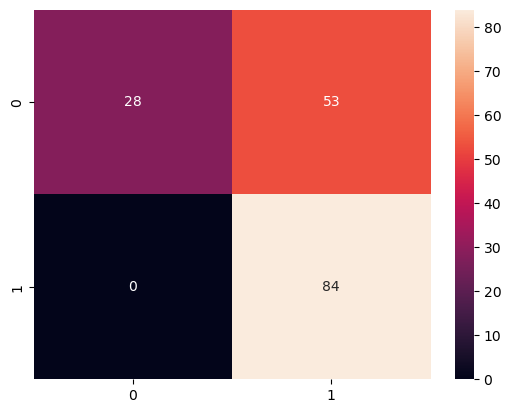

In [32]:
#best AUC = 0.6728395061728395
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef

mcc = matthews_corrcoef(y_holdout, y_best_pred_holdout)
sns.heatmap(confusion_matrix(y_holdout, y_best_pred_holdout), annot = True)
print(classification_report(y_holdout, y_best_pred_holdout))
print(f"Accuracy: {round(accuracy_score(y_holdout, y_best_pred_holdout), 2)}") 
print(f"Precision: {round(precision_score(y_holdout, y_best_pred_holdout), 2)}")
print(f"Recall: {round(recall_score(y_holdout, y_best_pred_holdout), 2)}")
print(f"F1_score: {round(f1_score(y_holdout, y_best_pred_holdout), 2)}")
print("AUC Score:", auc_score_holdout)
print("Matthews Correlation Coefficient (MCC):", mcc)

True Positive (TP):
The model predicted positive, and the real value is positive.
True Negative (TN):
The model predicted negative, and the real value is negative.
False Positive (FP):
The model predicted positive, but the real value is negative (Type I error).
False Negative (FN):
The model predicted negative, but the real value is positive (Type II error).

TN -- FP

FN -- TP

Total predictions: 165
Correct predictions: 112 (28 benign (TN) and 84 malignant (TP))
Incorrect predictions: 53 (53 benign classified as malignant (FP) and 0 malignant classified as benign (FN))


For BepiPred 3.0 some protein sequences had to be deleted as it only accepts sequences longer than 10, therefore, another test done with the same sequences used as BepiPred 3.0 for fair comparison

In [41]:
#Testing on holdout with the sequences deleted:
comparison_set = pd.read_csv('holdout_data.csv')
proteins_keep = ['ABI20203.1','AAC03762.1','P16082.1','P23426.1']
bepi_comparison = comparison_set[comparison_set['Info_protein_id'].isin(proteins_keep)]
bepi_comparison


,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279,Class
0,ABI20203.1:2,11676,ABI20203.1,263,K,23318151,33252,10000067,0,1,...,-0.140247,-0.248953,0.185531,0.007731,0.102163,-0.068917,-0.018686,-0.266192,0.080609,-1
1,ABI20203.1:2,11676,ABI20203.1,264,R,23318151,33252,10000067,0,1,...,-0.097484,-0.307103,0.462169,0.035631,0.138797,-0.006677,0.313747,-0.117993,-0.418884,-1
2,ABI20203.1:2,11676,ABI20203.1,265,W,23318151,33252,10000067,0,1,...,-0.004364,0.172317,0.146461,0.583348,0.155013,0.094847,-0.102562,-0.207383,-0.844568,-1
3,ABI20203.1:2,11676,ABI20203.1,266,I,23318151,33252,10000067,0,1,...,0.178255,-0.102600,0.305469,0.478632,0.283133,0.035063,0.006345,-0.213015,-0.269656,-1
4,ABI20203.1:2,11676,ABI20203.1,267,I,23318151,33252,10000067,0,1,...,0.274625,-0.207430,-0.009398,0.530498,0.324607,0.240791,0.149491,-0.069145,0.169097,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,P23426.1:2,11743,P23426.1,528,L,9014312,116563,9940,4,0,...,0.108956,-0.215917,0.019233,-0.198150,-0.021280,-0.030116,-0.340777,-0.212975,-0.049776,1
152,P23426.1:2,11743,P23426.1,529,L,9014312,116563,9940,4,0,...,0.147217,-0.247747,0.047722,-0.158434,-0.082282,-0.017684,-0.235318,-0.184800,-0.066270,1
153,P23426.1:2,11743,P23426.1,530,P,9014312,116563,9940,4,0,...,0.160192,-0.320569,0.293558,0.011905,0.008042,-0.002044,-0.346352,-0.428611,0.131980,1
154,P23426.1:2,11743,P23426.1,531,G,9014312,116563,9940,4,0,...,-0.109315,-0.221413,-0.058791,0.003519,-0.122019,0.014963,-0.188738,-0.545401,-0.074383,1


              precision    recall  f1-score   support

          -1       1.00      0.35      0.51        81
           1       0.41      1.00      0.58        37

    accuracy                           0.55       118
   macro avg       0.71      0.67      0.55       118
weighted avg       0.82      0.55      0.54       118

Accuracy: 0.55
Precision: 0.41
Recall: 1.0
F1_score: 0.58
AUC Score: 0.6728395061728395
Matthews Correlation Coefficient (MCC): 0.3769780933333177


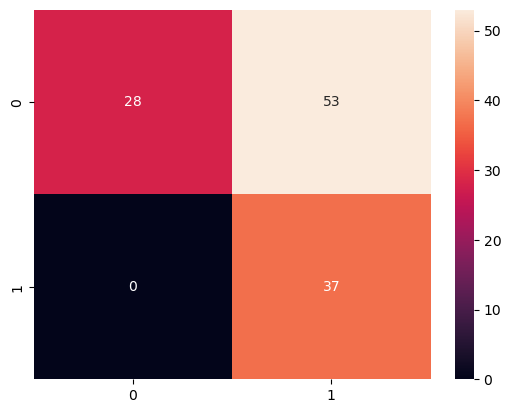

In [46]:
X_bepi_holdout = bepi_comparison.iloc[:, 13:-1]
X_bepi_holdout_pca = pca.transform(X_bepi_holdout)
y_bepi_holdout = bepi_comparison['Class']
comparison_data = best_est.predict(X_bepi_holdout_pca)

mcc = matthews_corrcoef(y_bepi_holdout, comparison_data)
sns.heatmap(confusion_matrix(y_bepi_holdout, comparison_data), annot = True)
print(classification_report(y_bepi_holdout, comparison_data))
print(f"Accuracy: {round(accuracy_score(y_bepi_holdout, comparison_data), 2)}") 
print(f"Precision: {round(precision_score(y_bepi_holdout, comparison_data), 2)}")
print(f"Recall: {round(recall_score(y_bepi_holdout, comparison_data), 2)}")
print(f"F1_score: {round(f1_score(y_bepi_holdout, comparison_data), 2)}")
print("AUC Score:", auc_score_holdout)
print("Matthews Correlation Coefficient (MCC):", mcc)